<div style="text-align: center;">
    <div style="color:blue; font-size:1.3rem; font-weight:bold;">
        Womanium & WISER Quantum Program 2025
    </div>
    <div style="color:blue; font-size:1.3rem; font-weight:bold;">
        Project 1 - Quantum Walks and Monte Carlo
    </div>
</div>

**Recommended reading:**
- Carney, Mark, and Ben Varcoe. *Universal Statistical Simulator*. 2022. arXiv, arXiv:2202.01735. [https://arxiv.org/abs/2202.01735](https://arxiv.org/abs/2202.01735)

**Team Members:**
- Gaël-Pacôme Nguimeya Tematio

<span style="color:black; font-size:0.9rem;"><b>Task 1:</b></span>

Review the paper, and any related resources to learn how to implement quantum Galton boards. Prepare a summary of your understanding in a well structured 2-pager document.

[Here's the summary of how to implement quantum Galton boards.](How-to-implement-quantum-Galton-boards.pdf)

<span style="color:black; font-size:0.9rem;"><b>Task 2:</b></span>

Using the 1- and 2-layer Galton Box code as a starting point, write a general algorithm that generates a circuit for any number of layers. Run and verify that the output is a Gaussian distribution. You may use any quantum SDK and platform for your implementation.

In [1]:
import qiskit
import qiskit_aer
import qiskit_ibm_runtime

print("Terra version:", qiskit.__version__)            # expects 2.1.1
print("Aer version:   ", qiskit_aer.__version__)       # expects 0.17.1
print("Runtime version:", qiskit_ibm_runtime.__version__)  # expects 0.40.1

Terra version: 2.1.1
Aer version:    0.17.1
Runtime version: 0.40.1


**1-Layer QGB Circuit**

1-Layer QGB Circuit
-------------------
Total qubits: 4
Total classical bits: 2
Circuit depth: 6
Gate count: 9

Circuit Diagram:
           Init ┌───┐   ┌───┐    Layer1       
q_0: ───────░───┤ H ├─■─┤ X ├─■────░──────────
            ░   └───┘ │ └─┬─┘ │    ░    ┌─┐   
q_1: ───────░─────────X───┼───┼────░────┤M├───
     ┌───┐  ░         │   │   │    ░    └╥┘   
q_2: ┤ X ├──░─────────X───■───X────░─────╫────
     └───┘  ░                 │    ░     ║ ┌─┐
q_3: ───────░─────────────────X────░─────╫─┤M├
            ░                      ░     ║ └╥┘
c: 2/════════════════════════════════════╩══╩═
                                         0  1 

Original 1-Layer QGB Distribution Analysis:
-------------------------------------------

Raw bitstring distribution:
'01' -> Bin 0: 10105 counts (50.52%)
'10' -> Bin 1:  9895 counts (49.48%)

Statistics of integer values:
Mean: 0.494750
Standard deviation: 0.499972
Variance: 0.249972

Distribution by bin number:
Bin 0: 10105 counts (50.52%)
Bin 1:  98

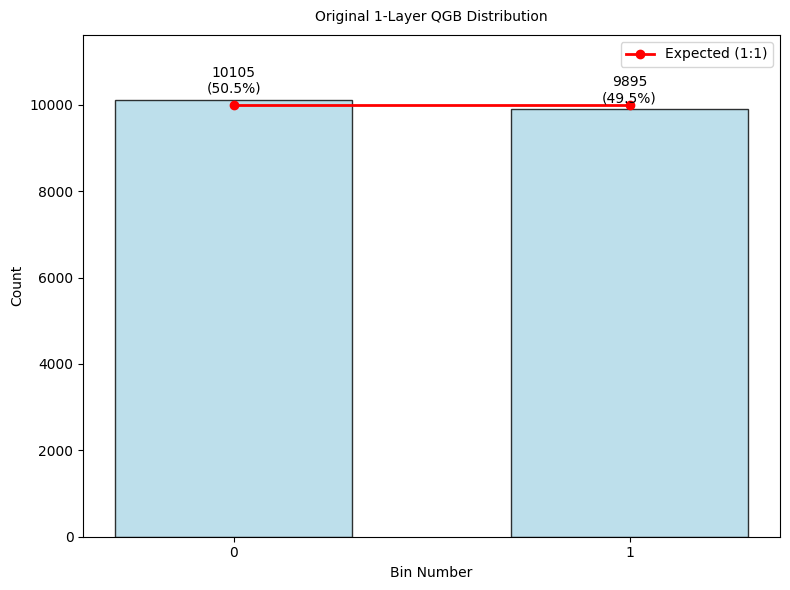


----------------------------
APPLYING RESCALING PROCEDURE
----------------------------
Total individual measurements: 20000
Total complete blocks of 8: 2500
Block sums range: 0 to 8

Individual values distribution (before blocking):
Bin 0: 10105 occurrences (50.52%)
Bin 1:  9895 occurrences (49.48%)

First 10 blocks of 8 values:
Block 1: [1, 1, 0, 0, 1, 1, 0, 0] -> Sum = 4
Block 2: [1, 1, 1, 1, 0, 0, 0, 1] -> Sum = 5
Block 3: [1, 1, 0, 1, 1, 1, 1, 0] -> Sum = 6
Block 4: [0, 1, 1, 1, 0, 1, 1, 0] -> Sum = 5
Block 5: [1, 1, 0, 0, 1, 0, 1, 0] -> Sum = 4
Block 6: [1, 1, 1, 1, 1, 1, 0, 1] -> Sum = 7
Block 7: [0, 1, 1, 1, 0, 1, 1, 1] -> Sum = 6
Block 8: [1, 0, 1, 1, 0, 0, 0, 0] -> Sum = 3
Block 9: [1, 0, 0, 1, 0, 0, 0, 0] -> Sum = 2
Block 10: [1, 0, 1, 0, 0, 1, 1, 0] -> Sum = 4

Rescaled Distribution (all values):
Sum  0:  13 blocks ( 0.52%)
Sum  1:  72 blocks ( 2.88%)
Sum  2: 294 blocks (11.76%)
Sum  3: 564 blocks (22.56%)
Sum  4: 699 blocks (27.96%)
Sum  5: 508 blocks (20.32%)
Sum  6: 259 

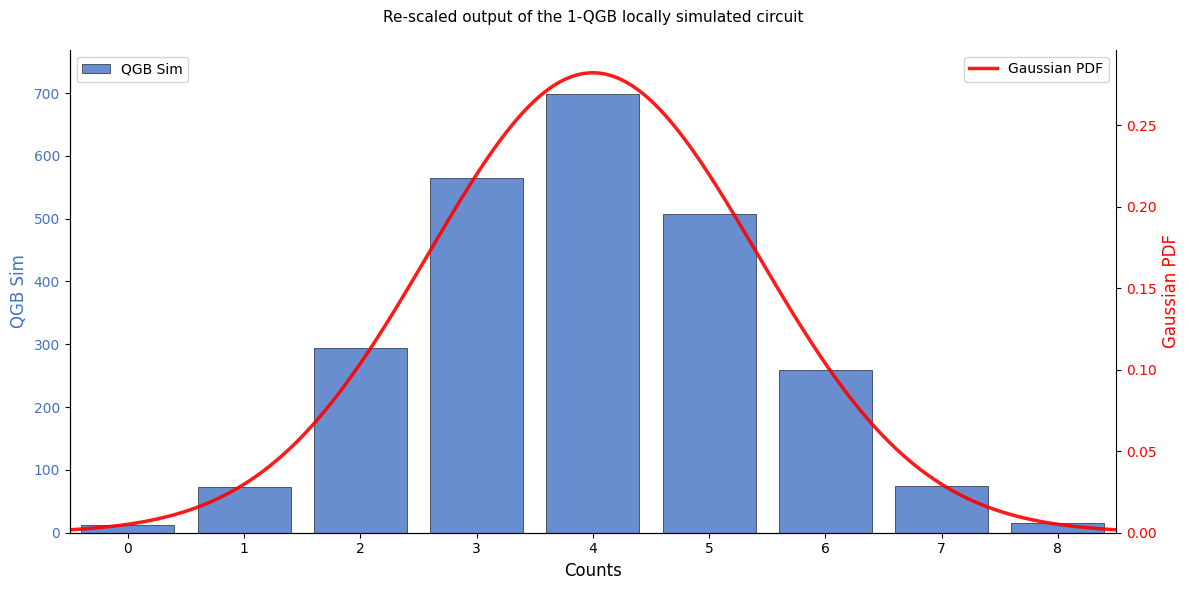


Rescaled Statistics:
Total blocks processed: 2500
Sum range: 0 to 8
Gaussian parameters: mu = 4, var = 2

--------------------------------
1-Layer QGB Theoretical Analysis
--------------------------------
Classical Galton Board paths:
Total possible paths: 2^1 = 2
Bin 0: L (1 path) --> 1/2 = 50%
Bin 1: R (1 path) --> 1/2 = 50%
Binomial coefficients: C(1,k) = [1, 1]



In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import CSwapGate


def create_1layer_qgb():
    """
    Create a 1-layer QGB circuit.
    
             ● Peg #1
            / \
           B0  B1 (2 bins)
    
    Classical structure: 1 layer of pegs, 2 bins.
    Expected distribution: 1:1
    
    Qubits:
    - q0: Control/decision qubit
    - q1: Bin 0, q3: Bin 1
    - q2: Auxiliary qubit
    
    Returns:
        QuantumCircuit: 4-qubit circuit with 2 classical bits
    """
    
    # Create 4-qubit circuit with 2 classical bits for measurements
    qc = QuantumCircuit(4, 2)

    # --- INITIALIZATION --- #
    # The initial walker starts at qubit q2
    qc.x(2)
    qc.barrier(label="Init")
    
    # --- LAYER 1: PEG #1 --- #
    # Spreads the walker from q2 to its neighbours, q1 and q3
    qc.h(0)
    qc.cswap(0, 1, 2)
    qc.cx(2, 0)
    qc.cswap(0, 2, 3)
    qc.barrier(label="Layer1")
    
    # --- MEASUREMENTS --- #
    # Measure the two bin qubits to determine final distribution
    qc.measure([1, 3], [0, 1])
    
    return qc

def convert_bitstring_to_integer(bitstring):
    """
    Convert binary string to integer value for QGB.
    For 1-layer QGB with 2 bins, we need to map the measurement outcome to a value 0-1.
    
    We will interpret this as the bin number where the particle ended up.
    Since QGB should produce exactly one particle in one bin, we find which bin is '1'.
    """
    # For QGB, exactly one bin should contain the particle
    # Find the position of the '1' bit (from right, 0-indexed)
    try:
        # Convert to list and reverse to match bin numbering
        bits = list(bitstring)
        bits.reverse()  # Now bits[0] is rightmost bit
        
        # Find which bin has the particle (should be exactly one '1')
        ones_positions = [i for i, bit in enumerate(bits) if bit == '1']
        
        if len(ones_positions) == 1:
            return ones_positions[0]  # Return bin number (0-1)
        elif len(ones_positions) == 0:
            return 0  # No particle detected, assign to bin 0
        else:
            # Multiple particles detected, sum the positions
            return sum(ones_positions) % len(bits)  # Modulo to keep in range 0-1
            
    except:
        # Fallback: convert to integer and take modulo
        return int(bitstring, 2) % len(bitstring)

def rescale_qgb_output(raw_counts, block_size=8):
    """
    Implement the rescaling procedure:
    1. Convert bitstrings to integers (0-1 for 2-bin QGB output)
    2. Shuffle the individual results to simulate random sampling
    3. Group results into blocks of 8
    4. Sum each block to get values from 0 to 8 (8 x 1 = 8)
    5. Return histogram of these sums
    
    Args:
        raw_counts: Dictionary with bitstring keys and count values
        block_size: Size of blocks to sum (default 8)
    
    Returns:
        rescaled_counts: Dictionary with sum values as keys
        individual_values: List of all individual integer values for processing
    """
    
    # Step 1: Convert all bitstrings to integer values (0-1)
    individual_values = []
    for bitstring, count in raw_counts.items():
        integer_value = convert_bitstring_to_integer(bitstring)
        # Add this value 'count' number of times
        individual_values.extend([integer_value] * count)
    
    # Step 2: Shuffle the individual values to simulate random sampling
    np.random.shuffle(individual_values)
    
    # Step 3: Take blocks of 8 and sum each block
    rescaled_values = []
    for i in range(0, len(individual_values), block_size):
        block = individual_values[i:i+block_size]
        if len(block) == block_size:  # Only use complete blocks
            block_sum = sum(block)
            rescaled_values.append(block_sum)
    
    # Step 4: Create histogram of sums
    rescaled_counts = {}
    for value in rescaled_values:
        rescaled_counts[value] = rescaled_counts.get(value, 0) + 1
    
    return rescaled_counts, individual_values

def plot_rescaled_histogram_with_gaussian(rescaled_counts, total_blocks, num_bins):
    """
    Plot rescaled histogram for 1-layer QGB.
    
    Args:
        rescaled_counts: Dictionary with sum values and their frequencies
        total_blocks: Total number of blocks processed
        num_bins: Number of bins in the QGB (2 for 1-layer)
    """
    
    # Create figure with dual y-axes
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Prepare data for plotting
    max_sum = 8 * (num_bins - 1)  # 8 * max_value = 8 * 1 = 8 (max possible sum for 1-layer QGB)
    bin_positions = list(range(max_sum + 1))
    bin_counts = [rescaled_counts.get(i, 0) for i in bin_positions]
    
    # Primary y-axis (left): QGB Simulation counts
    bars = ax1.bar(bin_positions, bin_counts, alpha=0.8, color='#4472C4', width=0.8, edgecolor='black', linewidth=0.5, label='QGB Sim')
    
    ax1.set_xlabel('Counts', fontsize=12)
    ax1.set_ylabel('QGB Sim', fontsize=12, color='#4472C4')
    ax1.tick_params(axis='y', labelcolor='#4472C4')
    
    # Set x-axis ticks and limits
    ax1.set_xlim(-0.5, max_sum + 0.5)
    tick_spacing = max(1, max_sum // 20)  # Adjust tick spacing based on range
    ax1.set_xticks(range(0, max_sum + 1, tick_spacing))
    
    # Set y-axis for counts
    max_count = max(bin_counts) if bin_counts else 1
    ax1.set_ylim(0, max_count * 1.1)
    
    # Remove top and right spines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.grid(False)
    
    # Secondary y-axis (right): Gaussian Distribution
    ax2 = ax1.twinx()
    
    # Calculate Gaussian parameters for 1-layer QGB:
    # Each block sums 8 values, each value 0-1, so we have a sum of values
    # For 1-layer QGB: mean per value = 0.5 (center of 0,1), var per value = 0.25
    # For sum of 8 such values: mean = 8*0.5 = 4, var = 8*0.25 = 2
    mu = 4
    var = 2
    std_dev = np.sqrt(var)
    
    # Plot the Gaussian PDF
    x_cont = np.linspace(-0.5, max_sum + 0.5, 500)
    gaussian_y = norm.pdf(x_cont, mu, std_dev)
    
    # Scale Gaussian to match the visualization style
    ax2.plot(x_cont, gaussian_y, 'r-', linewidth=2.5, label='Gaussian PDF', alpha=0.9)
    
    # Set right y-axis
    max_gaussian = max(gaussian_y) * 1.05
    ax2.set_ylim(0, max_gaussian)
    ax2.set_ylabel('Gaussian PDF', fontsize=12, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.spines['top'].set_visible(False)
    
    # Add legends
    ax1.legend(loc='upper left', fontsize=10)
    ax2.legend(loc='upper right', fontsize=10)
    
    # Add title and statistics
    layer_name = 1 
    title = f'Re-scaled output of the {layer_name}-QGB locally simulated circuit'
    plt.title(title, fontsize=11, pad=20)
    
    plt.tight_layout()
    filename = f'qgb{layer_name}_rescaled.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print statistics
    print(f"\nRescaled Statistics:")
    print(f"Total blocks processed: {total_blocks}")
    print(f"Sum range: 0 to {max_sum}")
    print(f"Gaussian parameters: mu = {mu}, var = {var}")
    
    return fig

def analyze_original_distribution(raw_counts, shots, num_bins):
    """
    Analyze the original QGB distribution before rescaling.
    """
    layer_name = 1 
    print(f"\nOriginal {layer_name}-Layer QGB Distribution Analysis:")
    print("-" * (42 + layer_name))
    
    print(f"\nRaw bitstring distribution:")
    sorted_bitstrings = sorted(raw_counts.items(), key=lambda x: x[1], reverse=True)
    for bitstring, count in sorted_bitstrings:
        percentage = count / shots * 100 if shots > 0 else 0
        integer_val = convert_bitstring_to_integer(bitstring)
        print(f"'{bitstring}' -> Bin {integer_val}: {count:>5} counts ({percentage:5.2f}%)")
    
    # Convert to integer values and analyze
    integer_counts = {}
    for bitstring, count in raw_counts.items():
        integer_val = convert_bitstring_to_integer(bitstring)
        integer_counts[integer_val] = integer_counts.get(integer_val, 0) + count
    
    # Calculate statistics of original distribution
    all_values = []
    for val, count in integer_counts.items():
        all_values.extend([val] * count)
    
    mean_val = np.mean(all_values)
    std_val = np.std(all_values)
    var_val = np.var(all_values)
    
    print(f"\nStatistics of integer values:")
    print(f"Mean: {mean_val:.6f}")
    print(f"Standard deviation: {std_val:.6f}")
    print(f"Variance: {var_val:.6f}")
    
    print(f"\nDistribution by bin number:")
    for i in range(num_bins):
        count = integer_counts.get(i, 0)
        percentage = count / shots * 100 if shots > 0 else 0
        print(f"Bin {i}: {count:>5} counts ({percentage:5.2f}%)")
        
def plot_original_histogram(raw_counts, shots, num_bins):
    """
    Plot the original QGB distribution.
    """
    # Convert to bin distribution
    bin_counts = [0] * num_bins
    for bitstring, count in raw_counts.items():
        bin_num = convert_bitstring_to_integer(bitstring)
        if 0 <= bin_num < num_bins:
            bin_counts[bin_num] += count
    
    # Plot original distribution
    fig, ax = plt.subplots(figsize=(8, 6))
    
    bin_positions = list(range(num_bins))
    bars = ax.bar(bin_positions, bin_counts, alpha=0.8, color='lightblue', edgecolor='black', width=0.6)
    
    ax.set_xlabel('Bin Number')
    ax.set_ylabel('Count')
    layer_name = 1 
    ax.set_title(f'Original {layer_name}-Layer QGB Distribution', fontsize=10, pad=10)
    ax.set_xticks(bin_positions)
    
    # Add count labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        percentage = height / shots * 100 if shots > 0 else 0
        ax.text(
            bar.get_x() + bar.get_width()/2., 
            height + max(bin_counts)*0.01,
            f'{int(height)}\n({percentage:.1f}%)', 
            ha='center', va='bottom'
        )
    
    # Expected theoretical distribution for 1-layer: 1:1
    S = 2**layer_name
    expected = [shots/S, shots/S]    
    ax.plot(bin_positions, expected, 'ro-', label='Expected (1:1)', linewidth=2)
    ax.legend()

    # Set the y-axis limit to be 15% higher than the maximum data value
    ax.set_ylim(top=max(max(bin_counts), max(expected)) * 1.15)
    
    plt.tight_layout()
    filename = f'qgb{layer_name}_original_distribution.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


if __name__ == "__main__":
    # Create the 1-layer QGB circuit
    circuit1 = create_1layer_qgb()
    
    # Display circuit information
    print("1-Layer QGB Circuit")
    print("-" * 19)
    print(f"Total qubits: {circuit1.num_qubits}")
    print(f"Total classical bits: {circuit1.num_clbits}")
    print(f"Circuit depth: {circuit1.depth()}")
    print(f"Gate count: {len(circuit1.data)}")
    
    # Draw the circuit 
    print("\nCircuit Diagram:")
    print(circuit1.draw())
    
    # Simulate the circuit with shots divisible by 8 for clean blocking
    simulator = AerSimulator()
    tqc = transpile(circuit1, simulator)
    
    shots = 20000
    job = simulator.run(tqc, shots=shots)
    result = job.result()
    raw_counts = result.get_counts()
    
    # Determine number of bins from circuit
    num_bins = 2  # 1-layer QGB has 2 bins
    
    # Analyze original distribution
    analyze_original_distribution(raw_counts, shots, num_bins)
    
    # Plot original distribution
    plot_original_histogram(raw_counts, shots, num_bins)
    
    # Apply rescaling procedure
    print(f"\n" + "-"*28)
    print(f"APPLYING RESCALING PROCEDURE")
    print(f"-"*28)
    
    rescaled_counts, individual_values = rescale_qgb_output(raw_counts, block_size=8)
    total_blocks = len(individual_values) // 8
    
    print(f"Total individual measurements: {len(individual_values)}")
    print(f"Total complete blocks of 8: {total_blocks}")
    
    if rescaled_counts:
        print(f"Block sums range: {min(rescaled_counts.keys())} to {max(rescaled_counts.keys())}")
    else:
        print("No rescaled data available!")
        exit()
    
    # Show distribution of individual values before blocking
    print(f"\nIndividual values distribution (before blocking):")
    individual_dist = {}
    for val in individual_values:
        individual_dist[val] = individual_dist.get(val, 0) + 1
    
    for val in sorted(individual_dist.keys()):
        count = individual_dist[val]
        percentage = count / len(individual_values) * 100 if individual_values else 0
        print(f"Bin {val}: {count:>5} occurrences ({percentage:5.2f}%)")
    
    # Show first few blocks to verify randomness
    print(f"\nFirst 10 blocks of 8 values:")
    for i in range(min(10, total_blocks)):
        start_idx = i * 8
        block = individual_values[start_idx:start_idx + 8]
        block_sum = sum(block)
        print(f"Block {i+1}: {block} -> Sum = {block_sum}")
    
    # Display rescaled results (show more values for 1-layer)
    print(f"\nRescaled Distribution (all values):")
    for sum_val, count in sorted(rescaled_counts.items()):
        percentage = count / total_blocks * 100 if total_blocks > 0 else 0
        print(f"Sum {sum_val:>2}: {count:>3} blocks ({percentage:5.2f}%)")
            
    # Create the rescaled plot
    plot_rescaled_histogram_with_gaussian(rescaled_counts, total_blocks, num_bins)
    
    # Theoretical analysis
    print(f"\n" + "-"*32)
    print("1-Layer QGB Theoretical Analysis")
    print("-"*32)
    print("Classical Galton Board paths:")
    print("Total possible paths: 2^1 = 2")
    print("Bin 0: L (1 path) --> 1/2 = 50%")
    print("Bin 1: R (1 path) --> 1/2 = 50%")
    print("Binomial coefficients: C(1,k) = [1, 1]\n")

**2-Layer QGB Circuit**

2-Layer QGB Circuit
-------------------
Total qubits: 6
Total classical bits: 3
Circuit depth: 17
Gate count: 22

Circuit Diagram:
           Init ┌───┐   ┌───┐   ┌───┐      Layer1 ┌───┐   ┌───┐   ┌───┐   ┌───┐»
q_0: ───────░───┤ H ├─■─┤ X ├─■─┤ X ├─|0>────░────┤ H ├─■─┤ X ├─■─┤ X ├─■─┤ X ├»
            ░   └───┘ │ └─┬─┘ │ └─┬─┘        ░    └───┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘»
q_1: ───────░─────────┼───┼───┼───┼──────────░──────────X───┼───┼───┼───┼───┼──»
            ░         │   │   │   │          ░          │   │   │   │   │   │  »
q_2: ───────░─────────X───┼───┼───┼──────────░──────────X───■───X───┼───┼───┼──»
     ┌───┐  ░         │   │   │   │          ░                  │   │   │   │  »
q_3: ┤ X ├──░─────────X───■───X───┼──────────░──────────────────X───■───X───┼──»
     └───┘  ░                 │   │          ░                          │   │  »
q_4: ───────░─────────────────X───■──────────░──────────────────────────X───■──»
            ░                                ░             

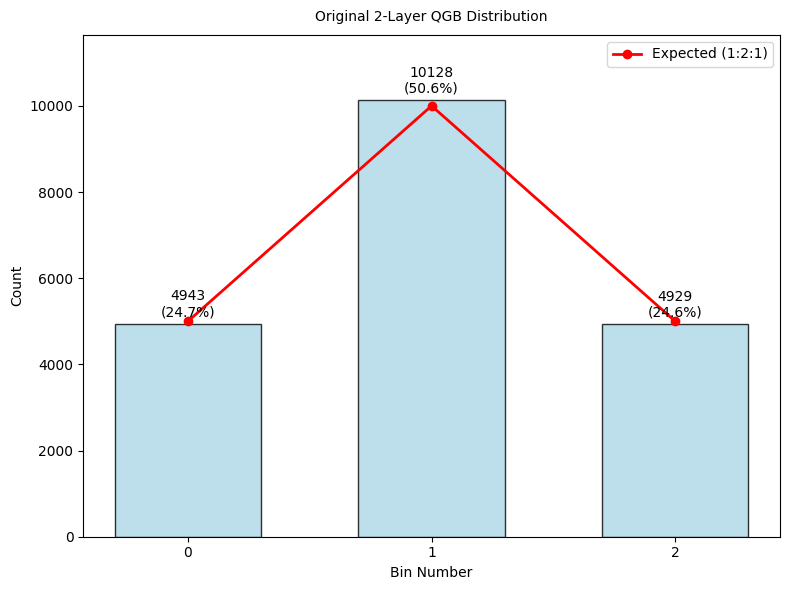


----------------------------
APPLYING RESCALING PROCEDURE
----------------------------
Total individual measurements: 20000
Total complete blocks of 8: 2500
Block sums range: 1 to 14

Individual values distribution (before blocking):
Bin 0:  4943 occurrences (24.71%)
Bin 1: 10128 occurrences (50.64%)
Bin 2:  4929 occurrences (24.64%)

First 10 blocks of 8 values:
Block 1: [1, 1, 1, 2, 0, 1, 1, 0] -> Sum = 7
Block 2: [1, 2, 1, 1, 0, 1, 2, 1] -> Sum = 9
Block 3: [1, 1, 2, 0, 1, 0, 1, 2] -> Sum = 8
Block 4: [1, 0, 2, 2, 1, 2, 0, 2] -> Sum = 10
Block 5: [0, 2, 2, 0, 0, 0, 0, 1] -> Sum = 5
Block 6: [2, 2, 1, 0, 1, 1, 2, 2] -> Sum = 11
Block 7: [0, 1, 1, 1, 2, 2, 1, 1] -> Sum = 9
Block 8: [2, 1, 1, 1, 1, 1, 1, 1] -> Sum = 9
Block 9: [2, 2, 1, 0, 1, 0, 2, 1] -> Sum = 9
Block 10: [1, 1, 0, 0, 2, 1, 1, 2] -> Sum = 8

Rescaled Distribution (all values):
Sum  1:   1 blocks ( 0.04%)
Sum  2:   5 blocks ( 0.20%)
Sum  3:  28 blocks ( 1.12%)
Sum  4:  71 blocks ( 2.84%)
Sum  5: 175 blocks ( 7.00%)
Sum

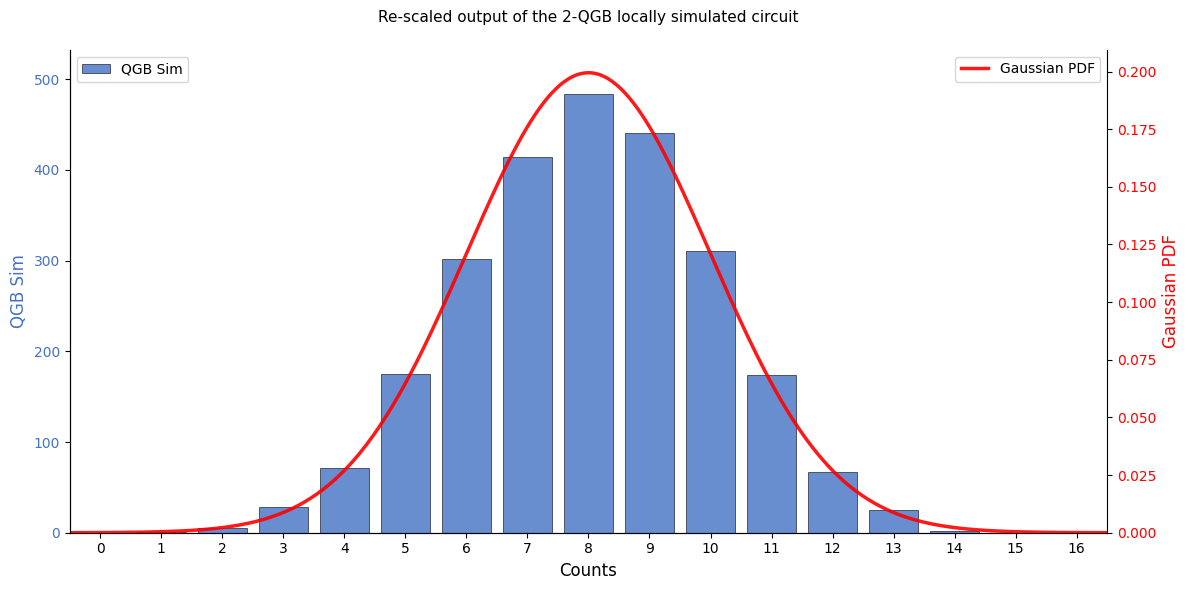


Rescaled Statistics:
Total blocks processed: 2500
Sum range: 0 to 16
Gaussian parameters: mu = 8, var = 4.0000

--------------------------------
2-Layer QGB Theoretical Analysis
--------------------------------
Classical Galton Board paths:
Total possible paths: 2^2 = 4
Bin 0: LL (1 path) --> 1/4 = 25%
Bin 1: LR, RL (2 paths) --> 2/4 = 50%
Bin 2: RR (1 path) --> 1/4 = 25%
Binomial coefficients: C(2,k) = [1, 2, 1]



In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import CSwapGate


def create_2layer_qgb():
    """
    Create a 2-layer QGB circuit.
    
          ● Peg #1
         / \
        ●   ● Peg #2, #3
       / \ / \
      B0  B1  B2 (3 bins)
    
    Classical structure: 2 layers of pegs, 3 bins.
    Expected distribution: 1:2:1
    
    Qubits:
    - q0: Control/decision qubit
    - q1: Bin 0, q3: Bin 1, q5: Bin 2
    - q2, q4: Auxiliary qubits
    
    Returns:
        QuantumCircuit: 6-qubit circuit with 3 classical bits
    """
    
    # Create 6-qubit circuit with 3 classical bits for measurements
    qc = QuantumCircuit(6, 3)
    
    # --- INITIALIZATION --- #
    # The initial walker starts at qubit q3
    qc.x(3)
    qc.barrier(label="Init")
    
    # --- LAYER 1: PEG #1 --- #
    # Spreads the walker from q3 to its neighbours, q2 and q4
    qc.h(0)
    qc.append(CSwapGate(), [0, 2, 3]); qc.cx(3, 0)
    qc.append(CSwapGate(), [0, 3, 4]); qc.cx(4, 0)
    qc.reset(0)
    qc.barrier(label="Layer1")
    
    # --- LAYER 2: PEGS #2, #3 --- #
    # The final layer expands the walk to the outermost bins, q1 and q5
    qc.h(0)
    qc.append(CSwapGate(), [0, 1, 2]); qc.cx(2, 0)
    qc.append(CSwapGate(), [0, 2, 3]); qc.cx(3, 0)
    qc.append(CSwapGate(), [0, 3, 4]); qc.cx(4, 0)
    qc.append(CSwapGate(), [0, 4, 5]); qc.cx(5, 0)
    qc.barrier(label="Layer2")
    
    # --- MEASUREMENTS --- #
    # Measure the three bin qubits to determine final distribution
    qc.measure([1, 3, 5], [0, 1, 2])
    
    return qc

def convert_bitstring_to_integer(bitstring):
    """
    Convert binary string to integer value for QGB.
    For 2-layer QGB with 3 bins, we need to map the measurement outcome to a value 0-2.
    
    We'll interpret this as the bin number where the particle ended up.
    Since QGB should produce exactly one particle in one bin, we find which bin is '1'.
    """
    # For QGB, exactly one bin should contain the particle
    # Find the position of the '1' bit (from right, 0-indexed)
    try:
        # Convert to list and reverse to match bin numbering
        bits = list(bitstring)
        bits.reverse()  # Now bits[0] is rightmost bit
        
        # Find which bin has the particle (should be exactly one '1')
        ones_positions = [i for i, bit in enumerate(bits) if bit == '1']
        
        if len(ones_positions) == 1:
            return ones_positions[0]  # Return bin number (0-2)
        elif len(ones_positions) == 0:
            return 0  # No particle detected, assign to bin 0
        else:
            # Multiple particles detected, sum the positions
            return sum(ones_positions) % len(bits)  # Modulo to keep in range 0-2
            
    except:
        # Fallback: convert to integer and take modulo
        return int(bitstring, 2) % len(bitstring)

def rescale_qgb_output(raw_counts, block_size=8):
    """
    Implement the rescaling procedure:
    1. Convert bitstrings to integers (0-2 for 3-bin QGB output)
    2. Shuffle the individual results to simulate random sampling
    3. Group results into blocks of 8
    4. Sum each block to get values from 0 to 16 (8 × 2 = 16)
    5. Return histogram of these sums
    
    Args:
        raw_counts: Dictionary with bitstring keys and count values
        block_size: Size of blocks to sum (default 8)
    
    Returns:
        rescaled_counts: Dictionary with sum values as keys
        individual_values: List of all individual integer values for processing
    """
    
    # Step 1: Convert all bitstrings to integer values (0-2)
    individual_values = []
    for bitstring, count in raw_counts.items():
        integer_value = convert_bitstring_to_integer(bitstring)
        # Add this value 'count' number of times
        individual_values.extend([integer_value] * count)
    
    # Step 2: Shuffle the individual values to simulate random sampling
    np.random.shuffle(individual_values)
    
    # Step 3: Take blocks of 8 and sum each block
    rescaled_values = []
    for i in range(0, len(individual_values), block_size):
        block = individual_values[i:i+block_size]
        if len(block) == block_size:  # Only use complete blocks
            block_sum = sum(block)
            rescaled_values.append(block_sum)
    
    # Step 4: Create histogram of sums
    rescaled_counts = {}
    for value in rescaled_values:
        rescaled_counts[value] = rescaled_counts.get(value, 0) + 1
    
    return rescaled_counts, individual_values

def plot_rescaled_histogram_with_gaussian(rescaled_counts, total_blocks, num_bins):
    """
    Plot rescaled histogram for 2-layer QGB.
    
    Args:
        rescaled_counts: Dictionary with sum values and their frequencies
        total_blocks: Total number of blocks processed
        num_bins: Number of bins in the QGB (3 for 2-layer)
    """
    
    # Create figure with dual y-axes
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Prepare data for plotting
    max_sum = 8 * (num_bins - 1)  # 8 * max_value = 8 * 2 = 16 (max possible sum for 2-layer QGB)
    bin_positions = list(range(max_sum + 1))
    bin_counts = [rescaled_counts.get(i, 0) for i in bin_positions]
    
    # Primary y-axis (left): QGB Simulation counts
    bars = ax1.bar(bin_positions, bin_counts, alpha=0.8, color='#4472C4', width=0.8, edgecolor='black', linewidth=0.5, label='QGB Sim')
    
    ax1.set_xlabel('Counts', fontsize=12)
    ax1.set_ylabel('QGB Sim', fontsize=12, color='#4472C4')
    ax1.tick_params(axis='y', labelcolor='#4472C4')
    
    # Set x-axis ticks and limits
    ax1.set_xlim(-0.5, max_sum + 0.5)
    tick_spacing = max(1, max_sum // 20)  # Adjust tick spacing based on range
    ax1.set_xticks(range(0, max_sum + 1, tick_spacing))
    
    # Set y-axis for counts
    max_count = max(bin_counts) if bin_counts else 1
    ax1.set_ylim(0, max_count * 1.1)
    
    # Remove top and right spines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.grid(False)
    
    # Secondary y-axis (right): Gaussian Distribution
    ax2 = ax1.twinx()

    # Calculate Gaussian parameters for 2-layer QGB:
    # Each block sums 8 values, each value 0-2, so we have a sum of values
    # For 2-layer QGB: mean per value = 1 (center of 0,1,2), var per value = 2/3
    # For sum of 8 such values: mean = 8*1 = 8, var = 8*2/3 = 16/3
    mu = 8
    var = 4
    std_dev = np.sqrt(var)
    
    # Plot the Gaussian PDF
    x_cont = np.linspace(-0.5, max_sum + 0.5, 500)
    gaussian_y = norm.pdf(x_cont, mu, std_dev)
    
    # Scale Gaussian to match the visualization style
    ax2.plot(x_cont, gaussian_y, 'r-', linewidth=2.5, label='Gaussian PDF', alpha=0.9)
    
    # Set right y-axis
    max_gaussian = max(gaussian_y) * 1.05
    ax2.set_ylim(0, max_gaussian)
    ax2.set_ylabel('Gaussian PDF', fontsize=12, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.spines['top'].set_visible(False)
    
    # Add legends
    ax1.legend(loc='upper left', fontsize=10)
    ax2.legend(loc='upper right', fontsize=10)
    
    # Add title and statistics
    layer_name = 2 
    title = f'Re-scaled output of the {layer_name}-QGB locally simulated circuit'
    plt.title(title, fontsize=11, pad=20)
    
    plt.tight_layout()
    filename = f'qgb{layer_name}_rescaled.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print statistics
    print(f"\nRescaled Statistics:")
    print(f"Total blocks processed: {total_blocks}")
    print(f"Sum range: 0 to {max_sum}")
    print(f"Gaussian parameters: mu = {mu}, var = {var:.4f}")
    
    return fig

def analyze_original_distribution(raw_counts, shots, num_bins):
    """
    Analyze the original QGB distribution before rescaling.
    """
    layer_name = 2 
    print(f"\nOriginal {layer_name}-Layer QGB Distribution Analysis:")
    print("-" * (41 + layer_name))
    
    print(f"\nRaw bitstring distribution:")
    sorted_bitstrings = sorted(raw_counts.items(), key=lambda x: x[1], reverse=True)
    for bitstring, count in sorted_bitstrings:
        percentage = count / shots * 100 if shots > 0 else 0
        integer_val = convert_bitstring_to_integer(bitstring)
        print(f"'{bitstring}' -> Bin {integer_val}: {count:>5} counts ({percentage:5.2f}%)")
    
    # Convert to integer values and analyze
    integer_counts = {}
    for bitstring, count in raw_counts.items():
        integer_val = convert_bitstring_to_integer(bitstring)
        integer_counts[integer_val] = integer_counts.get(integer_val, 0) + count
    
    # Calculate statistics of original distribution
    all_values = []
    for val, count in integer_counts.items():
        all_values.extend([val] * count)
    
    mean_val = np.mean(all_values)
    std_val = np.std(all_values)
    var_val = np.var(all_values)
    
    print(f"\nStatistics of integer values:")
    print(f"Mean: {mean_val:.6f}")
    print(f"Standard deviation: {std_val:.6f}")
    print(f"Variance: {var_val:.6f}")
    
    print(f"\nDistribution by bin number:")
    for i in range(num_bins):
        count = integer_counts.get(i, 0)
        percentage = count / shots * 100 if shots > 0 else 0
        print(f"Bin {i}: {count:>5} counts ({percentage:5.2f}%)")

def plot_original_histogram(raw_counts, shots, num_bins):
    """
    Plot the original QGB distribution.
    """
    # Convert to bin distribution
    bin_counts = [0] * num_bins
    for bitstring, count in raw_counts.items():
        bin_num = convert_bitstring_to_integer(bitstring)
        if 0 <= bin_num < num_bins:
            bin_counts[bin_num] += count
    
    # Plot original distribution
    fig, ax = plt.subplots(figsize=(8, 6))
    
    bin_positions = list(range(num_bins))
    bars = ax.bar(bin_positions, bin_counts, alpha=0.8, color='lightblue', edgecolor='black', width=0.6)
    
    ax.set_xlabel('Bin Number')
    ax.set_ylabel('Count')
    layer_name = 2 
    ax.set_title(f'Original {layer_name}-Layer QGB Distribution', fontsize=10, pad=10)
    ax.set_xticks(bin_positions)
    
    # Add count labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        percentage = height / shots * 100 if shots > 0 else 0
        ax.text(
            bar.get_x() + bar.get_width()/2., 
            height + max(bin_counts)*0.01,
            f'{int(height)}\n({percentage:.1f}%)', 
            ha='center', va='bottom'
        )
    
    # Expected theoretical distribution for 2-layer: 1:2:1
    S = 2**layer_name
    expected = [shots/S, 2*shots/S, shots/S]    
    ax.plot(bin_positions, expected, 'ro-', label='Expected (1:2:1)', linewidth=2)
    ax.legend()

    # Set the y-axis limit to be 15% higher than the maximum data value
    ax.set_ylim(top=max(max(bin_counts), max(expected)) * 1.15)
    
    plt.tight_layout()
    filename = f'qgb{layer_name}_original_distribution.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


if __name__ == "__main__":
    # Create the 2-layer QGB circuit
    circuit2 = create_2layer_qgb()
    
    # Display circuit information
    print("2-Layer QGB Circuit")
    print("-" * 19)
    print(f"Total qubits: {circuit2.num_qubits}")
    print(f"Total classical bits: {circuit2.num_clbits}")
    print(f"Circuit depth: {circuit2.depth()}")
    print(f"Gate count: {len(circuit2.data)}")
    
    # Draw the circuit 
    print("\nCircuit Diagram:")
    print(circuit2.draw())
    
    # Simulate the circuit with shots divisible by 8 for clean blocking
    simulator = AerSimulator()
    tqc = transpile(circuit2, simulator)
    
    shots = 20000
    job = simulator.run(tqc, shots=shots)
    result = job.result()
    raw_counts = result.get_counts()
    
    # Determine number of bins from circuit
    num_bins = 3  # 2-layer QGB has 3 bins
    
    # Analyze original distribution
    analyze_original_distribution(raw_counts, shots, num_bins)
    
    # Plot original distribution
    plot_original_histogram(raw_counts, shots, num_bins)
    
    # Apply rescaling procedure
    print(f"\n" + "-"*28)
    print(f"APPLYING RESCALING PROCEDURE")
    print(f"-"*28)
    
    rescaled_counts, individual_values = rescale_qgb_output(raw_counts, block_size=8)
    total_blocks = len(individual_values) // 8
    
    print(f"Total individual measurements: {len(individual_values)}")
    print(f"Total complete blocks of 8: {total_blocks}")
    
    if rescaled_counts:
        print(f"Block sums range: {min(rescaled_counts.keys())} to {max(rescaled_counts.keys())}")
    else:
        print("No rescaled data available!")
        exit()
    
    # Show distribution of individual values before blocking
    print(f"\nIndividual values distribution (before blocking):")
    individual_dist = {}
    for val in individual_values:
        individual_dist[val] = individual_dist.get(val, 0) + 1
    
    for val in sorted(individual_dist.keys()):
        count = individual_dist[val]
        percentage = count / len(individual_values) * 100 if individual_values else 0
        print(f"Bin {val}: {count:>5} occurrences ({percentage:5.2f}%)")
    
    # Show first few blocks to verify randomness
    print(f"\nFirst 10 blocks of 8 values:")
    for i in range(min(10, total_blocks)):
        start_idx = i * 8
        block = individual_values[start_idx:start_idx + 8]
        block_sum = sum(block)
        print(f"Block {i+1}: {block} -> Sum = {block_sum}")
    
    # Display rescaled results
    print(f"\nRescaled Distribution (all values):")
    for sum_val, count in sorted(rescaled_counts.items()):
        percentage = count / total_blocks * 100 if total_blocks > 0 else 0
        print(f"Sum {sum_val:>2}: {count:>3} blocks ({percentage:5.2f}%)")
            
    # Create the rescaled plot
    plot_rescaled_histogram_with_gaussian(rescaled_counts, total_blocks, num_bins)
    
    # Theoretical analysis
    print(f"\n" + "-"*32)
    print("2-Layer QGB Theoretical Analysis")
    print("-"*32)
    print("Classical Galton Board paths:")
    print("Total possible paths: 2^2 = 4")
    print("Bin 0: LL (1 path) --> 1/4 = 25%")
    print("Bin 1: LR, RL (2 paths) --> 2/4 = 50%")
    print("Bin 2: RR (1 path) --> 1/4 = 25%")
    print("Binomial coefficients: C(2,k) = [1, 2, 1]\n")

**3-Layer QGB Circuit**

3-Layer QGB Circuit
-------------------
Total qubits: 8
Total classical bits: 4
Circuit depth: 31
Gate count: 38

Circuit Diagram:
           Init ┌───┐   ┌───┐   ┌───┐      Layer1 ┌───┐   ┌───┐   ┌───┐   ┌───┐»
q_0: ───────░───┤ H ├─■─┤ X ├─■─┤ X ├─|0>────░────┤ H ├─■─┤ X ├─■─┤ X ├─■─┤ X ├»
            ░   └───┘ │ └─┬─┘ │ └─┬─┘        ░    └───┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘»
q_1: ───────░─────────┼───┼───┼───┼──────────░──────────┼───┼───┼───┼───┼───┼──»
            ░         │   │   │   │          ░          │   │   │   │   │   │  »
q_2: ───────░─────────┼───┼───┼───┼──────────░──────────X───┼───┼───┼───┼───┼──»
            ░         │   │   │   │          ░          │   │   │   │   │   │  »
q_3: ───────░─────────X───┼───┼───┼──────────░──────────X───■───X───┼───┼───┼──»
     ┌───┐  ░         │   │   │   │          ░                  │   │   │   │  »
q_4: ┤ X ├──░─────────X───■───X───┼──────────░──────────────────X───■───X───┼──»
     └───┘  ░                 │   │          ░             

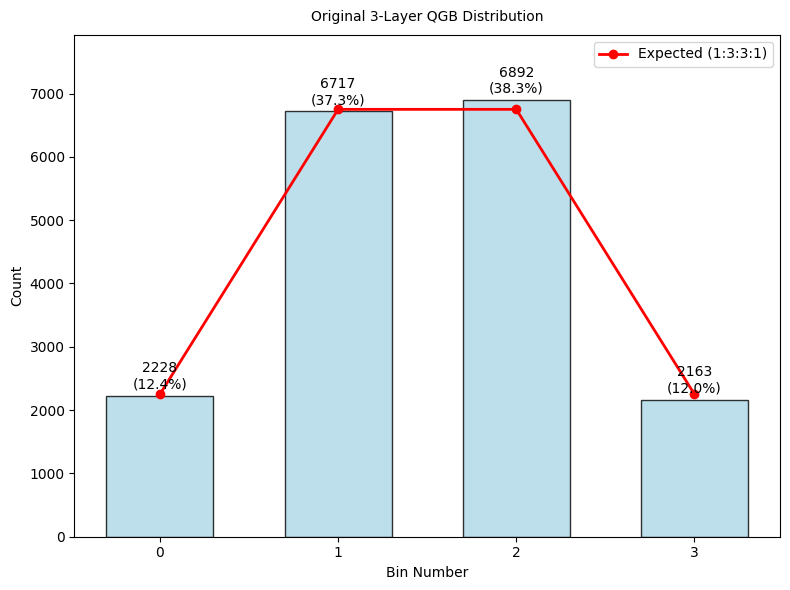


----------------------------
APPLYING RESCALING PROCEDURE
----------------------------
Total individual measurements: 18000
Total complete blocks of 8: 2250
Block sums range: 3 to 20

Individual values distribution (before blocking):
Bin 0:  2228 occurrences (12.38%)
Bin 1:  6717 occurrences (37.32%)
Bin 2:  6892 occurrences (38.29%)
Bin 3:  2163 occurrences (12.02%)

First 10 blocks of 8 values:
Block 1: [2, 1, 2, 1, 1, 1, 0, 2] -> Sum = 10
Block 2: [0, 2, 1, 2, 1, 2, 1, 2] -> Sum = 11
Block 3: [0, 2, 2, 3, 2, 0, 0, 2] -> Sum = 11
Block 4: [3, 2, 0, 1, 2, 1, 2, 3] -> Sum = 14
Block 5: [1, 1, 1, 3, 2, 0, 2, 1] -> Sum = 11
Block 6: [1, 2, 1, 0, 1, 2, 1, 1] -> Sum = 9
Block 7: [3, 1, 1, 2, 2, 1, 3, 2] -> Sum = 15
Block 8: [2, 2, 2, 1, 3, 2, 1, 1] -> Sum = 14
Block 9: [2, 0, 2, 1, 2, 1, 2, 2] -> Sum = 12
Block 10: [2, 2, 0, 2, 1, 1, 2, 3] -> Sum = 13

Rescaled Distribution (all values):
Sum  3:   1 blocks ( 0.04%)
Sum  5:   8 blocks ( 0.36%)
Sum  6:  14 blocks ( 0.62%)
Sum  7:  41 blocks

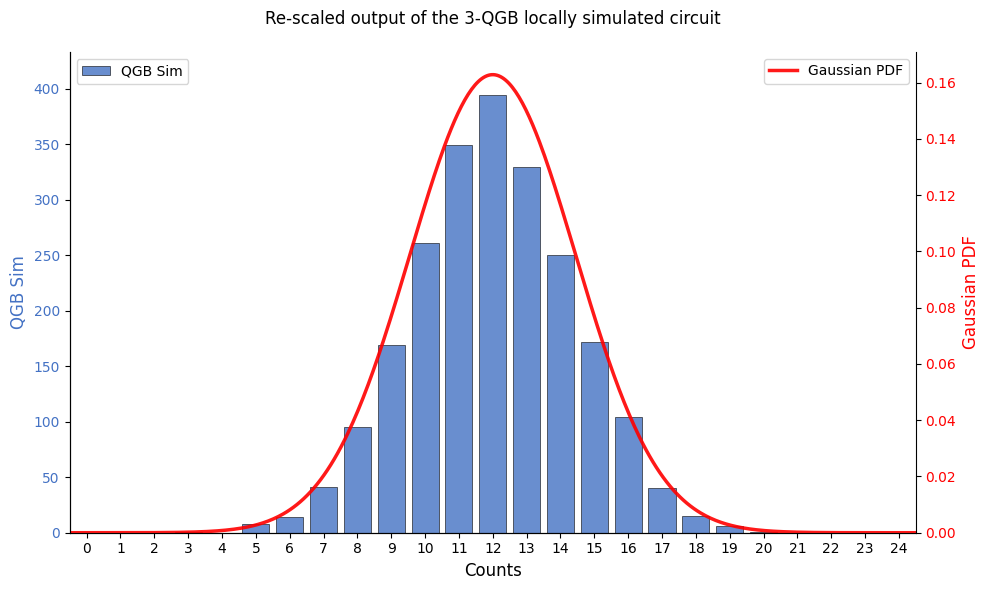


Rescaled Statistics:
Total blocks processed: 2250
Sum range: 0 to 24
Gaussian parameters: mu = 12, var = 6

--------------------------------
3-Layer QGB Theoretical Analysis
--------------------------------
Classical Galton Board paths:
Total possible paths: 2^3 = 8
Bin 0: LLL (1 path) --> 1/8 = 12.5%
Bin 1: LLR, LRL, RLL (3 paths) --> 3/8 = 37.5%
Bin 2: LRR, RLR, RRL (3 paths) --> 3/8 = 37.5%
Bin 3: RRR (1 path) --> 1/8 = 12.5%
Binomial coefficients: C(3,k) = [1, 3, 3, 1]



In [4]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import CSwapGate


def create_3layer_qgb():
    """
    Create a 3-layer QGB circuit.
    
          ● Peg #1
         / \
        ●   ● Peg #2, #3
       / \ / \
      ●   ●   ● Peg #4, #5, #6
     / \ / \ / \
    B0  B1  B2  B3 (4 bins)
    
    Classical structure: 3 layers of pegs, 4 bins.
    Expected distribution: 1:3:3:1
    
    Qubits:
    - q0: Control/decision qubit
    - q1: Bin 0, q3: Bin 1, q5: Bin 2, q7: Bin 3
    - q2, q4, q6: Auxiliary qubits
    
    Returns:
        QuantumCircuit: 8-qubit circuit with 4 classical bits
    """
    
    # Create 8-qubit circuit with 4 classical bits for measurements
    qc = QuantumCircuit(8, 4)
    
    # --- INITIALIZATION --- #
    # The initial walker starts at qubit q4
    qc.x(4)
    qc.barrier(label="Init")
    
    # --- LAYER 1: PEG #1 --- #
    # Spreads the walker from q4 to its neighbours, q3 and q5
    qc.h(0)
    qc.append(CSwapGate(), [0, 3, 4]); qc.cx(4, 0)
    qc.append(CSwapGate(), [0, 4, 5]); qc.cx(5, 0)
    qc.reset(0)
    qc.barrier(label="Layer1")
    
    # --- LAYER 2: PEGS #2, #3 --- #
    # Spreads the walker outwards to q2 and q6
    qc.h(0)
    qc.append(CSwapGate(), [0, 2, 3]); qc.cx(3, 0)
    qc.append(CSwapGate(), [0, 3, 4]); qc.cx(4, 0)
    qc.append(CSwapGate(), [0, 4, 5]); qc.cx(5, 0)
    qc.append(CSwapGate(), [0, 5, 6]); qc.cx(6, 0)
    qc.reset(0)
    qc.barrier(label="Layer2")
    
    # --- LAYER 3: PEGS #4, #5, #6 --- #
    # The final layer expands the walk to the outermost bins, q1 and q7
    qc.h(0)
    qc.append(CSwapGate(), [0, 1, 2]); qc.cx(2, 0)
    qc.append(CSwapGate(), [0, 2, 3]); qc.cx(3, 0)
    qc.append(CSwapGate(), [0, 3, 4]); qc.cx(4, 0)
    qc.append(CSwapGate(), [0, 4, 5]); qc.cx(5, 0)
    qc.append(CSwapGate(), [0, 5, 6]); qc.cx(6, 0)
    qc.append(CSwapGate(), [0, 6, 7]); qc.cx(7, 0)
    qc.barrier(label="Layer3")
    
    # --- MEASUREMENTS --- #
    # Measure the four bin qubits to determine final distribution
    qc.measure([1, 3, 5, 7], [0, 1, 2, 3])
    
    return qc

def convert_bitstring_to_integer(bitstring):
    """
    Convert binary string to integer value for QGB.
    For 3-layer QGB with 4 bins, we need to map the measurement outcome to a value 0-3.
    
    We'll interpret this as the bin number where the particle ended up.
    Since QGB should produce exactly one particle in one bin, we find which bin is '1'.
    """
    # For QGB, exactly one bin should contain the particle
    # Find the position of the '1' bit (from right, 0-indexed)
    try:
        # Convert to list and reverse to match bin numbering
        bits = list(bitstring)
        bits.reverse()  # Now bits[0] is rightmost bit
        
        # Find which bin has the particle (should be exactly one '1')
        ones_positions = [i for i, bit in enumerate(bits) if bit == '1']
        
        if len(ones_positions) == 1:
            return ones_positions[0]  # Return bin number (0-3)
        elif len(ones_positions) == 0:
            return 0  # No particle detected, assign to bin 0
        else:
            # Multiple particles detected, sum the positions
            return sum(ones_positions) % len(bits)  # Modulo to keep in range 0-3
            
    except:
        # Fallback: convert to integer and take modulo
        return int(bitstring, 2) % len(bitstring)

def rescale_qgb_output(raw_counts, block_size=8):
    """
    Implement the rescaling procedure:
    1. Convert bitstrings to integers (0-3 for 4-bin QGB output)
    2. Shuffle the individual results to simulate random sampling
    3. Group results into blocks of 8
    4. Sum each block to get values from 0 to 24 (8 × 3 = 24)
    5. Return histogram of these sums
    
    Args:
        raw_counts: Dictionary with bitstring keys and count values
        block_size: Size of blocks to sum (default 8)
    
    Returns:
        rescaled_counts: Dictionary with sum values as keys
        individual_values: List of all individual integer values for processing
    """
    
    # Step 1: Convert all bitstrings to integer values (0-3)
    individual_values = []
    for bitstring, count in raw_counts.items():
        integer_value = convert_bitstring_to_integer(bitstring)
        # Add this value 'count' number of times
        individual_values.extend([integer_value] * count)
    
    # Step 2: Shuffle the individual values to simulate random sampling
    np.random.shuffle(individual_values)
    
    # Step 3: Take blocks of 8 and sum each block
    rescaled_values = []
    for i in range(0, len(individual_values), block_size):
        block = individual_values[i:i+block_size]
        if len(block) == block_size:  # Only use complete blocks
            block_sum = sum(block)
            rescaled_values.append(block_sum)
    
    # Step 4: Create histogram of sums
    rescaled_counts = {}
    for value in rescaled_values:
        rescaled_counts[value] = rescaled_counts.get(value, 0) + 1
    
    return rescaled_counts, individual_values

def plot_rescaled_histogram_with_gaussian(rescaled_counts, total_blocks, num_bins):
    """
    Plot rescaled histogram for 3-layer QGB.
    
    Args:
        rescaled_counts: Dictionary with sum values and their frequencies
        total_blocks: Total number of blocks processed
        num_bins: Number of bins in the QGB (4 for 3-layer)
    """
    
    # Create figure with dual y-axes
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    # Prepare data for plotting
    max_sum = 8 * (num_bins - 1)  # 8 * max_value = 8 * 3 = 24 (max possible sum for 3-layer QGB)
    bin_positions = list(range(max_sum + 1))
    bin_counts = [rescaled_counts.get(i, 0) for i in bin_positions]
    
    # Primary y-axis (left): QGB Simulation counts
    bars = ax1.bar(bin_positions, bin_counts, alpha=0.8, color='#4472C4', width=0.8, edgecolor='black', linewidth=0.5, label='QGB Sim')
    
    ax1.set_xlabel('Counts', fontsize=12)
    ax1.set_ylabel('QGB Sim', fontsize=12, color='#4472C4')
    ax1.tick_params(axis='y', labelcolor='#4472C4')
    
    # Set x-axis ticks and limits
    ax1.set_xlim(-0.5, max_sum + 0.5)
    tick_spacing = max(1, max_sum // 20)  # Adjust tick spacing based on range
    ax1.set_xticks(range(0, max_sum + 1, tick_spacing))
    
    # Set y-axis for counts
    max_count = max(bin_counts) if bin_counts else 1
    ax1.set_ylim(0, max_count * 1.1)
    
    # Remove top and right spines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.grid(False)
    
    # Secondary y-axis (right): Gaussian Distribution
    ax2 = ax1.twinx()
    
    # Calculate Gaussian parameters for 3-layer QGB:
    # Each block sums 8 values, each value 0-3, so we have a sum of values
    # For 3-layer QGB: mean per value = 1.5 (center of 0,1,2,3), var per value approx 5/4
    # For sum of 8 such values: mean = 8*1.5 = 12, var = 8*5/4 = 10
    mu = 12
    var = 6
    std_dev = np.sqrt(var)
    
    # Plot the Gaussian PDF
    x_cont = np.linspace(-0.5, max_sum + 0.5, 500)
    gaussian_y = norm.pdf(x_cont, mu, std_dev)
    
    # Scale Gaussian to match the visualization style
    ax2.plot(x_cont, gaussian_y, 'r-', linewidth=2.5, label='Gaussian PDF', alpha=0.9)
    
    # Set right y-axis
    max_gaussian = max(gaussian_y) * 1.05
    ax2.set_ylim(0, max_gaussian)
    ax2.set_ylabel('Gaussian PDF', fontsize=12, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.spines['top'].set_visible(False)
    
    # Add legends
    ax1.legend(loc='upper left', fontsize=10)
    ax2.legend(loc='upper right', fontsize=10)
    
    # Add title and statistics
    layer_name = 3 
    title = f'Re-scaled output of the {layer_name}-QGB locally simulated circuit'
    plt.title(title, fontsize=12, pad=20)
    
    plt.tight_layout()
    plt.tight_layout()
    filename = f'qgb{layer_name}_rescaled.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print statistics
    print(f"\nRescaled Statistics:")
    print(f"Total blocks processed: {total_blocks}")
    print(f"Sum range: 0 to {max_sum}")
    print(f"Gaussian parameters: mu = {mu}, var = {var}")
    
    return fig

def analyze_original_distribution(raw_counts, shots, num_bins):
    """
    Analyze the original QGB distribution before rescaling.
    """
    layer_name = 3 
    print(f"\nOriginal {layer_name}-Layer QGB Distribution Analysis:")
    print("-" * (40 + layer_name))
    
    print(f"\nRaw bitstring distribution:")
    sorted_bitstrings = sorted(raw_counts.items(), key=lambda x: x[1], reverse=True)
    for bitstring, count in sorted_bitstrings:
        percentage = count / shots * 100 if shots > 0 else 0
        integer_val = convert_bitstring_to_integer(bitstring)
        print(f"'{bitstring}' -> Bin {integer_val}: {count:>5} counts ({percentage:5.2f}%)")
    
    # Convert to integer values and analyze
    integer_counts = {}
    for bitstring, count in raw_counts.items():
        integer_val = convert_bitstring_to_integer(bitstring)
        integer_counts[integer_val] = integer_counts.get(integer_val, 0) + count
    
    # Calculate statistics of original distribution
    all_values = []
    for val, count in integer_counts.items():
        all_values.extend([val] * count)
    
    mean_val = np.mean(all_values)
    std_val = np.std(all_values)
    var_val = np.var(all_values)
    
    print(f"\nStatistics of integer values:")
    print(f"Mean: {mean_val:.6f}")
    print(f"Standard deviation: {std_val:.6f}")
    print(f"Variance: {var_val:.6f}")
    
    print(f"\nDistribution by bin number:")
    for i in range(num_bins):
        count = integer_counts.get(i, 0)
        percentage = count / shots * 100 if shots > 0 else 0
        print(f"Bin {i}: {count:>5} counts ({percentage:5.2f}%)")

def plot_original_histogram(raw_counts, shots, num_bins):
    """
    Plot the original QGB distribution.
    """
    # Convert to bin distribution
    bin_counts = [0] * num_bins
    for bitstring, count in raw_counts.items():
        bin_num = convert_bitstring_to_integer(bitstring)
        if 0 <= bin_num < num_bins:
            bin_counts[bin_num] += count
    
    # Plot original distribution
    fig, ax = plt.subplots(figsize=(8, 6))
    
    bin_positions = list(range(num_bins))
    bars = ax.bar(bin_positions, bin_counts, alpha=0.8, color='lightblue', edgecolor='black', width=0.6)
    
    ax.set_xlabel('Bin Number')
    ax.set_ylabel('Count')
    layer_name = 3 
    ax.set_title(f'Original {layer_name}-Layer QGB Distribution', fontsize=10, pad=10)
    ax.set_xticks(bin_positions)
        
    # Add count labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        percentage = height / shots * 100 if shots > 0 else 0
        ax.text(
            bar.get_x() + bar.get_width()/2., 
            height + max(bin_counts)*0.01,
            f'{int(height)}\n({percentage:.1f}%)', 
            ha='center', va='bottom'
        )
    
    # Expected theoretical distribution for 3-layer: 1:3:3:1
    S = 2**layer_name
    expected = [shots/S, 3*shots/S, 3*shots/S, shots/S]
    ax.plot(bin_positions, expected, 'ro-', label='Expected (1:3:3:1)', linewidth=2)
    ax.legend()
    
    # Set the y-axis limit to be 15% higher than the maximum data value
    ax.set_ylim(top=max(max(bin_counts), max(expected)) * 1.15)
        
    plt.tight_layout()
    plt.savefig('qgb3_original_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()


if __name__ == "__main__":
    # Create the 3-layer QGB circuit
    circuit3 = create_3layer_qgb()
    
    # Display circuit information
    print("3-Layer QGB Circuit")
    print("-" * 19)
    print(f"Total qubits: {circuit3.num_qubits}")
    print(f"Total classical bits: {circuit3.num_clbits}")
    print(f"Circuit depth: {circuit3.depth()}")
    print(f"Gate count: {len(circuit3.data)}")
    
    # Draw the circuit 
    print("\nCircuit Diagram:")
    print(circuit3.draw())
    
    # Simulate the circuit with shots divisible by 8 for clean blocking
    simulator = AerSimulator()
    tqc = transpile(circuit3, simulator)
    
    shots = 18000
    job = simulator.run(tqc, shots=shots)
    result = job.result()
    raw_counts = result.get_counts()

    # Determine number of bins from circuit
    num_bins = 4  # 3-layer QGB has 4 bins
    
    # Analyze original distribution
    analyze_original_distribution(raw_counts, shots, num_bins)
    
    # Plot original distribution
    plot_original_histogram(raw_counts, shots, num_bins)
    
    # Apply rescaling procedure
    print(f"\n" + "-"*28)
    print(f"APPLYING RESCALING PROCEDURE")
    print(f"-"*28)
    
    rescaled_counts, individual_values = rescale_qgb_output(raw_counts, block_size=8)
    total_blocks = len(individual_values) // 8
    
    print(f"Total individual measurements: {len(individual_values)}")
    print(f"Total complete blocks of 8: {total_blocks}")
    
    if rescaled_counts:
        print(f"Block sums range: {min(rescaled_counts.keys())} to {max(rescaled_counts.keys())}")
    else:
        print("No rescaled data available!")
        exit()
    
    # Show distribution of individual values before blocking
    print(f"\nIndividual values distribution (before blocking):")
    individual_dist = {}
    for val in individual_values:
        individual_dist[val] = individual_dist.get(val, 0) + 1
    
    for val in sorted(individual_dist.keys()):
        count = individual_dist[val]
        percentage = count / len(individual_values) * 100 if individual_values else 0
        print(f"Bin {val}: {count:>5} occurrences ({percentage:5.2f}%)")
    
    # Show first few blocks to verify randomness
    print(f"\nFirst 10 blocks of 8 values:")
    for i in range(min(10, total_blocks)):
        start_idx = i * 8
        block = individual_values[start_idx:start_idx + 8]
        block_sum = sum(block)
        print(f"Block {i+1}: {block} -> Sum = {block_sum}")
    
    # Display rescaled results
    print(f"\nRescaled Distribution (all values):")
    for sum_val, count in sorted(rescaled_counts.items()):
        percentage = count / total_blocks * 100 if total_blocks > 0 else 0
        print(f"Sum {sum_val:>2}: {count:>3} blocks ({percentage:5.2f}%)")
        
    # Create the rescaled plot
    plot_rescaled_histogram_with_gaussian(rescaled_counts, total_blocks, num_bins)
    
    # Theoretical analysis
    print(f"\n" + "-"*32)
    print("3-Layer QGB Theoretical Analysis")
    print("-"*32)
    print("Classical Galton Board paths:")
    print("Total possible paths: 2^3 = 8")
    print("Bin 0: LLL (1 path) --> 1/8 = 12.5%")
    print("Bin 1: LLR, LRL, RLL (3 paths) --> 3/8 = 37.5%") 
    print("Bin 2: LRR, RLR, RRL (3 paths) --> 3/8 = 37.5%")
    print("Bin 3: RRR (1 path) --> 1/8 = 12.5%")
    print("Binomial coefficients: C(3,k) = [1, 3, 3, 1]\n")

**4-Layer QGB Circuit**

4-Layer QGB Circuit
-------------------
Total qubits: 10
Total classical bits: 5
Circuit depth: 49
Gate count: 58

Circuit Diagram:
           Init ┌───┐   ┌───┐   ┌───┐      Layer1 ┌───┐   ┌───┐   ┌───┐   ┌───┐»
q_0: ───────░───┤ H ├─■─┤ X ├─■─┤ X ├─|0>────░────┤ H ├─■─┤ X ├─■─┤ X ├─■─┤ X ├»
            ░   └───┘ │ └─┬─┘ │ └─┬─┘        ░    └───┘ │ └─┬─┘ │ └─┬─┘ │ └─┬─┘»
q_1: ───────░─────────┼───┼───┼───┼──────────░──────────┼───┼───┼───┼───┼───┼──»
            ░         │   │   │   │          ░          │   │   │   │   │   │  »
q_2: ───────░─────────┼───┼───┼───┼──────────░──────────┼───┼───┼───┼───┼───┼──»
            ░         │   │   │   │          ░          │   │   │   │   │   │  »
q_3: ───────░─────────┼───┼───┼───┼──────────░──────────X───┼───┼───┼───┼───┼──»
            ░         │   │   │   │          ░          │   │   │   │   │   │  »
q_4: ───────░─────────X───┼───┼───┼──────────░──────────X───■───X───┼───┼───┼──»
     ┌───┐  ░         │   │   │   │          ░            

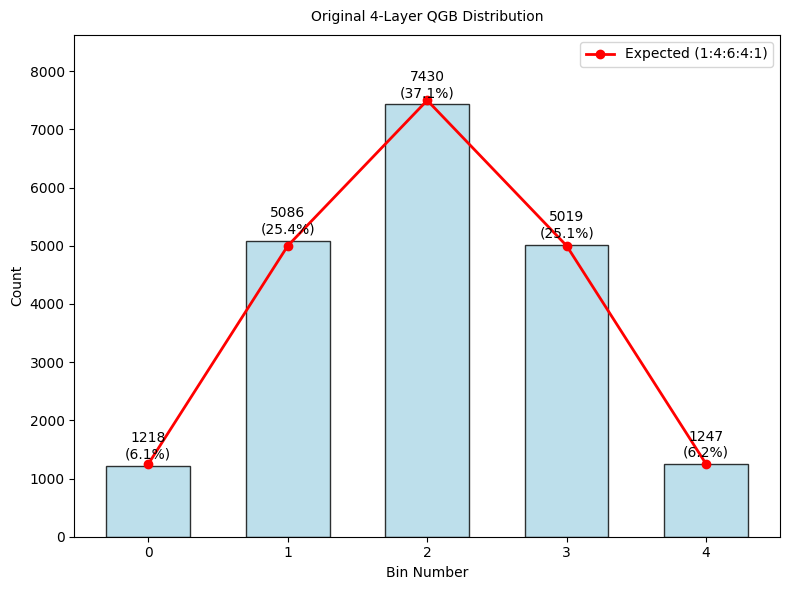


----------------------------
APPLYING RESCALING PROCEDURE
----------------------------
Total individual measurements: 20000
Total complete blocks of 8: 2500
Block sums range: 6 to 25

Individual values distribution (before blocking):
Bin 0:  1218 occurrences ( 6.09%)
Bin 1:  5086 occurrences (25.43%)
Bin 2:  7430 occurrences (37.15%)
Bin 3:  5019 occurrences (25.09%)
Bin 4:  1247 occurrences ( 6.24%)

First 10 blocks of 8 values:
Block 1: [4, 1, 3, 1, 1, 2, 2, 2] -> Sum = 16
Block 2: [1, 1, 1, 2, 1, 1, 2, 2] -> Sum = 11
Block 3: [1, 2, 3, 1, 2, 2, 1, 3] -> Sum = 15
Block 4: [2, 1, 2, 2, 3, 1, 2, 3] -> Sum = 16
Block 5: [1, 1, 1, 2, 0, 3, 2, 1] -> Sum = 11
Block 6: [3, 2, 4, 0, 2, 2, 2, 2] -> Sum = 17
Block 7: [2, 2, 2, 2, 0, 1, 3, 2] -> Sum = 14
Block 8: [3, 0, 3, 3, 4, 0, 2, 2] -> Sum = 17
Block 9: [1, 1, 2, 3, 4, 2, 3, 2] -> Sum = 18
Block 10: [2, 2, 1, 3, 4, 2, 3, 3] -> Sum = 20

Rescaled Distribution (all values):
Sum  6:   1 blocks ( 0.04%)
Sum  8:   7 blocks ( 0.28%)
Sum  9:  17

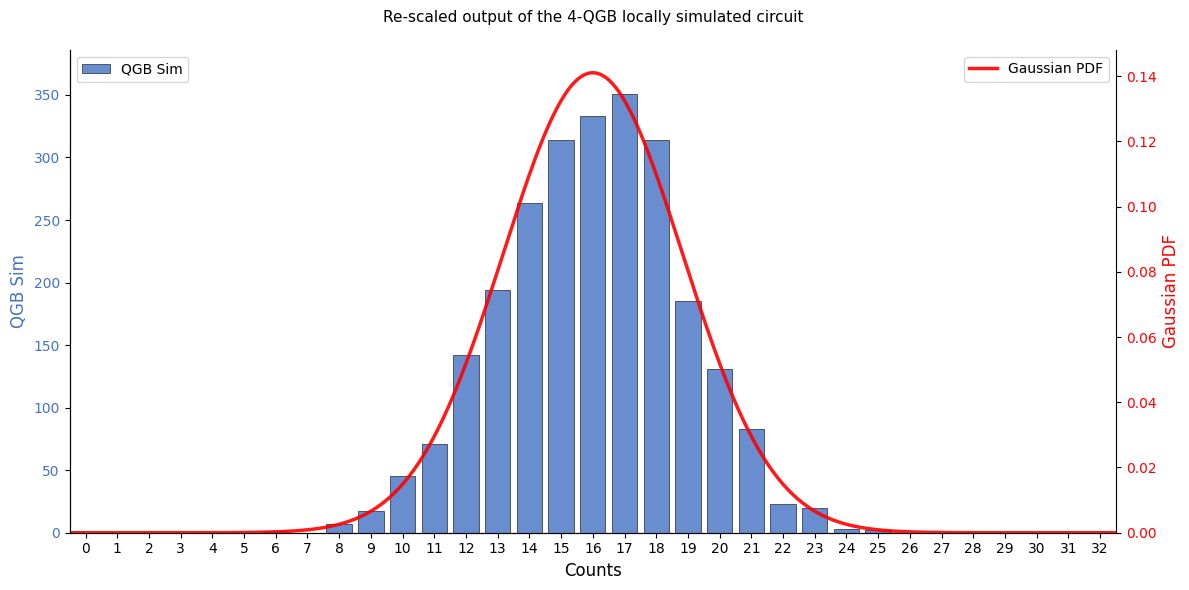


Rescaled Statistics:
Total blocks processed: 2500
Sum range: 0 to 32
Gaussian parameters: mu = 16, var = 8

--------------------------------
4-Layer QGB Theoretical Analysis
--------------------------------
Classical Galton Board paths:
Total possible paths: 2^4 = 16
Bin 0: LLLL (1 path) --> 1/16 = 6.25%
Bin 1: LLLR, LLRL, LRLL, RLLL (4 paths) --> 4/16 = 25%
Bin 2: LLRR, LRLR, LRRL, RLLR, RLRL, RRLL (6 paths) --> 6/16 = 37.5%
Bin 3: LRRR, RLRR, RRLR, RRRL (4 paths) --> 4/16 = 25%
Bin 4: RRRR (1 path) --> 1/16 = 6.25%
Binomial coefficients: C(4,k) = [1, 4, 6, 4, 1]



In [5]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import CSwapGate


def create_4layer_qgb():
    """
    Create a 4-layer QGB circuit.
    
               ● Peg #1
              / \
             ●   ● Peg #2, #3
           /  \ /  \
          ●    ●    ● Peg #4, #5, #6
        /   \ /  \ / \
       ●    ●    ●    ● Peg #7, #8, #9, #10
     /   \ /   \ /  \ /  \
    B0    B1    B2   B3  B4 (5 bins)
    
    Classical structure: 4 layers of pegs, 5 bins.
    Expected distribution: 1:4:6:4:1
    
    Qubits:
    - q0: Control/decision qubit
    - q1: Bin 0, q3: Bin 1, q5: Bin 2, q7: Bin 3, q9: Bin 4
    - q2, q4, q6, q8: Auxiliary qubits
    
    Returns:
        QuantumCircuit: 10-qubit circuit with 5 classical bits
    """
    
    # Create 10-qubit circuit with 5 classical bits for measurements
    qc = QuantumCircuit(10, 5)
    
    # --- INITIALIZATION --- #
    # The initial walker starts at qubit q5
    qc.x(5)
    qc.barrier(label="Init")
    
    # --- LAYER 1: PEGS #1 --- #
    # Spreads the walker from q5 to its neighbours, q4 and q6
    qc.h(0)
    qc.append(CSwapGate(), [0, 4, 5]); qc.cx(5, 0)
    qc.append(CSwapGate(), [0, 5, 6]); qc.cx(6, 0)
    qc.reset(0)
    qc.barrier(label="Layer1")
    
    # --- LAYER 2: PEGS #2, #3 --- #
    # Spreads the walker outwards to q3 and q7
    qc.h(0)
    qc.append(CSwapGate(), [0, 3, 4]); qc.cx(4, 0)
    qc.append(CSwapGate(), [0, 4, 5]); qc.cx(5, 0)
    qc.append(CSwapGate(), [0, 5, 6]); qc.cx(6, 0)
    qc.append(CSwapGate(), [0, 6, 7]); qc.cx(7, 0)
    qc.reset(0)
    qc.barrier(label="Layer2")
    
    # --- LAYER 3: PEGS #4, #5, #6 --- #
    # Spreads the walker outwards to q2 and q8
    qc.h(0)
    qc.append(CSwapGate(), [0, 2, 3]); qc.cx(3, 0)
    qc.append(CSwapGate(), [0, 3, 4]); qc.cx(4, 0)
    qc.append(CSwapGate(), [0, 4, 5]); qc.cx(5, 0)
    qc.append(CSwapGate(), [0, 5, 6]); qc.cx(6, 0)
    qc.append(CSwapGate(), [0, 6, 7]); qc.cx(7, 0)
    qc.append(CSwapGate(), [0, 7, 8]); qc.cx(8, 0)
    qc.reset(0)
    qc.barrier(label="Layer3")
    
    # --- LAYER 4: PEGS #7, #8, #9, #10 --- #
    # The final layer spreads the walk to the outermost bins, q1 and q9
    qc.h(0)
    qc.append(CSwapGate(), [0, 1, 2]); qc.cx(2, 0)
    qc.append(CSwapGate(), [0, 2, 3]); qc.cx(3, 0)
    qc.append(CSwapGate(), [0, 3, 4]); qc.cx(4, 0)
    qc.append(CSwapGate(), [0, 4, 5]); qc.cx(5, 0)
    qc.append(CSwapGate(), [0, 5, 6]); qc.cx(6, 0)
    qc.append(CSwapGate(), [0, 6, 7]); qc.cx(7, 0)
    qc.append(CSwapGate(), [0, 7, 8]); qc.cx(8, 0)
    qc.append(CSwapGate(), [0, 8, 9]); qc.cx(9, 0)
    qc.barrier(label="Layer4")
    
    # --- MEASUREMENTS --- #
    # Measure the five bin qubits to determine final distribution
    qc.measure([1, 3, 5, 7, 9], [0, 1, 2, 3, 4])
    
    return qc

def convert_bitstring_to_integer(bitstring):
    """
    Convert binary string to integer value for QGB.
    For 4-layer QGB with 5 bins, we need to map the measurement outcome to a value 0-4.
    
    We'll interpret this as the bin number where the particle ended up.
    Since QGB should produce exactly one particle in one bin, we find which bin is '1'.
    """
    # For QGB, exactly one bin should contain the particle
    # Find the position of the '1' bit (from right, 0-indexed)
    try:
        # Convert to list and reverse to match bin numbering
        bits = list(bitstring)
        bits.reverse()  # Now bits[0] is rightmost bit
        
        # Find which bin has the particle (should be exactly one '1')
        ones_positions = [i for i, bit in enumerate(bits) if bit == '1']
        
        if len(ones_positions) == 1:
            return ones_positions[0]  # Return bin number (0-4)
        elif len(ones_positions) == 0:
            return 0  # No particle detected, assign to bin 0
        else:
            # Multiple particles detected, sum the positions
            return sum(ones_positions) % len(bits)  # Modulo to keep in range (0-4)
            
    except:
        # Fallback: convert to integer and take modulo
        return int(bitstring, 2) % len(bitstring)

def rescale_qgb_output(raw_counts, block_size=8):
    """
    Implement the rescaling procedure:
    1. Convert bitstrings to integers (0-4 for 5-bin QGB output)
    2. Shuffle the individual results to simulate random sampling
    3. Group results into blocks of 8
    4. Sum each block to get values from 0 to 32 (8 × 4 = 32)
    5. Return histogram of these sums
    
    Args:
        raw_counts: Dictionary with bitstring keys and count values
        block_size: Size of blocks to sum (default 8)
    
    Returns:
        rescaled_counts: Dictionary with sum values as keys
        individual_values: List of all individual integer values for processing
    """
    
    # Step 1: Convert all bitstrings to integer values (0-4)
    individual_values = []
    for bitstring, count in raw_counts.items():
        integer_value = convert_bitstring_to_integer(bitstring)
        # Add this value 'count' number of times
        individual_values.extend([integer_value] * count)
    
    # Step 2: Shuffle the individual values to simulate random sampling
    np.random.shuffle(individual_values)
    
    # Step 3: Take blocks of 8 and sum each block
    rescaled_values = []
    for i in range(0, len(individual_values), block_size):
        block = individual_values[i:i+block_size]
        if len(block) == block_size:  # Only use complete blocks
            block_sum = sum(block)
            rescaled_values.append(block_sum)
    
    # Step 4: Create histogram of sums
    rescaled_counts = {}
    for value in rescaled_values:
        rescaled_counts[value] = rescaled_counts.get(value, 0) + 1
    
    return rescaled_counts, individual_values

def plot_rescaled_histogram_with_gaussian(rescaled_counts, total_blocks, num_bins):
    """
    Plot rescaled histogram for 4-layer QGB.
    
    Args:
        rescaled_counts: Dictionary with sum values and their frequencies
        total_blocks: Total number of blocks processed
        num_bins: Number of bins in the QGB (5 for 4-layer)
    """
    
    # Create figure with dual y-axes
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Prepare data for plotting
    max_sum = 8 * (num_bins - 1)  # 8 * max_value = 8 * 4 = 32 (max possible sum for 4-layer QGB)
    bin_positions = list(range(max_sum + 1))
    bin_counts = [rescaled_counts.get(i, 0) for i in bin_positions]
    
    # Primary y-axis (left): QGB Simulation counts
    bars = ax1.bar(bin_positions, bin_counts, alpha=0.8, color='#4472C4', width=0.8, edgecolor='black', linewidth=0.5, label='QGB Sim')
    
    ax1.set_xlabel('Counts', fontsize=12)
    ax1.set_ylabel('QGB Sim', fontsize=12, color='#4472C4')
    ax1.tick_params(axis='y', labelcolor='#4472C4')
    
    # Set x-axis ticks and limits
    ax1.set_xlim(-0.5, max_sum + 0.5)
    tick_spacing = max(1, max_sum // 20)  # Adjust tick spacing based on range
    ax1.set_xticks(range(0, max_sum + 1, tick_spacing))
    
    # Set y-axis for counts
    max_count = max(bin_counts) if bin_counts else 1
    ax1.set_ylim(0, max_count * 1.1)
    
    # Remove top and right spines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.grid(False)
    
    # Secondary y-axis (right): Gaussian Distribution
    ax2 = ax1.twinx()

    # Calculate Gaussian parameters for 4-layer QGB:
    # Each block sums 8 values, each value 0-4, so we have a sum of values
    # For 4-layer QGB: mean per value = 2 (center of 0,1,2,3,4), var per value = 2
    # For sum of 8 such values: mean = 8*2 = 16, var = 8*2 = 16
    mu = 16
    var = 8
    std_dev = np.sqrt(var)
    
    # Plot the Gaussian PDF
    x_cont = np.linspace(-0.5, max_sum + 0.5, 500)
    gaussian_y = norm.pdf(x_cont, mu, std_dev)
    
    # Scale Gaussian to match the visualization style
    ax2.plot(x_cont, gaussian_y, 'r-', linewidth=2.5, label='Gaussian PDF', alpha=0.9)
    
    # Set right y-axis
    max_gaussian = max(gaussian_y) * 1.05
    ax2.set_ylim(0, max_gaussian)
    ax2.set_ylabel('Gaussian PDF', fontsize=12, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.spines['top'].set_visible(False)
    
    # Add legends
    ax1.legend(loc='upper left', fontsize=10)
    ax2.legend(loc='upper right', fontsize=10)
    
    # Add title and statistics
    layer_name = 4 
    title = f'Re-scaled output of the {layer_name}-QGB locally simulated circuit'
    plt.title(title, fontsize=11, pad=20)
    
    plt.tight_layout()
    filename = f'qgb{layer_name}_rescaled.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print statistics
    print(f"\nRescaled Statistics:")
    print(f"Total blocks processed: {total_blocks}")
    print(f"Sum range: 0 to {max_sum}")
    print(f"Gaussian parameters: mu = {mu}, var = {var}")
    
    return fig

def analyze_original_distribution(raw_counts, shots, num_bins):
    """
    Analyze the original QGB distribution before rescaling.
    """
    layer_name = 4 
    print(f"\nOriginal {layer_name}-Layer QGB Distribution Analysis:")
    print("-" * (39 + layer_name))
    
    print(f"\nRaw bitstring distribution:")
    sorted_bitstrings = sorted(raw_counts.items(), key=lambda x: x[1], reverse=True)
    for bitstring, count in sorted_bitstrings:
        percentage = count / shots * 100 if shots > 0 else 0
        integer_val = convert_bitstring_to_integer(bitstring)
        print(f"'{bitstring}' -> Bin {integer_val}: {count:>5} counts ({percentage:5.2f}%)")
    
    # Convert to integer values and analyze
    integer_counts = {}
    for bitstring, count in raw_counts.items():
        integer_val = convert_bitstring_to_integer(bitstring)
        integer_counts[integer_val] = integer_counts.get(integer_val, 0) + count
    
    # Calculate statistics of original distribution
    all_values = []
    for val, count in integer_counts.items():
        all_values.extend([val] * count)
    
    mean_val = np.mean(all_values)
    std_val = np.std(all_values)
    var_val = np.var(all_values)
    
    print(f"\nStatistics of integer values:")
    print(f"Mean: {mean_val:.6f}")
    print(f"Standard deviation: {std_val:.6f}")
    print(f"Variance: {var_val:.6f}")
    
    print(f"\nDistribution by bin number:")
    for i in range(num_bins):
        count = integer_counts.get(i, 0)
        percentage = count / shots * 100 if shots > 0 else 0
        print(f"Bin {i}: {count:>5} counts ({percentage:5.2f}%)")

def plot_original_histogram(raw_counts, shots, num_bins):
    """
    Plot the original QGB distribution.
    """
    # Convert to bin distribution
    bin_counts = [0] * num_bins
    for bitstring, count in raw_counts.items():
        bin_num = convert_bitstring_to_integer(bitstring)
        if 0 <= bin_num < num_bins:
            bin_counts[bin_num] += count
    
    # Plot original distribution
    fig, ax = plt.subplots(figsize=(8, 6))
    
    bin_positions = list(range(num_bins))
    bars = ax.bar(bin_positions, bin_counts, alpha=0.8, color='lightblue', edgecolor='black', width=0.6)
    
    ax.set_xlabel('Bin Number')
    ax.set_ylabel('Count')
    layer_name = 4 
    ax.set_title(f'Original {layer_name}-Layer QGB Distribution', fontsize=10, pad=10)
    ax.set_xticks(bin_positions)
    
    # Add count labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        percentage = height / shots * 100 if shots > 0 else 0
        ax.text(
            bar.get_x() + bar.get_width()/2., 
            height + max(bin_counts)*0.01,
            f'{int(height)}\n({percentage:.1f}%)', 
            ha='center', va='bottom'
        )
    
    # Expected theoretical distribution for 4-layer: 1:4:6:4:1
    S = 2**layer_name
    expected = [shots/S, 4*shots/S, 6*shots/S, 4*shots/S, shots/S]    
    ax.plot(bin_positions, expected, 'ro-', label='Expected (1:4:6:4:1)', linewidth=2)
    ax.legend()

    # Set the y-axis limit to be 15% higher than the maximum data value
    ax.set_ylim(top=max(max(bin_counts), max(expected)) * 1.15)
    
    plt.tight_layout()
    filename = f'qgb{layer_name}_original_distribution.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


if __name__ == "__main__":
    # Create the 4-layer QGB circuit
    circuit4 = create_4layer_qgb()
    
    # Display circuit information
    print("4-Layer QGB Circuit")
    print("-" * 19)
    print(f"Total qubits: {circuit4.num_qubits}")
    print(f"Total classical bits: {circuit4.num_clbits}")
    print(f"Circuit depth: {circuit4.depth()}")
    print(f"Gate count: {len(circuit4.data)}")
    
    # Draw the circuit 
    print("\nCircuit Diagram:")
    print(circuit4.draw())
    
    # Simulate the circuit with shots divisible by 8 for clean blocking
    simulator = AerSimulator()
    tqc = transpile(circuit4, simulator)
    
    shots = 20000
    job = simulator.run(tqc, shots=shots)
    result = job.result()
    raw_counts = result.get_counts()
    
    # Determine number of bins from circuit
    num_bins = 5  # 4-layer QGB has 5 bins
    
    # Analyze original distribution
    analyze_original_distribution(raw_counts, shots, num_bins)
    
    # Plot original distribution
    plot_original_histogram(raw_counts, shots, num_bins)
    
    # Apply rescaling procedure
    print(f"\n" + "-"*28)
    print(f"APPLYING RESCALING PROCEDURE")
    print(f"-"*28)
    
    rescaled_counts, individual_values = rescale_qgb_output(raw_counts, block_size=8)
    total_blocks = len(individual_values) // 8
    
    print(f"Total individual measurements: {len(individual_values)}")
    print(f"Total complete blocks of 8: {total_blocks}")
    
    if rescaled_counts:
        print(f"Block sums range: {min(rescaled_counts.keys())} to {max(rescaled_counts.keys())}")
    else:
        print("No rescaled data available!")
        exit()
    
    # Show distribution of individual values before blocking
    print(f"\nIndividual values distribution (before blocking):")
    individual_dist = {}
    for val in individual_values:
        individual_dist[val] = individual_dist.get(val, 0) + 1
    
    for val in sorted(individual_dist.keys()):
        count = individual_dist[val]
        percentage = count / len(individual_values) * 100 if individual_values else 0
        print(f"Bin {val}: {count:>5} occurrences ({percentage:5.2f}%)")
    
    # Show first few blocks to verify randomness
    print(f"\nFirst 10 blocks of 8 values:")
    for i in range(min(10, total_blocks)):
        start_idx = i * 8
        block = individual_values[start_idx:start_idx + 8]
        block_sum = sum(block)
        print(f"Block {i+1}: {block} -> Sum = {block_sum}")
    
    # Display rescaled results
    print(f"\nRescaled Distribution (all values):")
    for sum_val, count in sorted(rescaled_counts.items()):
        percentage = count / total_blocks * 100 if total_blocks > 0 else 0
        print(f"Sum {sum_val:>2}: {count:>3} blocks ({percentage:5.2f}%)")
            
    # Create the rescaled plot
    plot_rescaled_histogram_with_gaussian(rescaled_counts, total_blocks, num_bins)
    
    # Theoretical analysis
    print(f"\n" + "-"*32)
    print("4-Layer QGB Theoretical Analysis")
    print("-"*32)
    print("Classical Galton Board paths:")
    print("Total possible paths: 2^4 = 16")
    print("Bin 0: LLLL (1 path) --> 1/16 = 6.25%")
    print("Bin 1: LLLR, LLRL, LRLL, RLLL (4 paths) --> 4/16 = 25%")
    print("Bin 2: LLRR, LRLR, LRRL, RLLR, RLRL, RRLL (6 paths) --> 6/16 = 37.5%") 
    print("Bin 3: LRRR, RLRR, RRLR, RRRL (4 paths) --> 4/16 = 25%")
    print("Bin 4: RRRR (1 path) --> 1/16 = 6.25%")
    print("Binomial coefficients: C(4,k) = [1, 4, 6, 4, 1]\n")

**5-Layer QGB Circuit**

5-Layer QGB Circuit
-------------------
Total qubits: 12
Total classical bits: 6
Circuit depth: 71
Gate count: 82

Circuit Diagram:
            Init ┌───┐   ┌───┐   ┌───┐      Layer1 ┌───┐   ┌───┐   ┌───┐   »
 q_0: ───────░───┤ H ├─■─┤ X ├─■─┤ X ├─|0>────░────┤ H ├─■─┤ X ├─■─┤ X ├─■─»
             ░   └───┘ │ └─┬─┘ │ └─┬─┘        ░    └───┘ │ └─┬─┘ │ └─┬─┘ │ »
 q_1: ───────░─────────┼───┼───┼───┼──────────░──────────┼───┼───┼───┼───┼─»
             ░         │   │   │   │          ░          │   │   │   │   │ »
 q_2: ───────░─────────┼───┼───┼───┼──────────░──────────┼───┼───┼───┼───┼─»
             ░         │   │   │   │          ░          │   │   │   │   │ »
 q_3: ───────░─────────┼───┼───┼───┼──────────░──────────┼───┼───┼───┼───┼─»
             ░         │   │   │   │          ░          │   │   │   │   │ »
 q_4: ───────░─────────┼───┼───┼───┼──────────░──────────X───┼───┼───┼───┼─»
             ░         │   │   │   │          ░          │   │   │   │   │ »
 q_5: ───────░───────

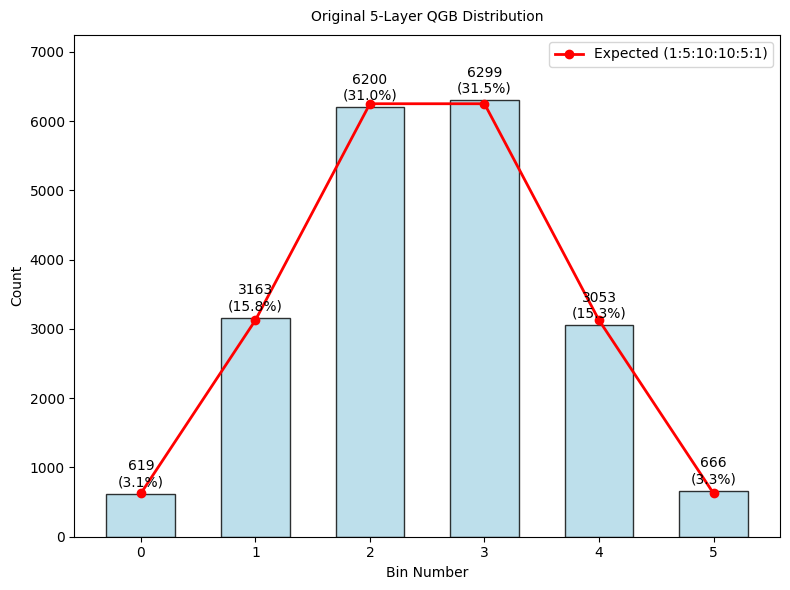


----------------------------
APPLYING RESCALING PROCEDURE
----------------------------
Total individual measurements: 20000
Total complete blocks of 8: 2500
Block sums range: 10 to 30

Individual values distribution (before blocking):
Bin 0:   619 occurrences ( 3.09%)
Bin 1:  3163 occurrences (15.82%)
Bin 2:  6200 occurrences (31.00%)
Bin 3:  6299 occurrences (31.50%)
Bin 4:  3053 occurrences (15.27%)
Bin 5:   666 occurrences ( 3.33%)

First 10 blocks of 8 values:
Block 1: [3, 3, 0, 3, 2, 4, 3, 2] -> Sum = 20
Block 2: [2, 3, 2, 4, 2, 1, 1, 3] -> Sum = 18
Block 3: [3, 3, 2, 2, 2, 2, 1, 3] -> Sum = 18
Block 4: [4, 3, 2, 3, 4, 0, 2, 2] -> Sum = 20
Block 5: [3, 3, 3, 2, 3, 2, 3, 2] -> Sum = 21
Block 6: [4, 1, 2, 3, 2, 3, 1, 1] -> Sum = 17
Block 7: [3, 2, 2, 3, 3, 0, 2, 3] -> Sum = 18
Block 8: [4, 1, 3, 3, 2, 2, 5, 1] -> Sum = 21
Block 9: [3, 2, 2, 3, 2, 3, 3, 0] -> Sum = 18
Block 10: [2, 2, 3, 3, 3, 3, 1, 2] -> Sum = 19

Rescaled Distribution (all values):
Sum 10:   2 blocks ( 0.08%)
Sum 

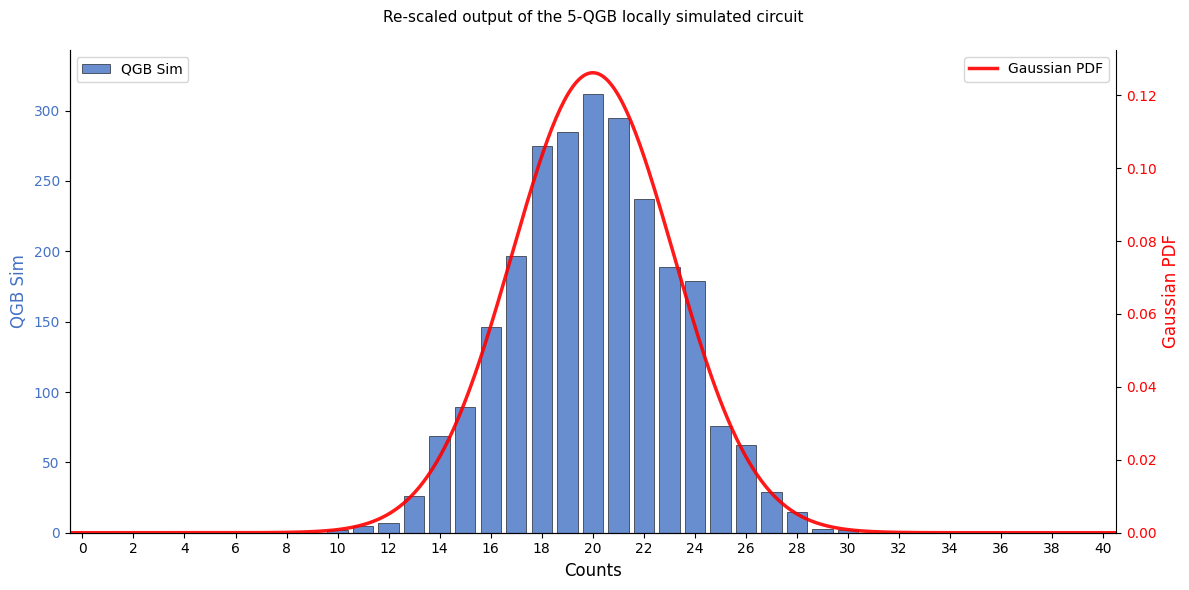


Rescaled Statistics:
Total blocks processed: 2500
Sum range: 0 to 40
Gaussian parameters: mu = 20, var = 10.0000

--------------------------------
5-Layer QGB Theoretical Analysis
--------------------------------
Classical Galton Board paths:
Total possible paths: 2^5 = 32
Bin 0: LLLLL (1 path) --> 1/32 = 3.125%
Bin 1:  5 paths with 4L+1R --> 5/32 = 15.625%
Bin 2: 10 paths with 3L+2R --> 10/32 = 31.25%
Bin 3: 10 paths with 2L+3R --> 10/32 = 31.25%
Bin 4:  5 paths with 1L+4R --> 5/32 = 15.625%
Bin 5: RRRRR (1 path) --> 1/32 = 3.125%
Binomial coefficients: C(5,k) = [1, 5, 10, 10, 5, 1]



In [6]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import CSwapGate


def create_5layer_qgb():
    """
    Create a 5-layer QGB circuit.
    
                   ● Peg #1
                  / \
                 ●   ● Peg #2, #3
               /  \ /  \
              ●    ●    ● Peg #4, #5, #6
            /   \ /  \ /  \
           ●     ●     ●    ● Peg #7, #8, #9, #10
         /   \ /   \ /   \ /  \
        ●     ●     ●     ●    ● Peg #11, #12, #13, #14, #15
       /  \ /   \ /   \ /   \ /  \
     B0    B1    B2    B3    B4   B5 (6 bins)
    
    Classical structure: 5 layers of pegs, 6 bins.
    Expected distribution: 1:5:10:10:5:1
    
    Qubits:
    - q0: Control/decision qubit
    - q1, q3, q5, q7, q9, q11: Bin qubits
    - q2, q4, q6, q8, q10: Auxiliary qubits
    
    Returns:
        QuantumCircuit: 12-qubit circuit with 6 classical bits
    """
    
    # Create 12-qubit circuit with 6 classical bits for measurements
    qc = QuantumCircuit(12, 6)
    
    # --- INITIALIZATION --- #
    # The initial walker starts at qubit q6
    qc.x(6)
    qc.barrier(label="Init")
    
    # --- LAYER 1: PEGS #1 --- #
    # Spreads the walker from q6 to its neighbours, q5 and q7
    qc.h(0)
    qc.append(CSwapGate(), [0, 5, 6]); qc.cx(6, 0)
    qc.append(CSwapGate(), [0, 6, 7]); qc.cx(7, 0)
    qc.reset(0)
    qc.barrier(label="Layer1")
    
    # --- LAYER 2: PEGS #2, #3 --- #
    # Spreads the walker outwards to q4 and q8
    qc.h(0)
    qc.append(CSwapGate(), [0, 4, 5]); qc.cx(5, 0)
    qc.append(CSwapGate(), [0, 5, 6]); qc.cx(6, 0)
    qc.append(CSwapGate(), [0, 6, 7]); qc.cx(7, 0)
    qc.append(CSwapGate(), [0, 7, 8]); qc.cx(8, 0)
    qc.reset(0)
    qc.barrier(label="Layer2")
    
    # --- LAYER 3: PEGS #4, #5, #6 --- #
    # Spreads the walker outwards to q3 and q9
    qc.h(0)
    qc.append(CSwapGate(), [0, 3, 4]); qc.cx(4, 0)
    qc.append(CSwapGate(), [0, 4, 5]); qc.cx(5, 0)
    qc.append(CSwapGate(), [0, 5, 6]); qc.cx(6, 0)
    qc.append(CSwapGate(), [0, 6, 7]); qc.cx(7, 0)
    qc.append(CSwapGate(), [0, 7, 8]); qc.cx(8, 0)
    qc.append(CSwapGate(), [0, 8, 9]); qc.cx(9, 0)
    qc.reset(0)
    qc.barrier(label="Layer3")
    
    # --- LAYER 4: PEGS #7, #8, #9, #10 --- #
    # Spreads the walker outwards to q2 and q10
    qc.h(0)
    qc.append(CSwapGate(), [0, 2, 3]); qc.cx(3, 0)
    qc.append(CSwapGate(), [0, 3, 4]); qc.cx(4, 0)
    qc.append(CSwapGate(), [0, 4, 5]); qc.cx(5, 0)
    qc.append(CSwapGate(), [0, 5, 6]); qc.cx(6, 0)
    qc.append(CSwapGate(), [0, 6, 7]); qc.cx(7, 0)
    qc.append(CSwapGate(), [0, 7, 8]); qc.cx(8, 0)
    qc.append(CSwapGate(), [0, 8, 9]); qc.cx(9, 0)
    qc.append(CSwapGate(), [0, 9, 10]); qc.cx(10, 0)
    qc.reset(0)
    qc.barrier(label="Layer4")
    
    # --- LAYER 5: PEGS #11, #12, #13, #14, #15 --- #
    # The final layer spreads the walk to the outermost bins, q1 and q11
    qc.h(0)
    qc.append(CSwapGate(), [0, 1, 2]); qc.cx(2, 0)
    qc.append(CSwapGate(), [0, 2, 3]); qc.cx(3, 0)
    qc.append(CSwapGate(), [0, 3, 4]); qc.cx(4, 0)
    qc.append(CSwapGate(), [0, 4, 5]); qc.cx(5, 0)
    qc.append(CSwapGate(), [0, 5, 6]); qc.cx(6, 0)
    qc.append(CSwapGate(), [0, 6, 7]); qc.cx(7, 0)
    qc.append(CSwapGate(), [0, 7, 8]); qc.cx(8, 0)
    qc.append(CSwapGate(), [0, 8, 9]); qc.cx(9, 0)
    qc.append(CSwapGate(), [0, 9, 10]); qc.cx(10, 0)
    qc.append(CSwapGate(), [0, 10, 11]); qc.cx(11, 0)
    qc.barrier(label="Layer5")
    
    # --- MEASUREMENTS --- #
    # Measure the six bin qubits to determine final distribution
    qc.measure([1, 3, 5, 7, 9, 11], [0, 1, 2, 3, 4, 5])
    
    return qc

def convert_bitstring_to_integer(bitstring):
    """
    Convert binary string to integer value for QGB.
    For 5-layer QGB with 6 bins, we need to map the measurement outcome to a value 0-5
    
    We'll interpret this as the bin number where the particle ended up.
    Since QGB should produce exactly one particle in one bin, we find which bin is '1'.
    """
    # For QGB, exactly one bin should contain the particle
    # Find the position of the '1' bit (from right, 0-indexed)
    try:
        # Convert to list and reverse to match bin numbering
        bits = list(bitstring)
        bits.reverse()  # Now bits[0] is rightmost bit
        
        # Find which bin has the particle (should be exactly one '1')
        ones_positions = [i for i, bit in enumerate(bits) if bit == '1']
        
        if len(ones_positions) == 1:
            return ones_positions[0]  # Return bin number (0-5)
        elif len(ones_positions) == 0:
            return 0  # No particle detected, assign to bin 0
        else:
            # Multiple particles detected, sum the positions
            return sum(ones_positions) % len(bits)  # Modulo to keep in range (0-5)
            
    except:
        # Fallback: convert to integer and take modulo
        return int(bitstring, 2) % len(bitstring)

def rescale_qgb_output(raw_counts, block_size=8):
    """
    Implement the rescaling procedure:
    1. Convert bitstrings to integers (0-5 for 6-bin QGB output)
    2. Shuffle the individual results to simulate random sampling
    3. Group results into blocks of 8
    4. Sum each block to get values from 0 to 40 (8 × 5 = 40)
    5. Return histogram of these sums
    
    Args:
        raw_counts: Dictionary with bitstring keys and count values
        block_size: Size of blocks to sum (default 8)
    
    Returns:
        rescaled_counts: Dictionary with sum values as keys
        individual_values: List of all individual integer values for processing
    """
    
    # Step 1: Convert all bitstrings to integer values (0-5)
    individual_values = []
    for bitstring, count in raw_counts.items():
        integer_value = convert_bitstring_to_integer(bitstring)
        # Add this value 'count' number of times
        individual_values.extend([integer_value] * count)
    
    # Step 2: Shuffle the individual values to simulate random sampling
    np.random.shuffle(individual_values)
    
    # Step 3: Take blocks of 8 and sum each block
    rescaled_values = []
    for i in range(0, len(individual_values), block_size):
        block = individual_values[i:i+block_size]
        if len(block) == block_size:  # Only use complete blocks
            block_sum = sum(block)
            rescaled_values.append(block_sum)
    
    # Step 4: Create histogram of sums
    rescaled_counts = {}
    for value in rescaled_values:
        rescaled_counts[value] = rescaled_counts.get(value, 0) + 1
    
    return rescaled_counts, individual_values

def plot_rescaled_histogram_with_gaussian(rescaled_counts, total_blocks, num_bins):
    """
    Plot rescaled histogram for 5-layer QGB.
    
    Args:
        rescaled_counts: Dictionary with sum values and their frequencies
        total_blocks: Total number of blocks processed
        num_bins: Number of bins in the QGB (6 for 5-layer)
    """
    
    # Create figure with dual y-axes
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    # Prepare data for plotting
    max_sum = 8 * (num_bins - 1)  # 8 * max_value = 8 * 5 = 40 (max possible sum for 5-layer QGB)
    bin_positions = list(range(max_sum + 1))
    bin_counts = [rescaled_counts.get(i, 0) for i in bin_positions]
    
    # Primary y-axis (left): QGB Simulation counts
    bars = ax1.bar(bin_positions, bin_counts, alpha=0.8, color='#4472C4', width=0.8, edgecolor='black', linewidth=0.5, label='QGB Sim')
    
    ax1.set_xlabel('Counts', fontsize=12)
    ax1.set_ylabel('QGB Sim', fontsize=12, color='#4472C4')
    ax1.tick_params(axis='y', labelcolor='#4472C4')
    
    # Set x-axis ticks and limits
    ax1.set_xlim(-0.5, max_sum + 0.5)
    tick_spacing = max(1, max_sum // 20)  # Adjust tick spacing based on range
    ax1.set_xticks(range(0, max_sum + 1, tick_spacing))
    
    # Set y-axis for counts
    max_count = max(bin_counts) if bin_counts else 1
    ax1.set_ylim(0, max_count * 1.1)
    
    # Remove top and right spines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.grid(False)
    
    # Secondary y-axis (right): Gaussian Distribution
    ax2 = ax1.twinx()

    # Calculate Gaussian parameters for 5-layer QGB:
    # Each block sums 8 values, each value 0-5, so we have a sum of values
    # For 5-layer QGB: mean per value = 2.5 (center of 0,1,2,3,4,5), var per value = 35/12
    # For sum of 8 such values: mean = 8*2.5 = 20, var = 8*35/12 = 70/3
    mu = 20
    var = 10
    std_dev = np.sqrt(var)
    
    # Plot the Gaussian PDF
    x_cont = np.linspace(-0.5, max_sum + 0.5, 500)
    gaussian_y = norm.pdf(x_cont, mu, std_dev)
    
    # Scale Gaussian to match the visualization style
    ax2.plot(x_cont, gaussian_y, 'r-', linewidth=2.5, label='Gaussian PDF', alpha=0.9)
    
    # Set right y-axis
    max_gaussian = max(gaussian_y) * 1.05
    ax2.set_ylim(0, max_gaussian)
    ax2.set_ylabel('Gaussian PDF', fontsize=12, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.spines['top'].set_visible(False)
    
    # Add legends
    ax1.legend(loc='upper left', fontsize=10)
    ax2.legend(loc='upper right', fontsize=10)
    
    # Add title and statistics
    layer_name = 5 
    title = f'Re-scaled output of the {layer_name}-QGB locally simulated circuit'
    plt.title(title, fontsize=11, pad=20)
    
    plt.tight_layout()
    filename = f'qgb{layer_name}_rescaled.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print statistics
    print(f"\nRescaled Statistics:")
    print(f"Total blocks processed: {total_blocks}")
    print(f"Sum range: 0 to {max_sum}")
    print(f"Gaussian parameters: mu = {mu}, var = {var:.4f}")
    
    return fig

def analyze_original_distribution(raw_counts, shots, num_bins):
    """
    Analyze the original QGB distribution before rescaling.
    """
    layer_name = 5 
    print(f"\nOriginal {layer_name}-Layer QGB Distribution Analysis:")
    print("-" * (37 + layer_name))
    
    print(f"\nRaw bitstring distribution:")
    sorted_bitstrings = sorted(raw_counts.items(), key=lambda x: x[1], reverse=True)
    for bitstring, count in sorted_bitstrings:
        percentage = count / shots * 100 if shots > 0 else 0
        integer_val = convert_bitstring_to_integer(bitstring)
        print(f"'{bitstring}' -> Bin {integer_val}: {count:>5} counts ({percentage:5.2f}%)")
    
    # Convert to integer values and analyze
    integer_counts = {}
    for bitstring, count in raw_counts.items():
        integer_val = convert_bitstring_to_integer(bitstring)
        integer_counts[integer_val] = integer_counts.get(integer_val, 0) + count
    
    # Calculate statistics of original distribution
    all_values = []
    for val, count in integer_counts.items():
        all_values.extend([val] * count)
    
    mean_val = np.mean(all_values)
    std_val = np.std(all_values)
    var_val = np.var(all_values)
    
    print(f"\nStatistics of integer values:")
    print(f"Mean: {mean_val:.6f}")
    print(f"Standard deviation: {std_val:.6f}")
    print(f"Variance: {var_val:.6f}")
    
    print(f"\nDistribution by bin number:")
    for i in range(num_bins):
        count = integer_counts.get(i, 0)
        percentage = count / shots * 100 if shots > 0 else 0
        print(f"Bin {i}: {count:>5} counts ({percentage:5.2f}%)")

def plot_original_histogram(raw_counts, shots, num_bins):
    """
    Plot the original QGB distribution.
    """
    # Convert to bin distribution
    bin_counts = [0] * num_bins
    for bitstring, count in raw_counts.items():
        bin_num = convert_bitstring_to_integer(bitstring)
        if 0 <= bin_num < num_bins:
            bin_counts[bin_num] += count
    
    # Plot original distribution
    fig, ax = plt.subplots(figsize=(8, 6))
    
    bin_positions = list(range(num_bins))
    bars = ax.bar(bin_positions, bin_counts, alpha=0.8, color='lightblue', edgecolor='black', width=0.6)
    
    ax.set_xlabel('Bin Number')
    ax.set_ylabel('Count')
    layer_name = 5 
    ax.set_title(f'Original {layer_name}-Layer QGB Distribution', fontsize=10, pad=10)
    ax.set_xticks(bin_positions)
    
    # Add count labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        percentage = height / shots * 100 if shots > 0 else 0
        ax.text(
            bar.get_x() + bar.get_width()/2., 
            height + max(bin_counts)*0.01,
            f'{int(height)}\n({percentage:.1f}%)', 
            ha='center', va='bottom'
        )
    
    # Expected theoretical distribution for 5-layer: 1:5:10:10:5:1
    S = 2**layer_name
    expected = [shots/S, 5*shots/S, 10*shots/S, 10*shots/S, 5*shots/S, shots/S]    
    ax.plot(bin_positions, expected, 'ro-', label='Expected (1:5:10:10:5:1)', linewidth=2)
    ax.legend()

    # Set the y-axis limit to be 15% higher than the maximum data value
    ax.set_ylim(top=max(max(bin_counts), max(expected)) * 1.15)
    
    plt.tight_layout()
    filename = f'qgb{layer_name}_original_distribution.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()


if __name__ == "__main__":
    # Create the 5-layer QGB circuit
    circuit5 = create_5layer_qgb()
    
    # Display circuit information
    print("5-Layer QGB Circuit")
    print("-" * 19)
    print(f"Total qubits: {circuit5.num_qubits}")
    print(f"Total classical bits: {circuit5.num_clbits}")
    print(f"Circuit depth: {circuit5.depth()}")
    print(f"Gate count: {len(circuit5.data)}")
    
    # Draw the circuit 
    print("\nCircuit Diagram:")
    print(circuit5.draw())
    
    # Simulate the circuit with shots divisible by 8 for clean blocking
    simulator = AerSimulator()
    tqc = transpile(circuit5, simulator)
    
    shots = 20000
    job = simulator.run(tqc, shots=shots)
    result = job.result()
    raw_counts = result.get_counts()
    
    # Determine number of bins from circuit
    num_bins = 6  # 5-layer QGB has 6 bins
    
    # Analyze original distribution
    analyze_original_distribution(raw_counts, shots, num_bins)
    
    # Plot original distribution
    plot_original_histogram(raw_counts, shots, num_bins)
    
    # Apply rescaling procedure
    print(f"\n" + "-"*28)
    print(f"APPLYING RESCALING PROCEDURE")
    print(f"-"*28)
    
    rescaled_counts, individual_values = rescale_qgb_output(raw_counts, block_size=8)
    total_blocks = len(individual_values) // 8
    
    print(f"Total individual measurements: {len(individual_values)}")
    print(f"Total complete blocks of 8: {total_blocks}")
    
    if rescaled_counts:
        print(f"Block sums range: {min(rescaled_counts.keys())} to {max(rescaled_counts.keys())}")
    else:
        print("No rescaled data available!")
        exit()
    
    # Show distribution of individual values before blocking
    print(f"\nIndividual values distribution (before blocking):")
    individual_dist = {}
    for val in individual_values:
        individual_dist[val] = individual_dist.get(val, 0) + 1
    
    for val in sorted(individual_dist.keys()):
        count = individual_dist[val]
        percentage = count / len(individual_values) * 100 if individual_values else 0
        print(f"Bin {val}: {count:>5} occurrences ({percentage:5.2f}%)")
    
    # Show first few blocks to verify randomness
    print(f"\nFirst 10 blocks of 8 values:")
    for i in range(min(10, total_blocks)):
        start_idx = i * 8
        block = individual_values[start_idx:start_idx + 8]
        block_sum = sum(block)
        print(f"Block {i+1}: {block} -> Sum = {block_sum}")
    
    # Display rescaled results (show more values for 5-layer)
    print(f"\nRescaled Distribution (all values):")
    for sum_val, count in sorted(rescaled_counts.items()):
        percentage = count / total_blocks * 100 if total_blocks > 0 else 0
        print(f"Sum {sum_val:>2}: {count:>3} blocks ({percentage:5.2f}%)")
            
    # Create the rescaled plot
    plot_rescaled_histogram_with_gaussian(rescaled_counts, total_blocks, num_bins)
    
    # Theoretical analysis
    print(f"\n" + "-"*32)
    print("5-Layer QGB Theoretical Analysis")
    print("-"*32)
    print("Classical Galton Board paths:")
    print("Total possible paths: 2^5 = 32")
    print("Bin 0: LLLLL (1 path) --> 1/32 = 3.125%")
    print("Bin 1:  5 paths with 4L+1R --> 5/32 = 15.625%")
    print("Bin 2: 10 paths with 3L+2R --> 10/32 = 31.25%")
    print("Bin 3: 10 paths with 2L+3R --> 10/32 = 31.25%") 
    print("Bin 4:  5 paths with 1L+4R --> 5/32 = 15.625%")
    print("Bin 5: RRRRR (1 path) --> 1/32 = 3.125%")
    print("Binomial coefficients: C(5,k) = [1, 5, 10, 10, 5, 1]\n")

**Generalized L-Layer QGB Circuit**

--------------------------------------
ANALYZING 1-LAYER QUANTUM GALTON BOARD
--------------------------------------

Circuit Information:
Number of layers: 1
Number of bins: 2
Total qubits: 4
Total classical bits: 2
Circuit depth: 6
Gate count: 9

Circuit Diagram:

           Init ┌───┐   ┌───┐    Layer 1       
q_0: ───────░───┤ H ├─■─┤ X ├─■─────░──────────
            ░   └───┘ │ └─┬─┘ │     ░    ┌─┐   
q_1: ───────░─────────X───┼───┼─────░────┤M├───
     ┌───┐  ░         │   │   │     ░    └╥┘   
q_2: ┤ X ├──░─────────X───■───X─────░─────╫────
     └───┘  ░                 │     ░     ║ ┌─┐
q_3: ───────░─────────────────X─────░─────╫─┤M├
            ░                       ░     ║ └╥┘
c: 2/═════════════════════════════════════╩══╩═
                                          0  1 

Simulating circuit...
Simulation complete.

Original 1-Layer QGB Distribution Analysis:
-------------------------------------------

Distribution by bin number:
Bin 0:  10119 counts ( 50.59%)
Bin 1:   988

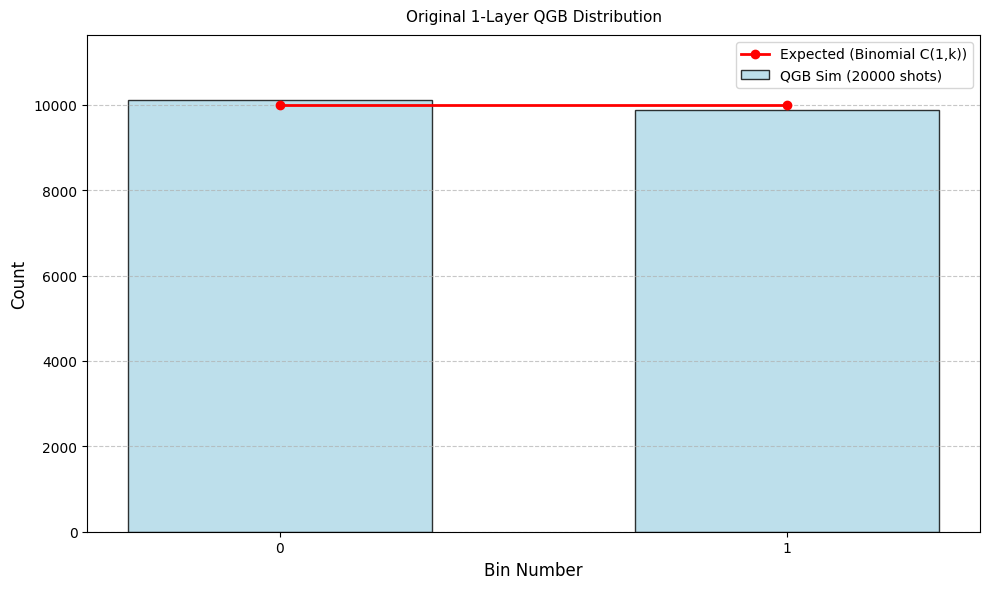


----------------------------
APPLYING RESCALING PROCEDURE
----------------------------



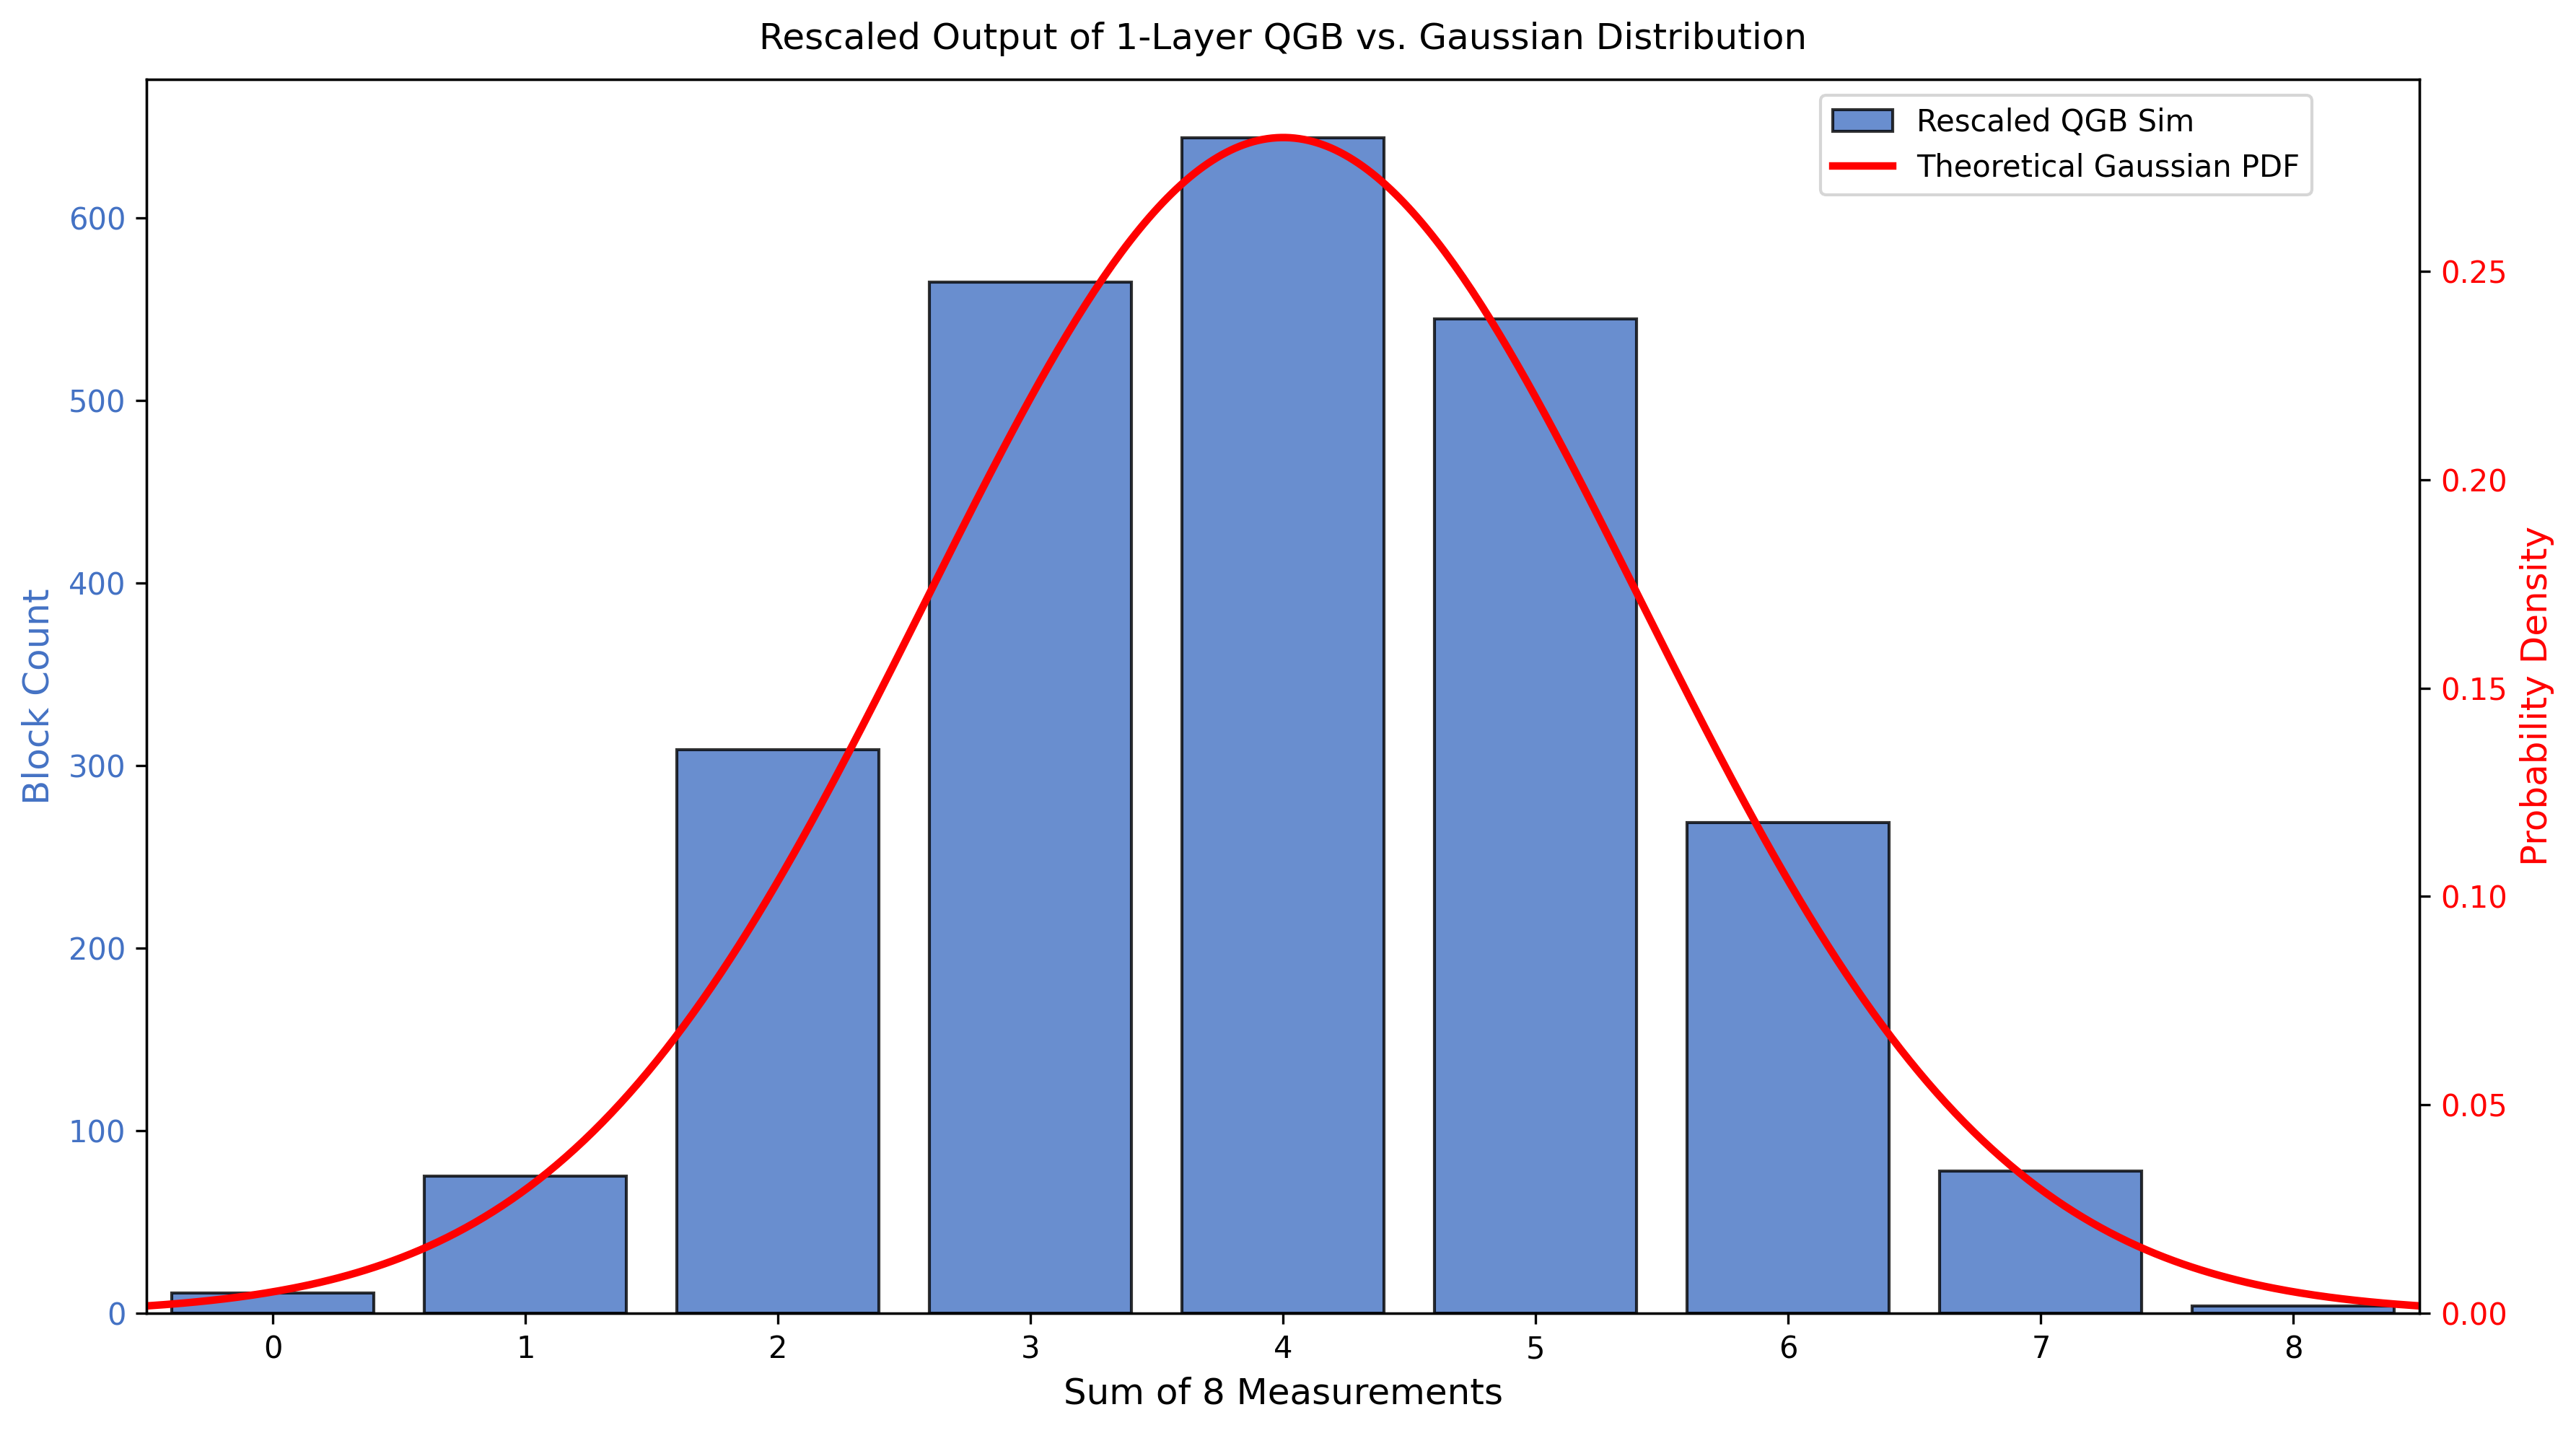


Rescaled Statistics:
Total blocks processed: 2500
Theoretical Gaussian parameters: mu = 4.00, var = 2.00

--------------------------------
1-Layer QGB Theoretical Analysis
--------------------------------

Classical Galton Board paths: 2^1 = 2

Binomial Distribution C(1,k):
Bin | Coeffs  | Percentage
----|---------|-----------
  0 |      1  |   50.000%
  1 |      1  |   50.000%

Expected outcome ratios: [1, 1]


--------------------------------------
ANALYZING 2-LAYER QUANTUM GALTON BOARD
--------------------------------------

Circuit Information:
Number of layers: 2
Number of bins: 3
Total qubits: 6
Total classical bits: 3
Circuit depth: 17
Gate count: 22

Circuit Diagram:

           Init ┌───┐   ┌───┐   ┌───┐      Layer 1 ┌───┐   ┌───┐   ┌───┐   »
q_0: ───────░───┤ H ├─■─┤ X ├─■─┤ X ├─|0>─────░────┤ H ├─■─┤ X ├─■─┤ X ├─■─»
            ░   └───┘ │ └─┬─┘ │ └─┬─┘         ░    └───┘ │ └─┬─┘ │ └─┬─┘ │ »
q_1: ───────░─────────┼───┼───┼───┼───────────░──────────X───┼───┼───┼───┼─»
      

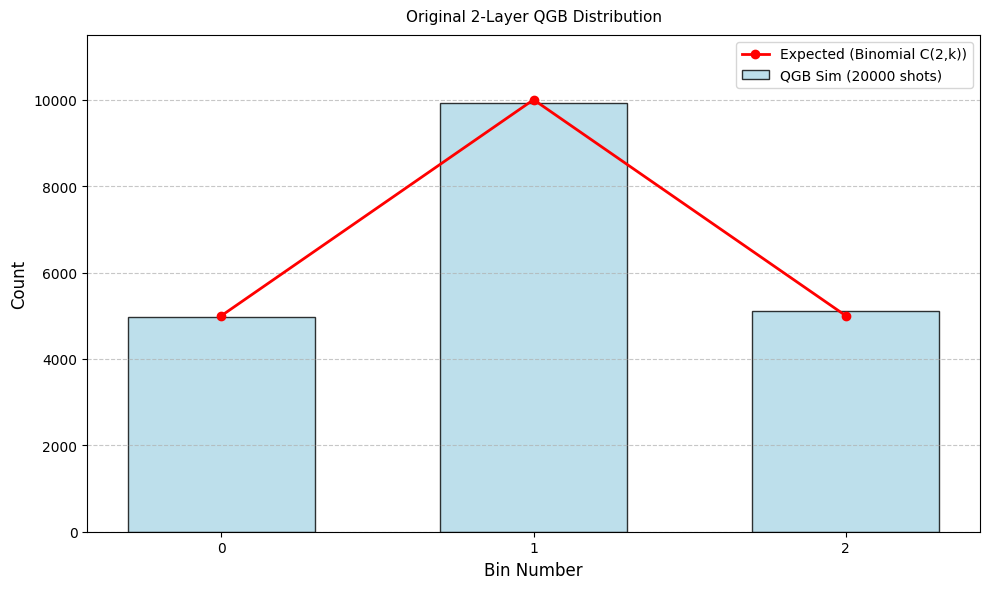


----------------------------
APPLYING RESCALING PROCEDURE
----------------------------



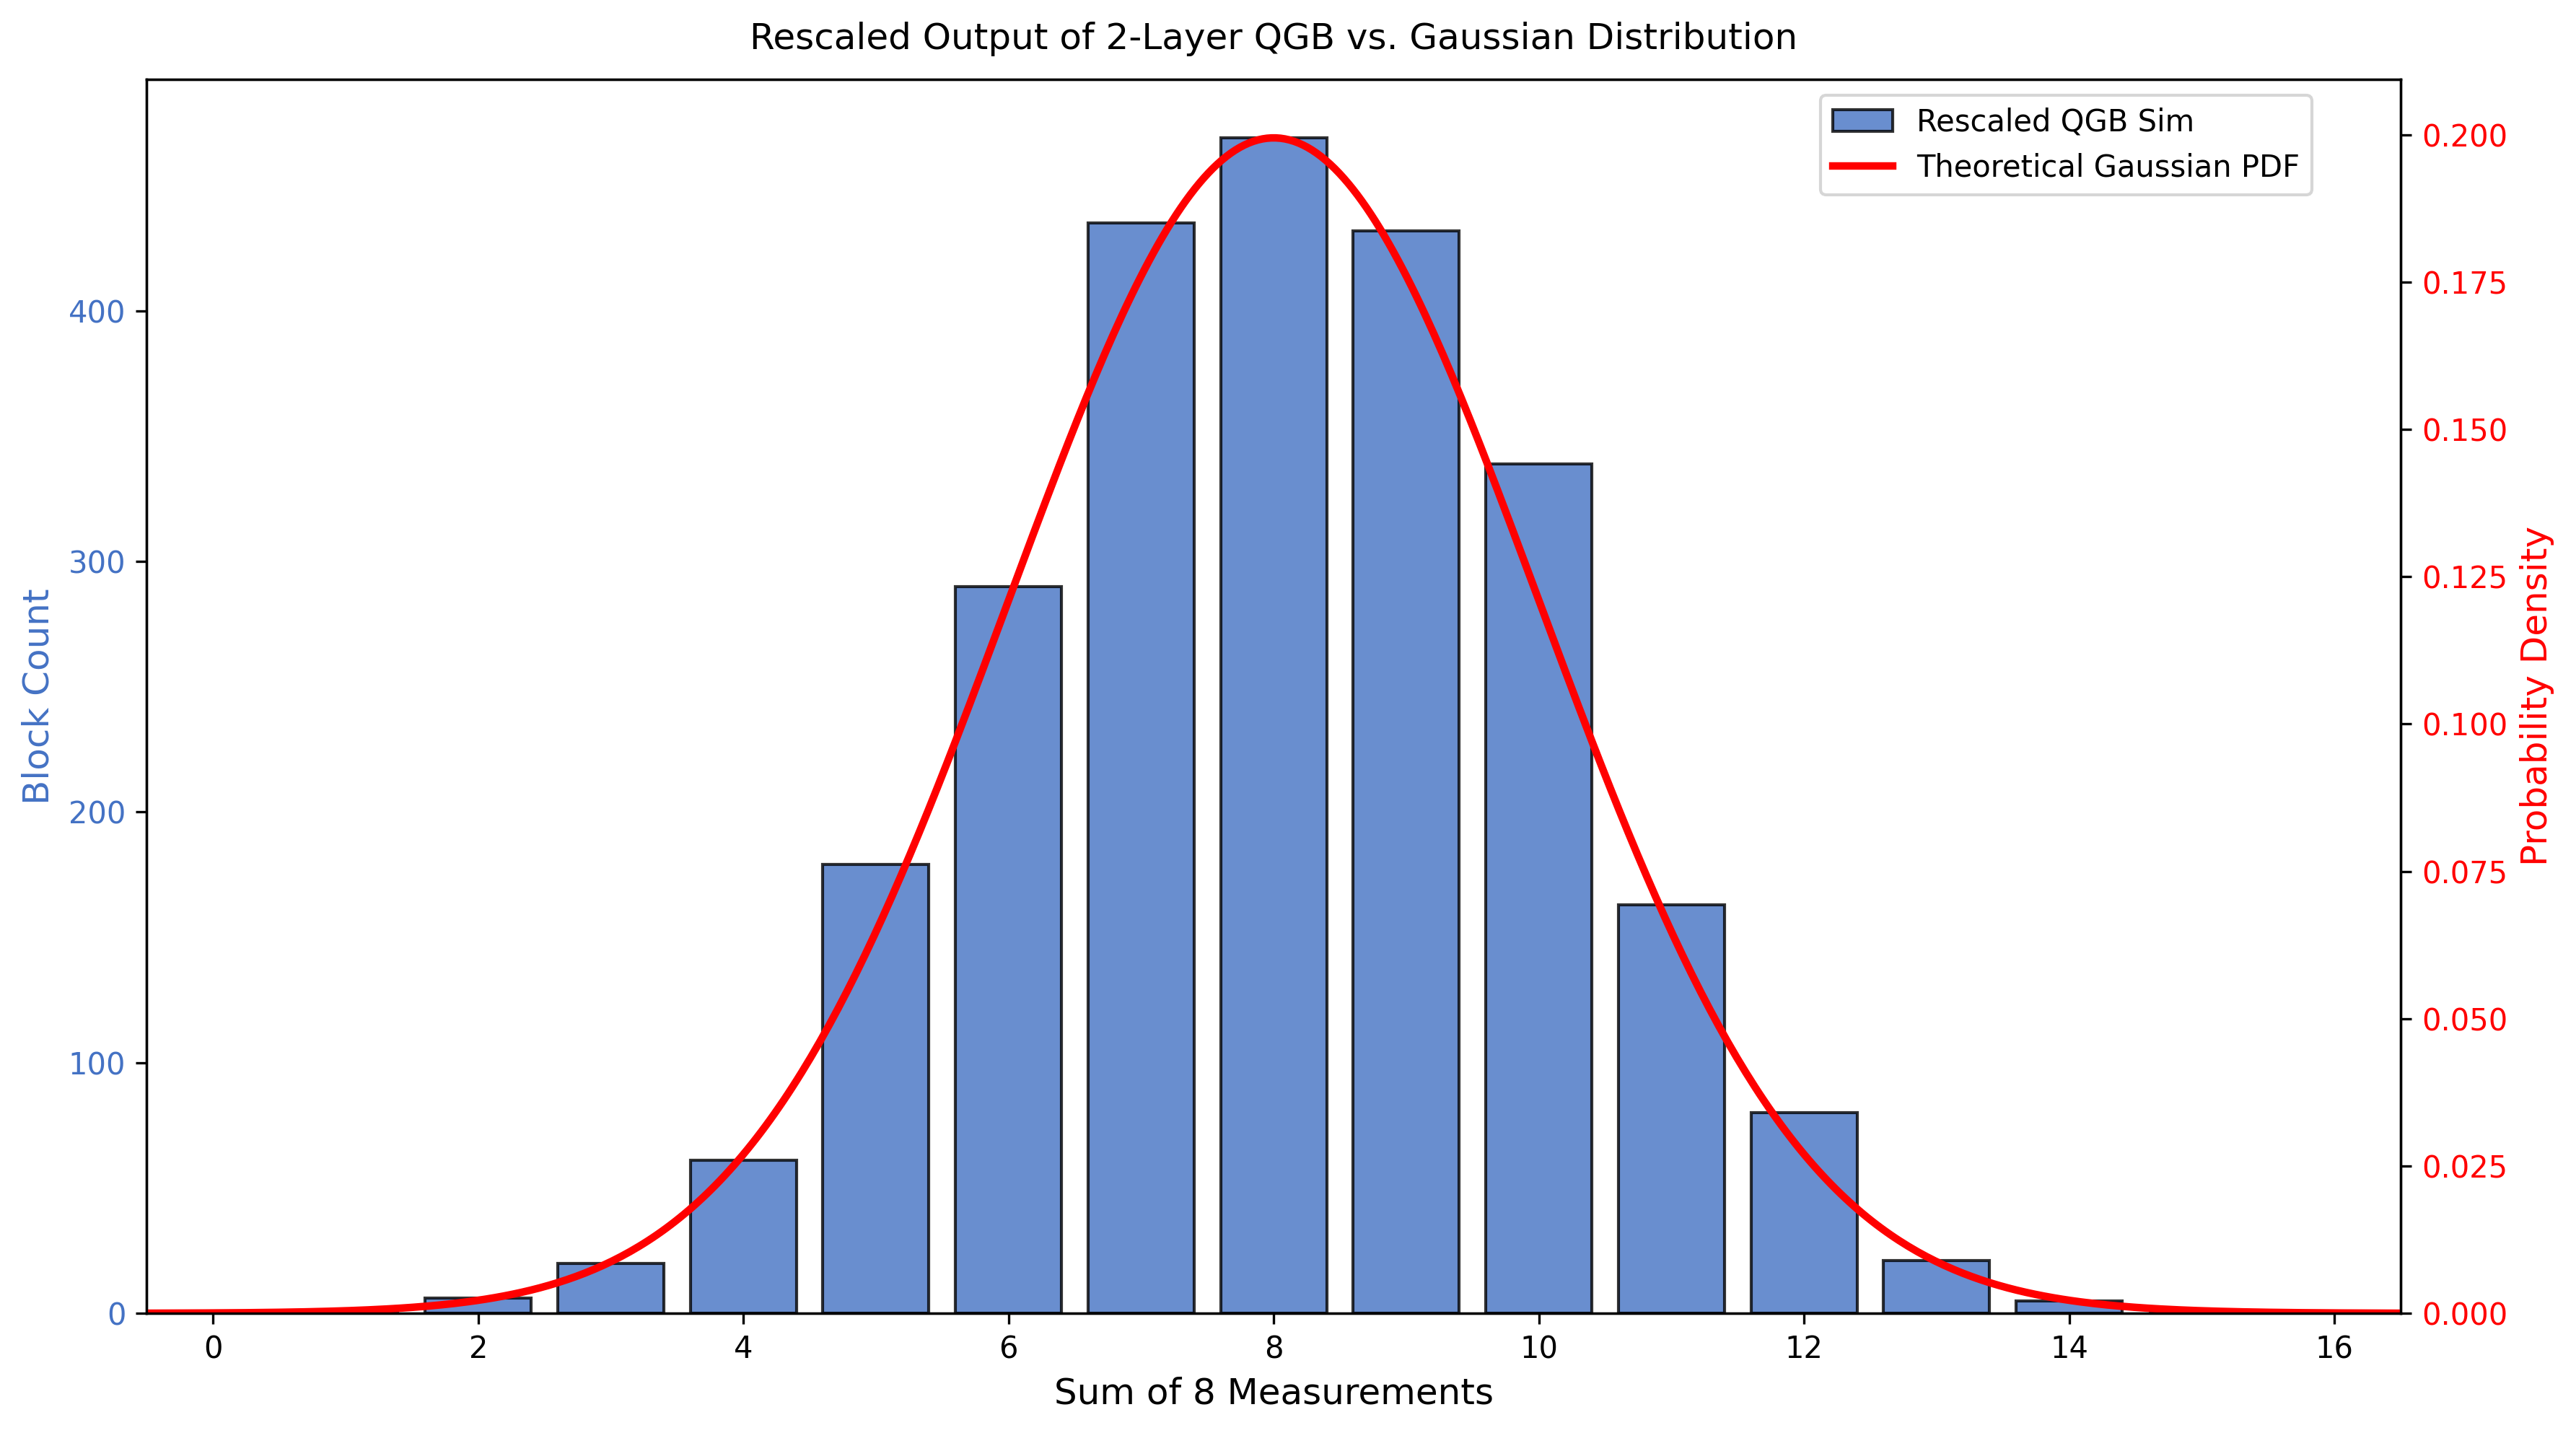


Rescaled Statistics:
Total blocks processed: 2500
Theoretical Gaussian parameters: mu = 8.00, var = 4.00

--------------------------------
2-Layer QGB Theoretical Analysis
--------------------------------

Classical Galton Board paths: 2^2 = 4

Binomial Distribution C(2,k):
Bin | Coeffs  | Percentage
----|---------|-----------
  0 |      1  |   25.000%
  1 |      2  |   50.000%
  2 |      1  |   25.000%

Expected outcome ratios: [1, 2, 1]


--------------------------------------
ANALYZING 3-LAYER QUANTUM GALTON BOARD
--------------------------------------

Circuit Information:
Number of layers: 3
Number of bins: 4
Total qubits: 8
Total classical bits: 4
Circuit depth: 31
Gate count: 38

Circuit Diagram:

           Init ┌───┐   ┌───┐   ┌───┐      Layer 1 ┌───┐   ┌───┐   ┌───┐   »
q_0: ───────░───┤ H ├─■─┤ X ├─■─┤ X ├─|0>─────░────┤ H ├─■─┤ X ├─■─┤ X ├─■─»
            ░   └───┘ │ └─┬─┘ │ └─┬─┘         ░    └───┘ │ └─┬─┘ │ └─┬─┘ │ »
q_1: ───────░─────────┼───┼───┼───┼───────────░───────

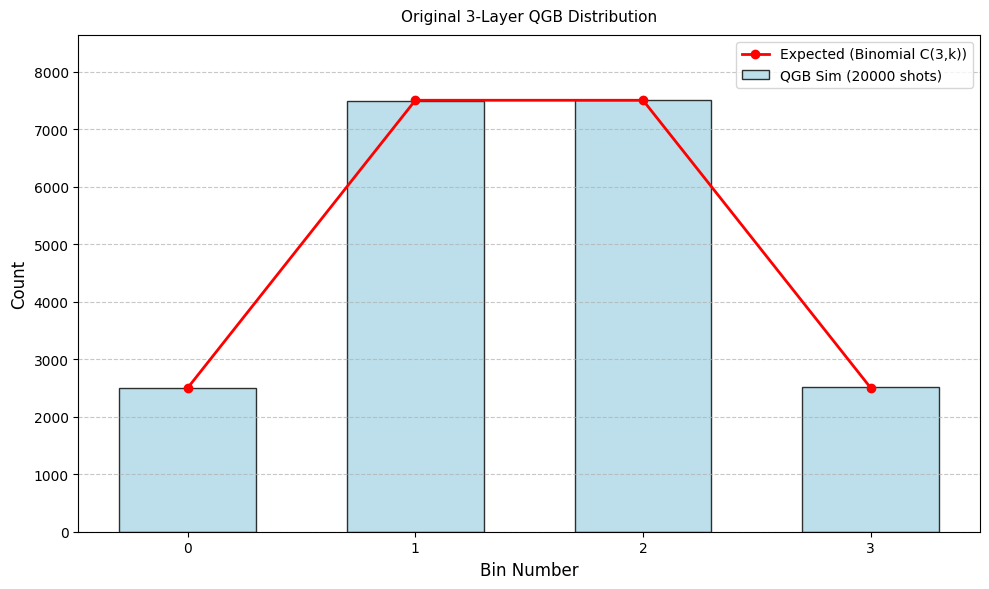


----------------------------
APPLYING RESCALING PROCEDURE
----------------------------



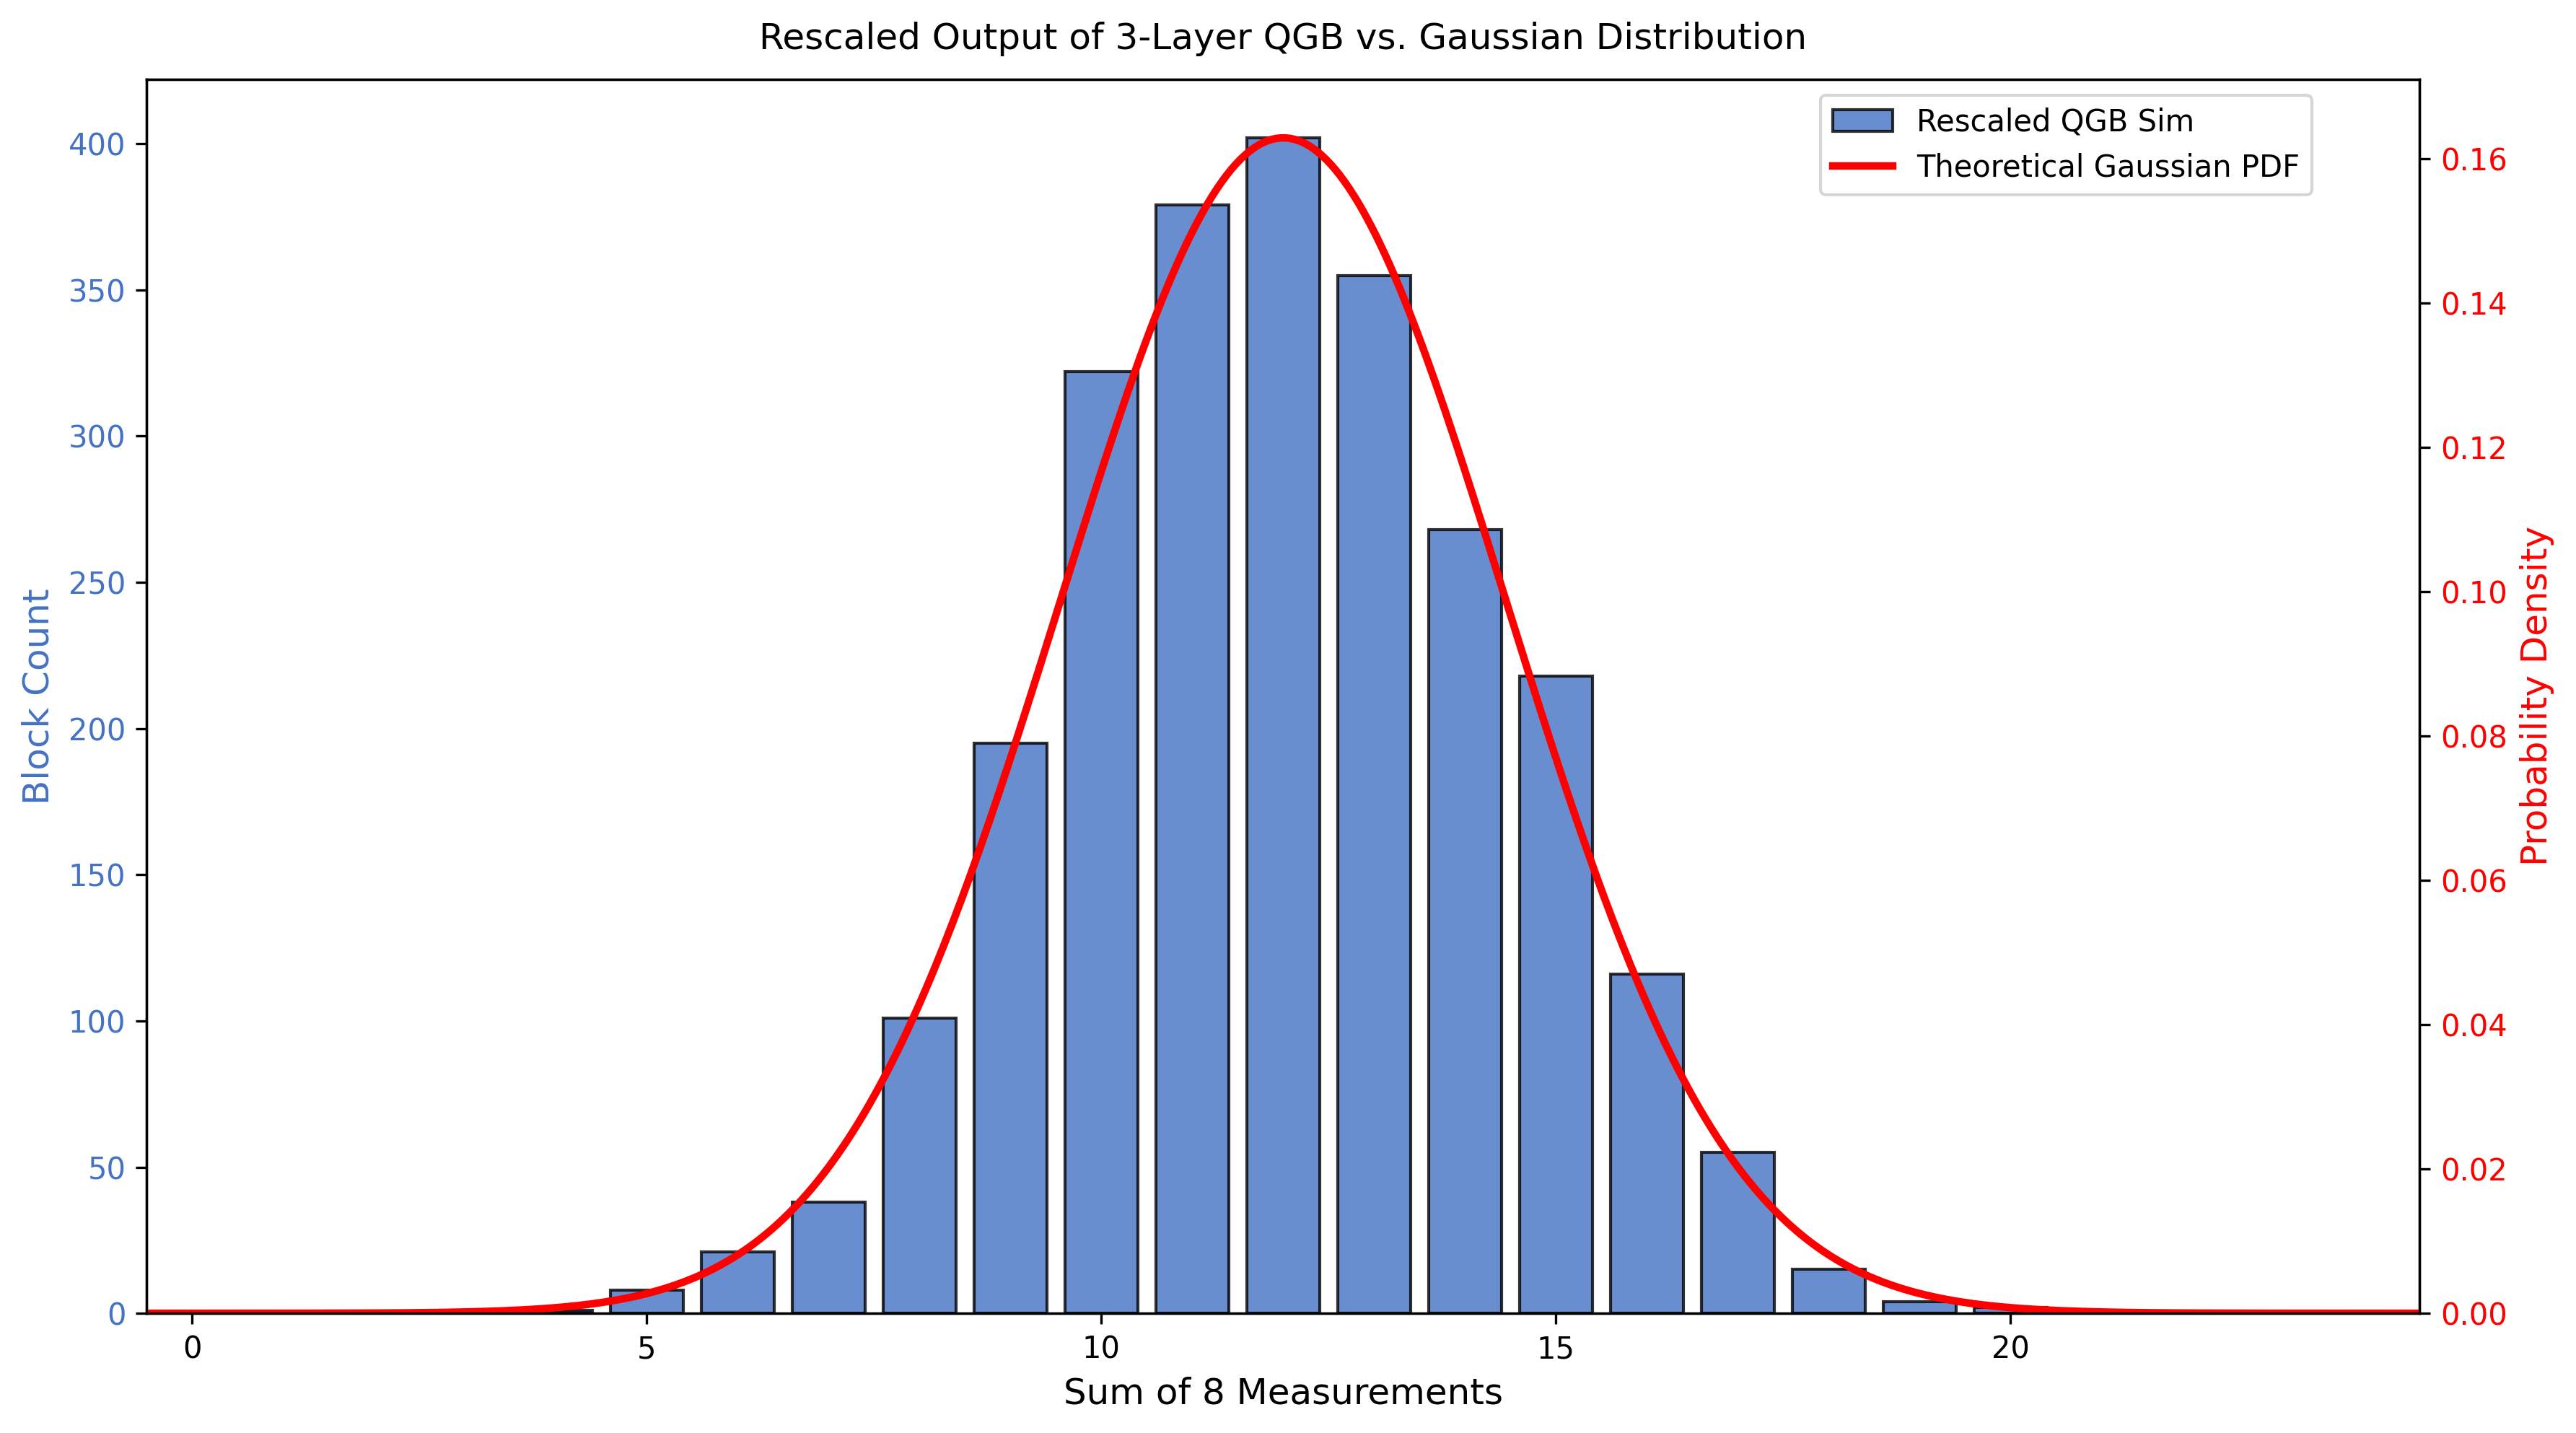


Rescaled Statistics:
Total blocks processed: 2500
Theoretical Gaussian parameters: mu = 12.00, var = 6.00

--------------------------------
3-Layer QGB Theoretical Analysis
--------------------------------

Classical Galton Board paths: 2^3 = 8

Binomial Distribution C(3,k):
Bin | Coeffs  | Percentage
----|---------|-----------
  0 |      1  |   12.500%
  1 |      3  |   37.500%
  2 |      3  |   37.500%
  3 |      1  |   12.500%

Expected outcome ratios: [1, 3, 3, 1]


--------------------------------------
ANALYZING 4-LAYER QUANTUM GALTON BOARD
--------------------------------------

Circuit Information:
Number of layers: 4
Number of bins: 5
Total qubits: 10
Total classical bits: 5
Circuit depth: 49
Gate count: 58

Circuit Diagram:

           Init ┌───┐   ┌───┐   ┌───┐      Layer 1 ┌───┐   ┌───┐   ┌───┐   »
q_0: ───────░───┤ H ├─■─┤ X ├─■─┤ X ├─|0>─────░────┤ H ├─■─┤ X ├─■─┤ X ├─■─»
            ░   └───┘ │ └─┬─┘ │ └─┬─┘         ░    └───┘ │ └─┬─┘ │ └─┬─┘ │ »
q_1: ───────░─────────┼

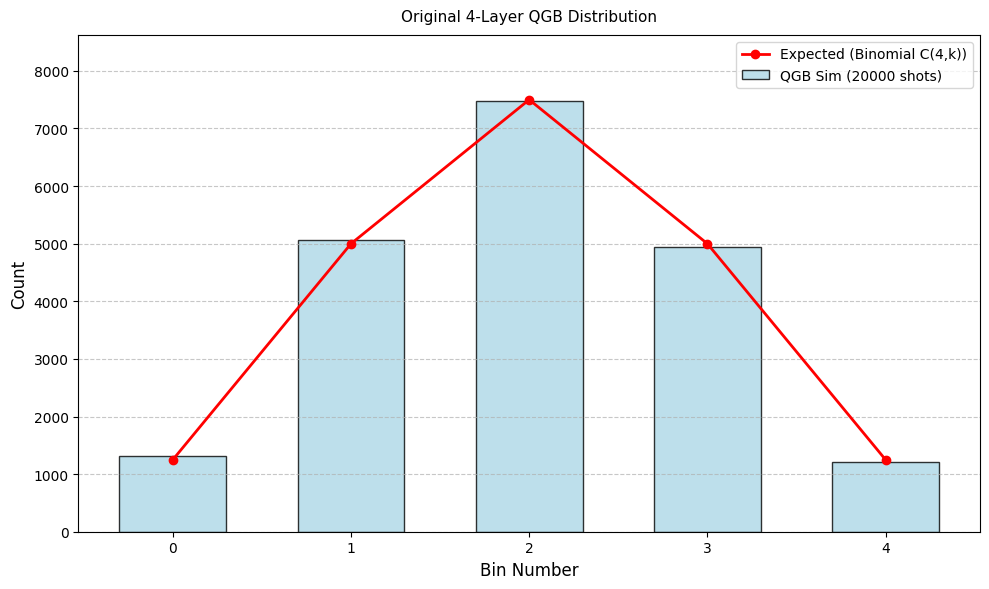


----------------------------
APPLYING RESCALING PROCEDURE
----------------------------



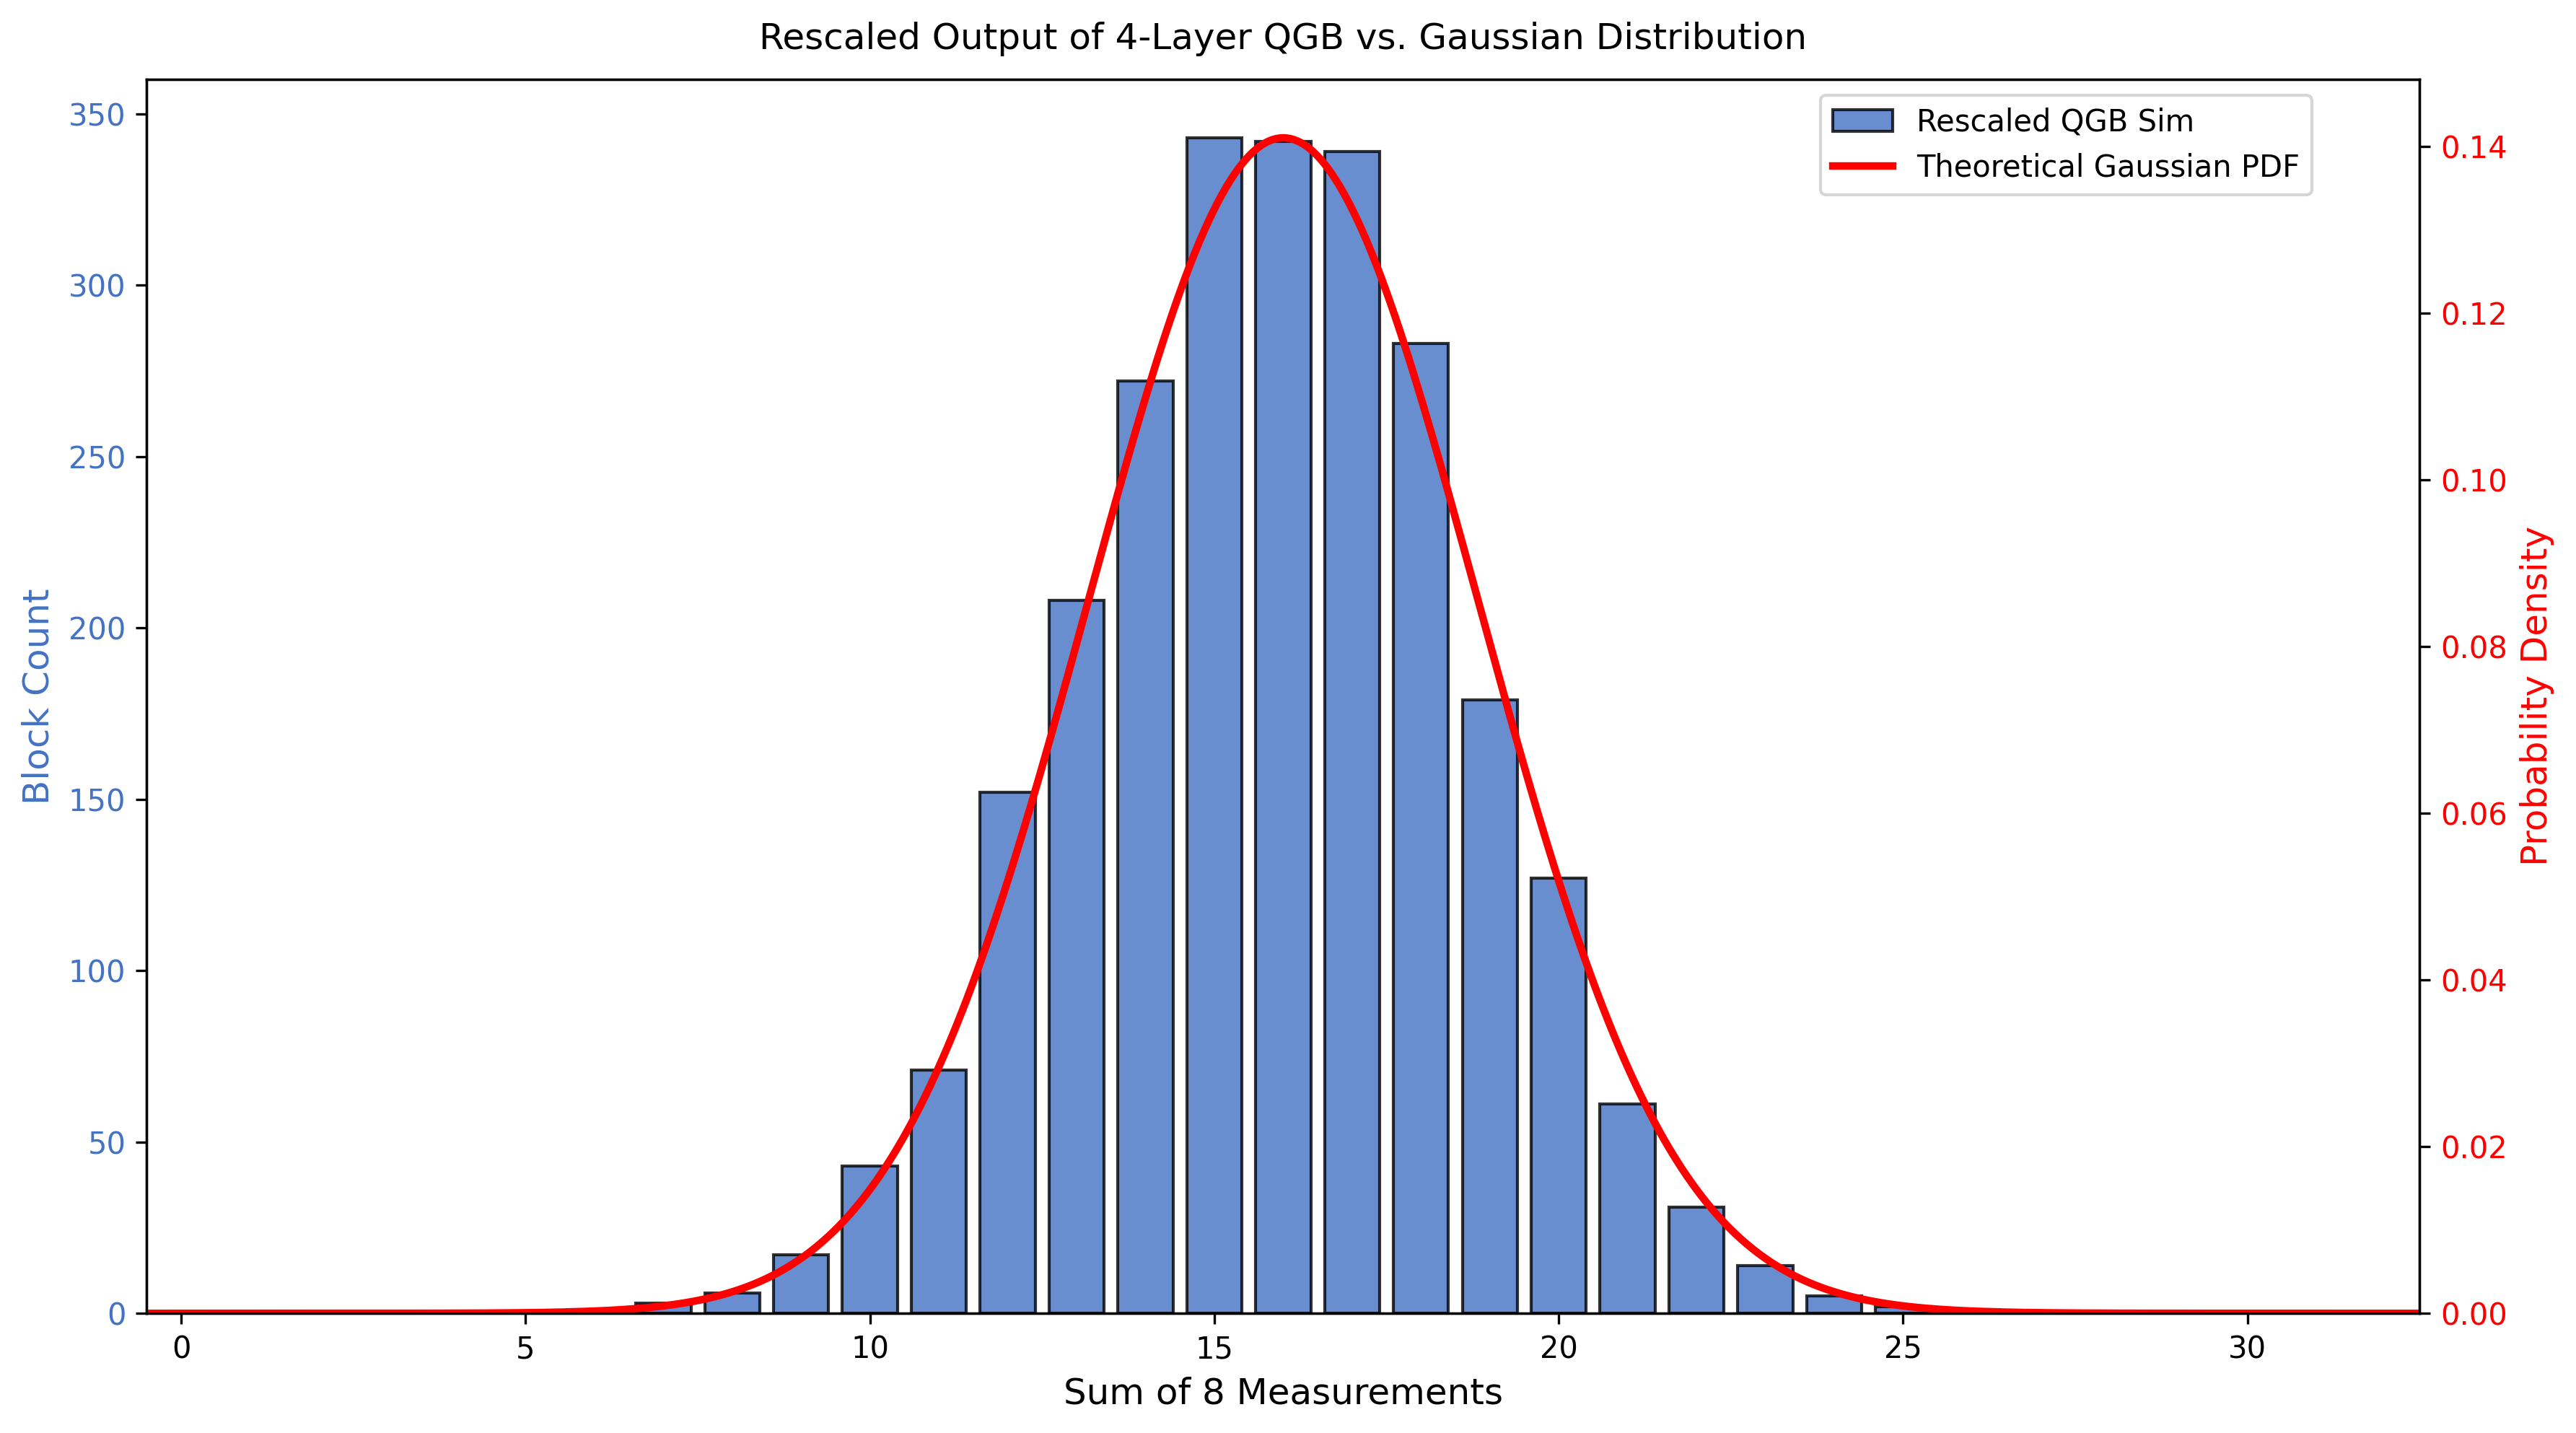


Rescaled Statistics:
Total blocks processed: 2500
Theoretical Gaussian parameters: mu = 16.00, var = 8.00

--------------------------------
4-Layer QGB Theoretical Analysis
--------------------------------

Classical Galton Board paths: 2^4 = 16

Binomial Distribution C(4,k):
Bin | Coeffs  | Percentage
----|---------|-----------
  0 |      1  |    6.250%
  1 |      4  |   25.000%
  2 |      6  |   37.500%
  3 |      4  |   25.000%
  4 |      1  |    6.250%

Expected outcome ratios: [1, 4, 6, 4, 1]


--------------------------------------
ANALYZING 5-LAYER QUANTUM GALTON BOARD
--------------------------------------

Circuit Information:
Number of layers: 5
Number of bins: 6
Total qubits: 12
Total classical bits: 6
Circuit depth: 71
Gate count: 82

Circuit Diagram:

            Init ┌───┐   ┌───┐   ┌───┐      Layer 1 ┌───┐   ┌───┐   ┌───┐   »
 q_0: ───────░───┤ H ├─■─┤ X ├─■─┤ X ├─|0>─────░────┤ H ├─■─┤ X ├─■─┤ X ├─■─»
             ░   └───┘ │ └─┬─┘ │ └─┬─┘         ░    └───┘ │ └─┬─┘ │ 

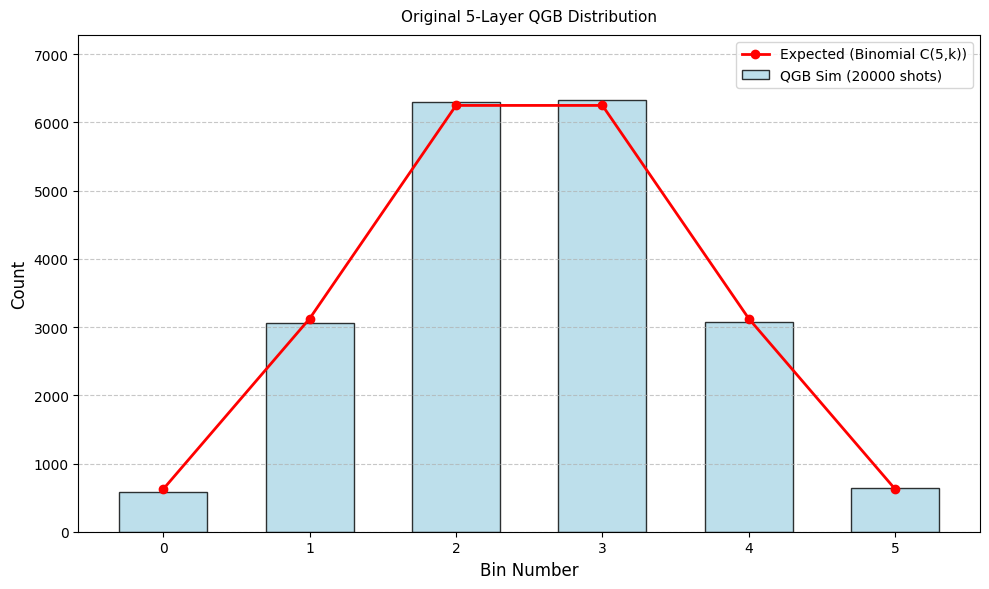


----------------------------
APPLYING RESCALING PROCEDURE
----------------------------



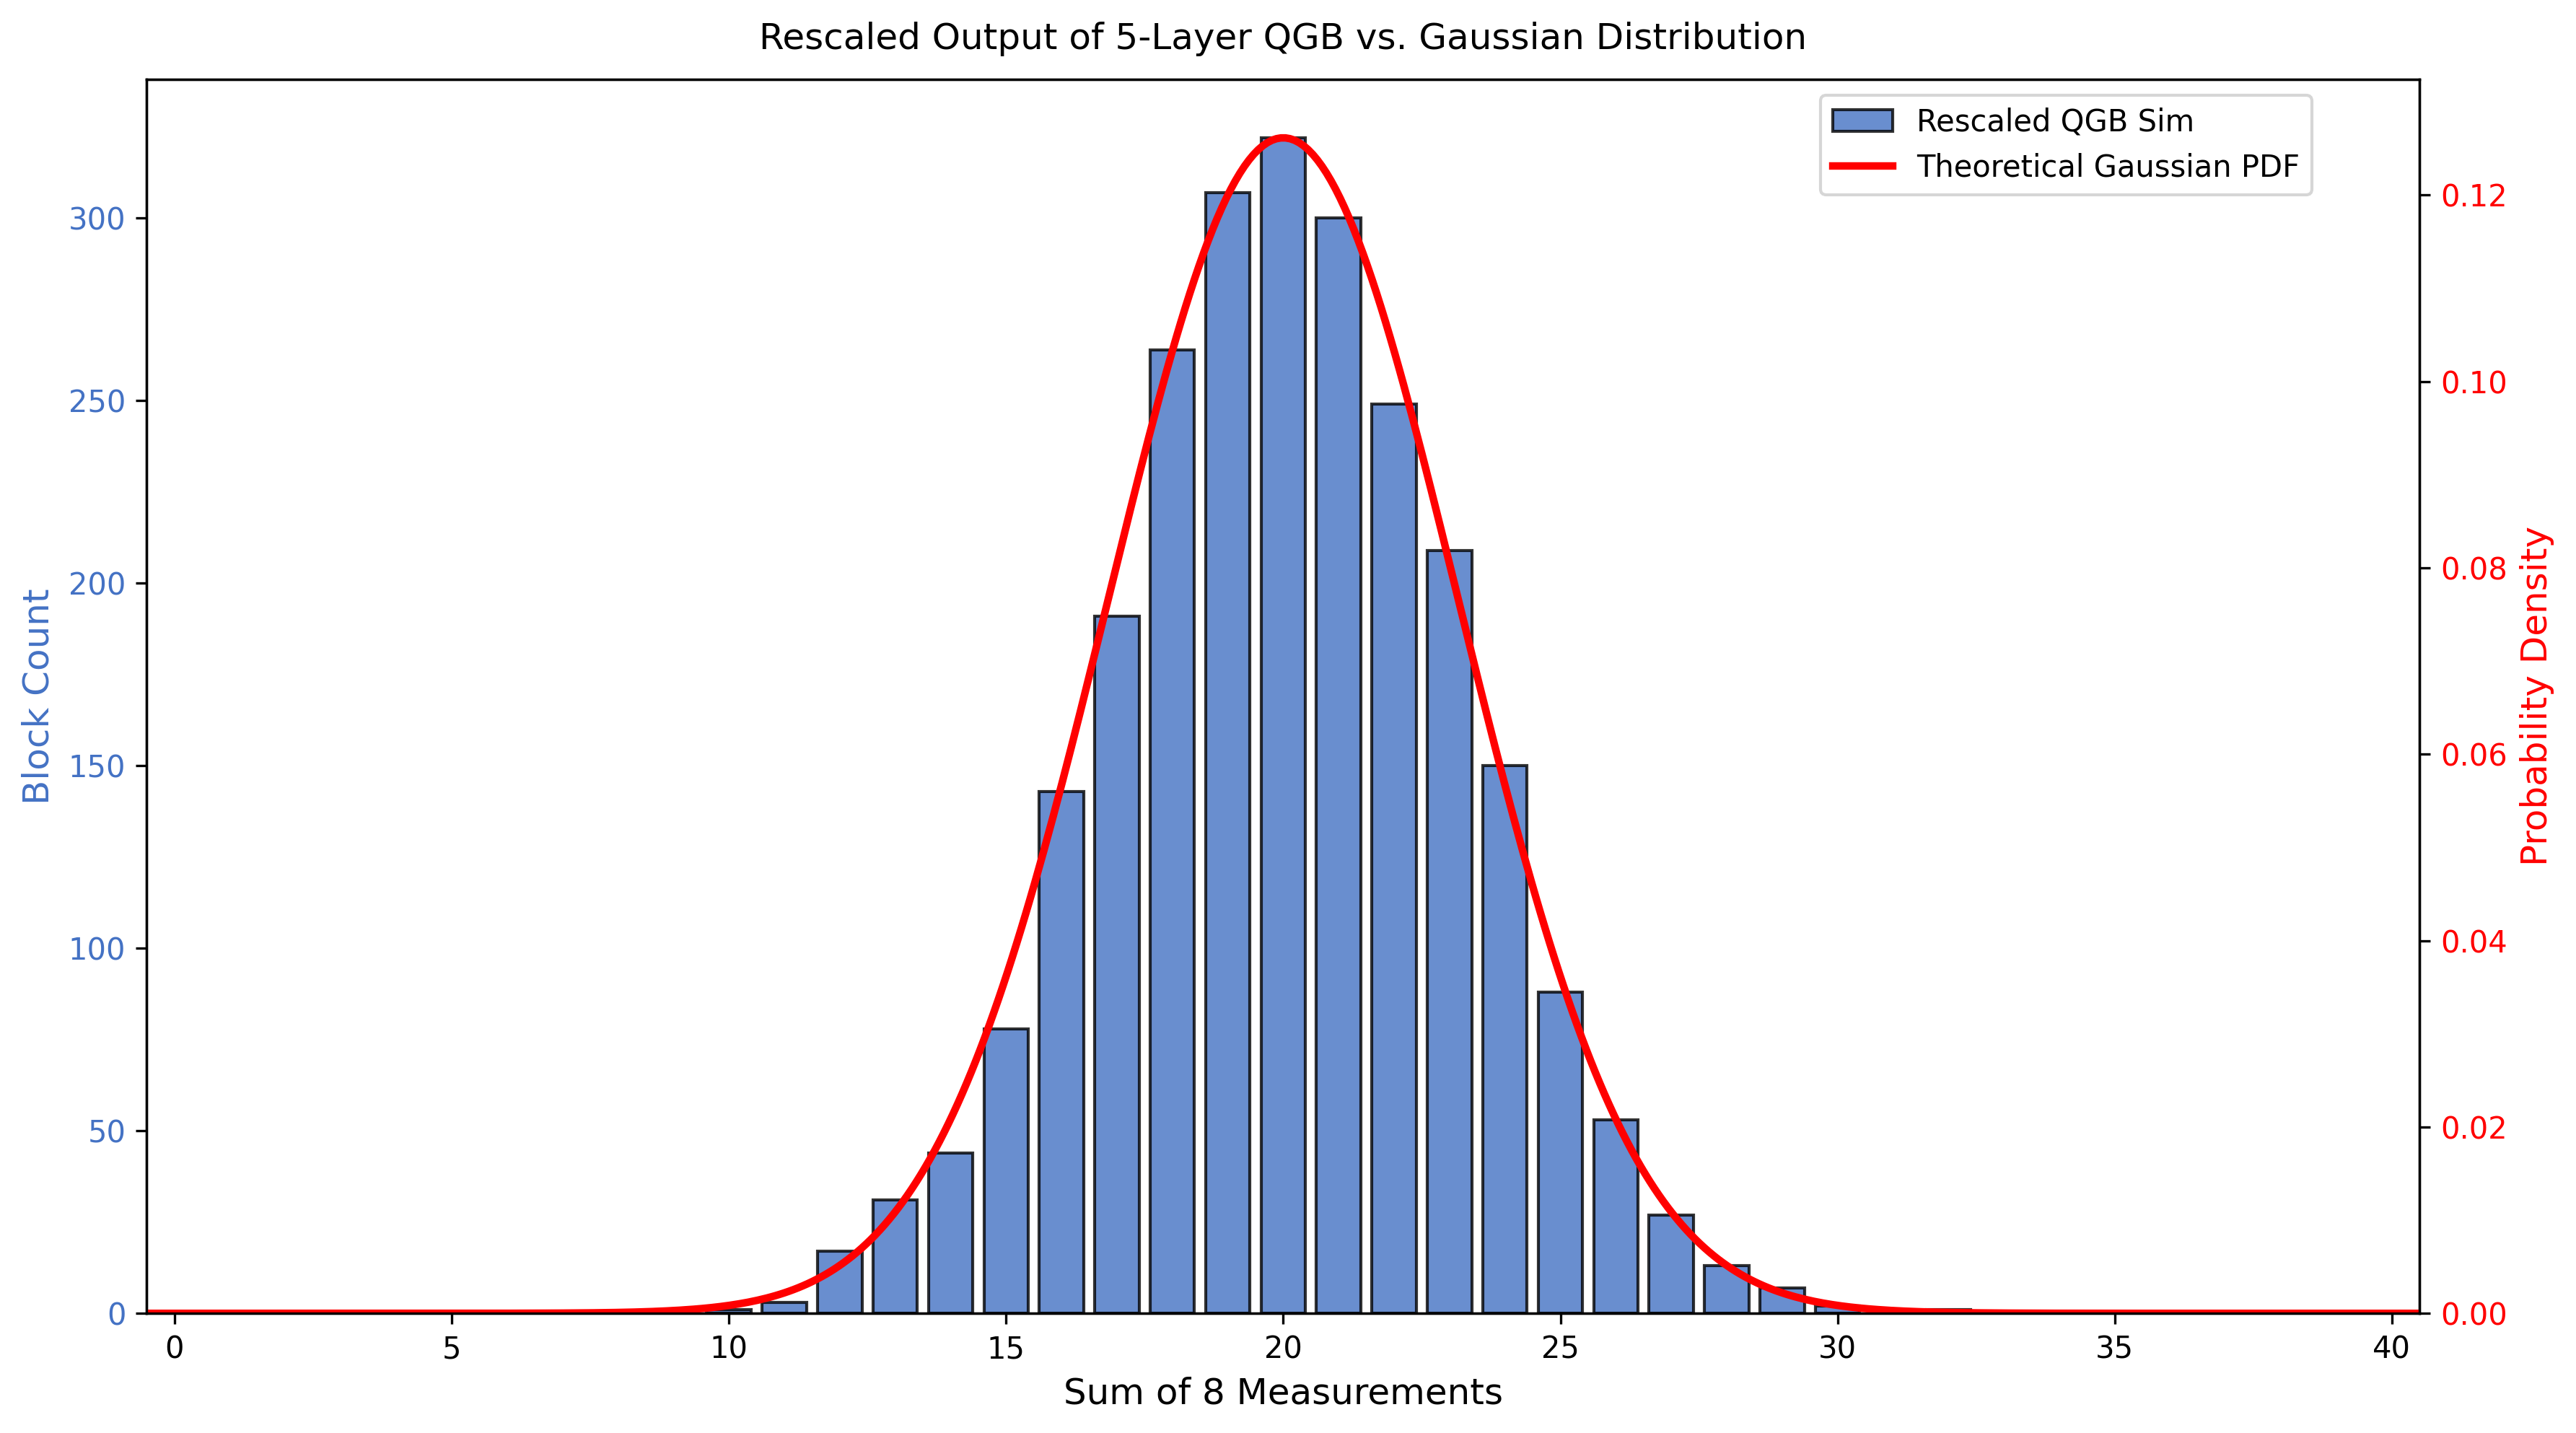


Rescaled Statistics:
Total blocks processed: 2500
Theoretical Gaussian parameters: mu = 20.00, var = 10.00

--------------------------------
5-Layer QGB Theoretical Analysis
--------------------------------

Classical Galton Board paths: 2^5 = 32

Binomial Distribution C(5,k):
Bin | Coeffs  | Percentage
----|---------|-----------
  0 |      1  |    3.125%
  1 |      5  |   15.625%
  2 |     10  |   31.250%
  3 |     10  |   31.250%
  4 |      5  |   15.625%
  5 |      1  |    3.125%

Expected outcome ratios: [1, 5, 10, 10, 5, 1]




In [7]:
import math
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import CSwapGate


def create_qgb_circuit(L):
    """
    Creates a generalized QGB circuit for L layers.

    Args:
        L (int): The number of layers in the Galton board. Must be >= 1.

    Returns:
        QuantumCircuit: The Qiskit QuantumCircuit object for the L-layer QGB.
    """
    if not isinstance(L, int) or L < 1:
        raise ValueError("Number of layers L must be an integer >= 1.")
            
    # For L >= 1, we use the structured multi-qubit approach
    num_bins = L + 1
    # The number of qubits is 2L (for bins and aux) + 1 (control)
    # The total number of required qubits is 2 * num_bins = 2 * (L+1)
    # We use 2*num_bins qubits for a consistent indexing scheme
    num_qubits = 2 * num_bins
    num_clbits = num_bins
    qc = QuantumCircuit(num_qubits, num_clbits)
    
    # --- INITIALIZATION --- #
    # The walker starts at the central qubit, which is at index L+1.
    initial_walker_position = L + 1
    qc.x(initial_walker_position)
    qc.barrier(label="Init")
    
    # --- BUILD LAYERS --- #
    # Each layer 'l' expands the quantum walk outwards
    for l in range(1, L + 1):
        qc.h(0)  # Put the control qubit in superposition for this layer's walk
        
        # Define the range of qubits involved in this layer's walk
        # The active region expands by one qubit on each side per layer
        start_q = (L + 1) - l
        end_q = (L + 1) + (l - 1)
        
        # Apply the controlled-SWAP operations for the current layer
        for q in range(start_q, end_q + 1):
            qc.append(CSwapGate(), [0, q, q + 1])
            # Skip the extra CX only when L == 1 and this is the final swap
            if not (L == 1 and q == end_q):
                qc.cx(q + 1, 0)
        
        # Reset the control qubit after each layer, except the last one
        if l < L:
            qc.reset(0)
            
        qc.barrier(label=f"Layer {l}")
    
    # --- MEASUREMENTS --- #
    # The bin qubits are at odd-numbered indices from 1 to 2L+1
    bin_qubits = [2 * i + 1 for i in range(num_bins)]
    cl_bits = list(range(num_clbits))
    qc.measure(bin_qubits, cl_bits)
    
    return qc

def convert_bitstring_to_integer(bitstring):
    """
    Converts a measurement bitstring to an integer representing the bin number.
    The QGB is designed so that only one particle should land in one bin.
    This function finds the position of the '1' in the bitstring, which
    corresponds to the bin number.
    
    Args:
        bitstring (str): The binary string from a Qiskit measurement

    Returns:
        int: The calculated bin number (0 to L)
    """
    # Multi-qubit 1-hot decoding is used for all L >= 1
    # Bit order: treat the rightmost bit as bin 0, so reverse before indexing
    try:
        # Reverse the bitstring to align with bin numbering (0th bin is rightmost)
        bits = list(reversed(bitstring))
    
        # Find all positions where a '1' (a particle) is detected
        ones_positions = [i for i, bit in enumerate(bits) if bit == '1']
    
        if len(ones_positions) == 1:
            return ones_positions[0]  # Ideal case: exactly one particle
        elif len(ones_positions) == 0:
            return 0  # No particle detected; default to bin 0
        else:
            # Multiple particles detected; Return the first one found
            return ones_positions[0]
    
    except (ValueError, IndexError):
        # Fallback for any unexpected format
        return 0

def calculate_binomial_coefficients(n):
    """
    Calculates the binomial coefficients C(n,k) for k=0 to n.
    These represent the expected distribution for a classical Galton board.
    
    Args:
        n (int): The number of layers (and trials)
        
    Returns:
        list: A list of binomial coefficients [C(n,0), C(n,1), ..., C(n,n)]
    """
    return [math.comb(n, k) for k in range(n + 1)]

def analyze_original_distribution(raw_counts, shots, L):
    """
    Analyzes and prints the statistics of the original (pre-rescaling) QGB distribution.
    
    Args:
        raw_counts (dict): The raw measurement counts from the simulation
        shots (int): The total number of shots for the simulation
        L (int): The number of layers.
    """
    num_bins = L + 1
    print(f"\nOriginal {L}-Layer QGB Distribution Analysis:")
    print("-" * (42 + len(str(L))))
    
    # Convert raw bitstrings to integer bin counts
    integer_counts = {i: 0 for i in range(num_bins)}
    for bitstring, count in raw_counts.items():
        integer_val = convert_bitstring_to_integer(bitstring)
        if 0 <= integer_val < num_bins:
            integer_counts[integer_val] += count
            
    print("\nDistribution by bin number:")
    for i in range(num_bins):
        count = integer_counts.get(i, 0)
        percentage = count / shots * 100 if shots > 0 else 0
        print(f"Bin {i}: {count:>6} counts ({percentage:6.2f}%)")
    print("\n")

def plot_original_histogram(raw_counts, shots, L):
    """
    Plots a histogram of the original QGB distribution against the theoretical
    binomial distribution.
    
    Args:
        raw_counts (dict): The raw measurement counts from the simulation
        shots (int): The total number of shots for the simulation
        L (int): The number of layers
    """
    num_bins = L + 1
    
    # Convert bitstrings to bin counts for plotting
    bin_counts = [0] * num_bins
    for bitstring, count in raw_counts.items():
        bin_num = convert_bitstring_to_integer(bitstring)
        if 0 <= bin_num < num_bins:
            bin_counts[bin_num] += count
    
    fig, ax = plt.subplots(figsize=(10, 6))
    bin_positions = list(range(num_bins))
    ax.bar(bin_positions, bin_counts, alpha=0.8, color='lightblue', edgecolor='black', width=0.6, label=f'QGB Sim ({shots} shots)')
    
    # Calculate and plot the expected classical distribution
    coeffs = calculate_binomial_coefficients(L)
    total_paths = 2**L
    expected_counts = [(c / total_paths) * shots for c in coeffs]
    ax.plot(bin_positions, expected_counts, 'ro-', label=f'Expected (Binomial C({L},k))', linewidth=2)
    
    ax.set_xlabel('Bin Number', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'Original {L}-Layer QGB Distribution', fontsize=11, pad=10)
    ax.set_xticks(bin_positions)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(top=max(max(bin_counts), max(expected_counts)) * 1.15)
    
    plt.tight_layout()
    plt.show()

def rescale_qgb_output(raw_counts, L, block_size=8):
    """
    Implements the rescaling procedure.
    It converts outcomes to integers, shuffles, groups into blocks, and sums them.
    
    Args:
        raw_counts (dict): Raw measurement counts
        L (int): The number of layers
        block_size (int): The size of blocks to sum
        
    Returns:
        tuple: A tuple containing (rescaled_counts, individual_values)
    """
    individual_values = []
    for bitstring, count in raw_counts.items():
        integer_value = convert_bitstring_to_integer(bitstring)
        individual_values.extend([integer_value] * count)

    # Shuffle the individual values to simulate random sampling
    np.random.shuffle(individual_values)
    
    rescaled_values = []
    for i in range(0, len(individual_values), block_size):
        block = individual_values[i:i+block_size]
        if len(block) == block_size:
            rescaled_values.append(sum(block))
            
    rescaled_counts = {}
    for value in rescaled_values:
        rescaled_counts[value] = rescaled_counts.get(value, 0) + 1
        
    return rescaled_counts, individual_values

def plot_rescaled_histogram_with_gaussian(rescaled_counts, total_blocks, L):
    """
    Plots the rescaled QGB output as a histogram and overlays the expected
    Gaussian distribution.
    
    Args:
        rescaled_counts (dict): The histogram of summed block values
        total_blocks (int): The total number of blocks processed
        L (int): The number of layers
    """
    num_bins = L + 1
    max_sum = 8 * (num_bins - 1)
    
    fig, ax1 = plt.subplots(figsize=(12, 7), dpi=300)
    
    # Plot the rescaled QGB data
    bin_positions = list(range(max_sum + 1))
    bin_counts = [rescaled_counts.get(i, 0) for i in bin_positions]
    ax1.bar(bin_positions, bin_counts, alpha=0.8, color='#4472C4', width=0.8, edgecolor='black', label='Rescaled QGB Sim')
    ax1.set_xlabel('Sum of 8 Measurements', fontsize=12)
    ax1.set_ylabel('Block Count', fontsize=12, color='#4472C4')
    ax1.tick_params(axis='y', labelcolor='#4472C4')
    ax1.set_xlim(-0.5, max_sum + 0.5)
    
    # Plot the theoretical Gaussian distribution on a second y-axis
    ax2 = ax1.twinx()
    
    # Theoretical parameters for the sum of 8 measurements from a B(L, 0.5) distribution
    # Mean of one measurement = L * 0.5
    # Variance of one measurement = L * 0.5 * 0.5 = L/4
    # For a sum of 8 measurements:
    mu = 8 * (L / 2)
    var = 8 * (L / 4)
    std_dev = np.sqrt(var)
    
    x_cont = np.linspace(-0.5, max_sum + 0.5, 500)
    gaussian_y = norm.pdf(x_cont, mu, std_dev)
    ax2.plot(x_cont, gaussian_y, 'r-', linewidth=2.5, label='Theoretical Gaussian PDF')
    ax2.set_ylabel('Probability Density', fontsize=12, color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    ax2.set_ylim(bottom=0)
    
    # Final plot styling
    plt.title(f'Rescaled Output of {L}-Layer QGB vs. Gaussian Distribution', fontsize=12, pad=10)
    fig.legend(loc="upper right", bbox_to_anchor=(0.9, 0.9))
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    print(f"\nRescaled Statistics:")
    print(f"Total blocks processed: {total_blocks}")
    print(f"Theoretical Gaussian parameters: mu = {mu:.2f}, var = {var:.2f}")

def analyze_qgb(L, shots=20000, block_size=8):
    """
    Main analysis function to run the entire QGB simulation and analysis for L layers.
    
    Args:
        L (int): The number of layers
        shots (int): The number of simulation shots
        block_size (int): The block size for the rescaling procedure
    """
    print("-" * 38)
    print(f"ANALYZING {L}-LAYER QUANTUM GALTON BOARD")
    print("-" * 38)
    
    # 1. Create and display circuit info
    circuit = create_qgb_circuit(L)
    print("\nCircuit Information:")
    print(f"Number of layers: {L}")
    print(f"Number of bins: {L + 1}")
    print(f"Total qubits: {circuit.num_qubits}")
    print(f"Total classical bits: {circuit.num_clbits}")
    print(f"Circuit depth: {circuit.depth()}")
    print(f"Gate count: {len(circuit.data)}")

    # 2. Draw the circuit 
    print("\nCircuit Diagram:\n")
    print(circuit.draw())
    
    # 3. Simulate the circuit
    print("\nSimulating circuit...")
    simulator = AerSimulator()
    tqc = transpile(circuit, simulator)
    result = simulator.run(tqc, shots=shots).result()
    raw_counts = result.get_counts()
    print("Simulation complete.")
    
    # 4. Analyze and plot the original distribution
    analyze_original_distribution(raw_counts, shots, L)
    plot_original_histogram(raw_counts, shots, L)
    
    # 5. Apply rescaling and plot the result
    print(f"\n" + "-"*28)
    print("APPLYING RESCALING PROCEDURE")
    print("-" * 28 + f"\n")
    rescaled_counts, individual_values = rescale_qgb_output(raw_counts, L, block_size)
    total_blocks = len(individual_values) // block_size
    
    if not rescaled_counts:
        print("No rescaled data available to plot.")
    else:
        plot_rescaled_histogram_with_gaussian(rescaled_counts, total_blocks, L)
        
    # 6. Theoretical analysis
    print(f"\n" + "-"*32)
    print(f"{L}-Layer QGB Theoretical Analysis")
    print("-"*32)
    
    total_paths = 2**L
    print(f"\nClassical Galton Board paths: 2^{L} = {total_paths}")
    
    coeffs = calculate_binomial_coefficients(L)
    
    print(f"\nBinomial Distribution C({L},k):")
    print("Bin | Coeffs  | Percentage")
    print("----|---------|-----------")
    for k, coeff in enumerate(coeffs):
        percentage = (coeff / total_paths) * 100
        print(f"{k:>3} |{coeff:>7}  |{percentage:>9.3f}%")
    
    print(f"\nExpected outcome ratios: {coeffs}")


if __name__ == "__main__":
    # Run the generalized QGB for layers 1 through 5
    for L in [1,2,3,4,5]:
        try:
            analyze_qgb(L)
            print("\n" + "="*130 + "\n")
        except (ValueError, Exception) as e:
            print(f"Error analyzing {L}-layer QGB: {e}")
            print("\n" + "="*130 + "\n")

<span style="color:black; font-size:0.9rem;"><b>Task 3:</b></span>

Modify the function so that it obtains a different target distribution. Use a noiseless all-to-all sampler:
- Exponential distribution
- Hadamard quantum walk

--------------------------------------
ANALYZING 1-LAYER QUANTUM GALTON BOARD
--------------------------------------

Circuit: 1-Layer QGB, Qubits: 4, Depth: 6

Simulating...
Simulation complete.



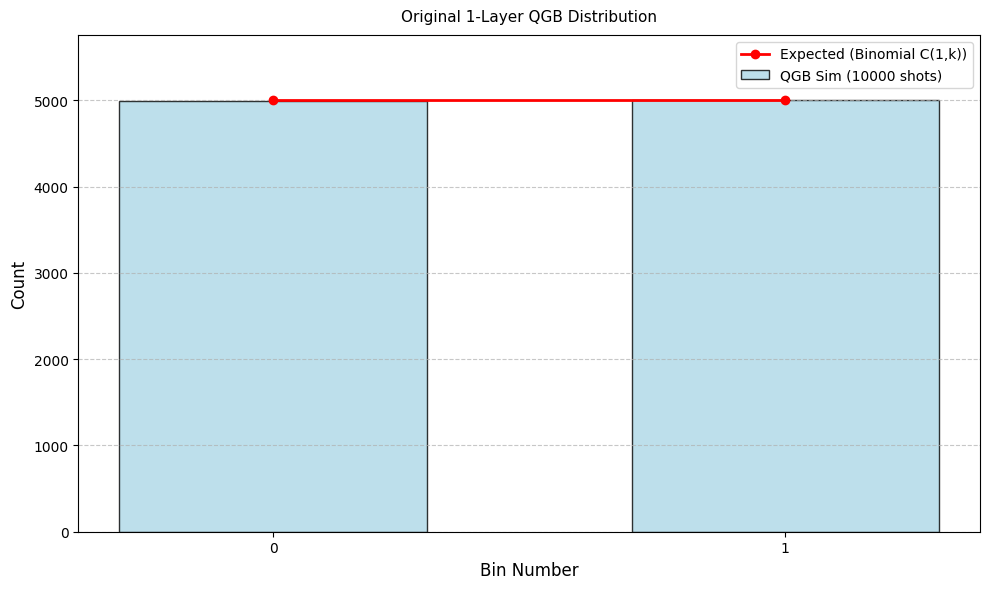

----------------------------------------------
ANALYZING EXPONENTIAL DISTRIBUTION PREPARATION
----------------------------------------------
✓ All-to-all connectivity simulator created for 2 qubits
✓ Total connections: 2 (full connectivity)
✓ Connectivity degree per qubit: 1
✓ Multi-qubit gates (CCX, CSwap) will be decomposed automatically
✓ Connectivity verification:
  - Expected CX connections: 2
  - Actual CX connections: 2
  - All-to-all connectivity: ✓

Circuit: Exponential State Prep, Qubits: 2, Depth: 2

Simulating with all-to-all connectivity...
Simulation complete.



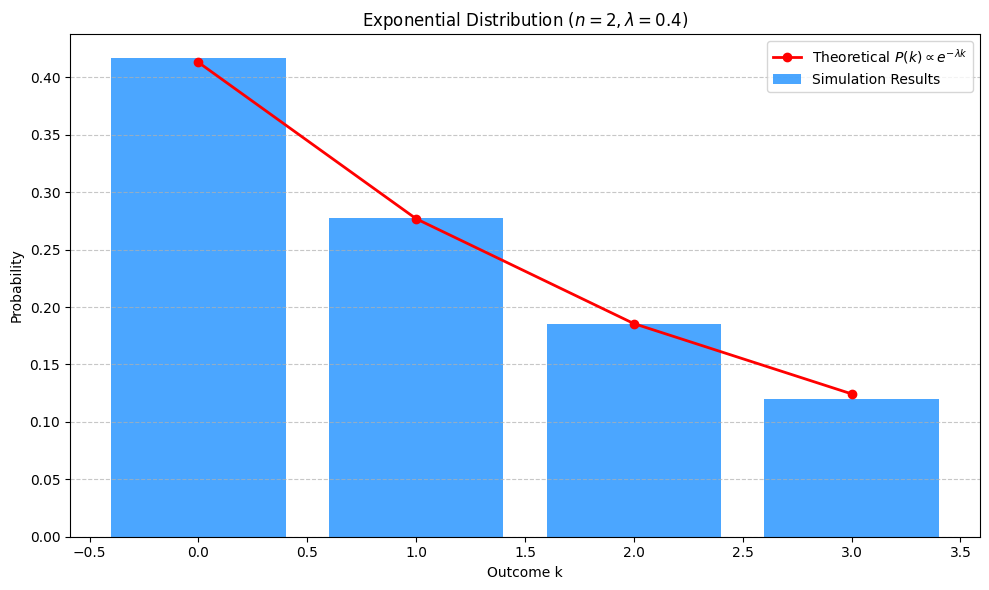

----------------------------------
ANALYZING 1D HADAMARD QUANTUM WALK
----------------------------------

Circuit: Hadamard Walk, Steps: 3, Qubits: 4, Depth: 47

Simulating with all-to-all connectivity...
✓ All-to-all connectivity simulator created for 4 qubits
✓ Total connections: 12 (full connectivity)
✓ Connectivity degree per qubit: 3
✓ Multi-qubit gates (CCX, CSwap) will be decomposed automatically
✓ Connectivity verification:
  - Expected CX connections: 12
  - Actual CX connections: 12
  - All-to-all connectivity: ✓
Simulation complete.



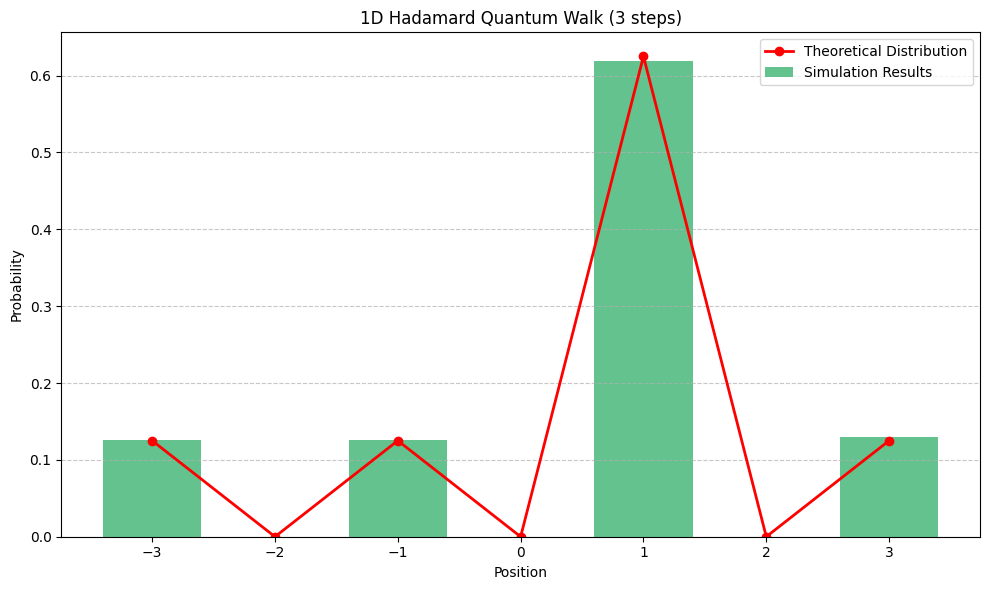


Completed analysis for L = 1


--------------------------------------
ANALYZING 2-LAYER QUANTUM GALTON BOARD
--------------------------------------

Circuit: 2-Layer QGB, Qubits: 6, Depth: 17

Simulating...
Simulation complete.



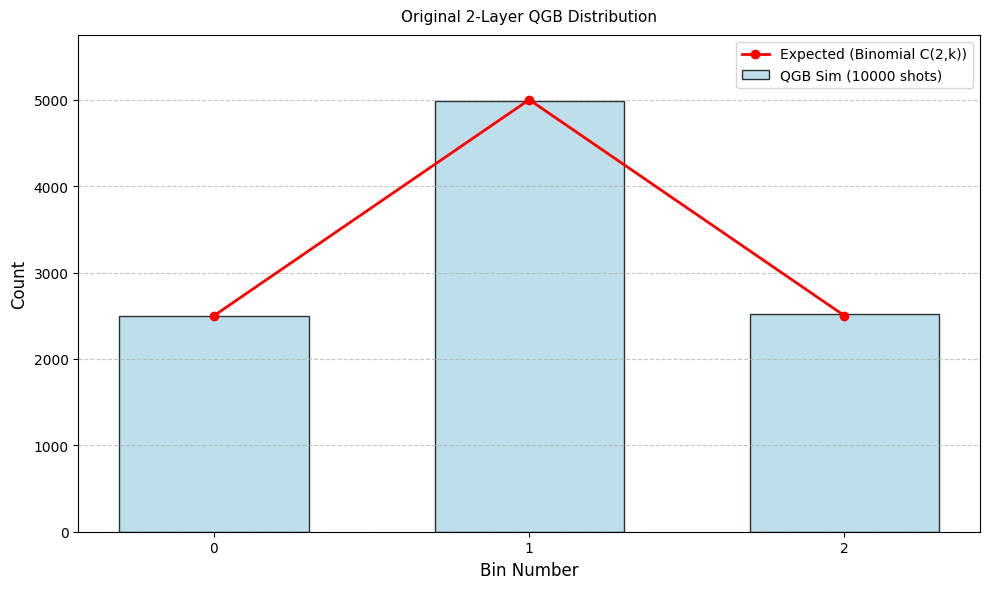

----------------------------------------------
ANALYZING EXPONENTIAL DISTRIBUTION PREPARATION
----------------------------------------------
✓ All-to-all connectivity simulator created for 3 qubits
✓ Total connections: 6 (full connectivity)
✓ Connectivity degree per qubit: 2
✓ Multi-qubit gates (CCX, CSwap) will be decomposed automatically
✓ Connectivity verification:
  - Expected CX connections: 6
  - Actual CX connections: 6
  - All-to-all connectivity: ✓

Circuit: Exponential State Prep, Qubits: 3, Depth: 2

Simulating with all-to-all connectivity...
Simulation complete.



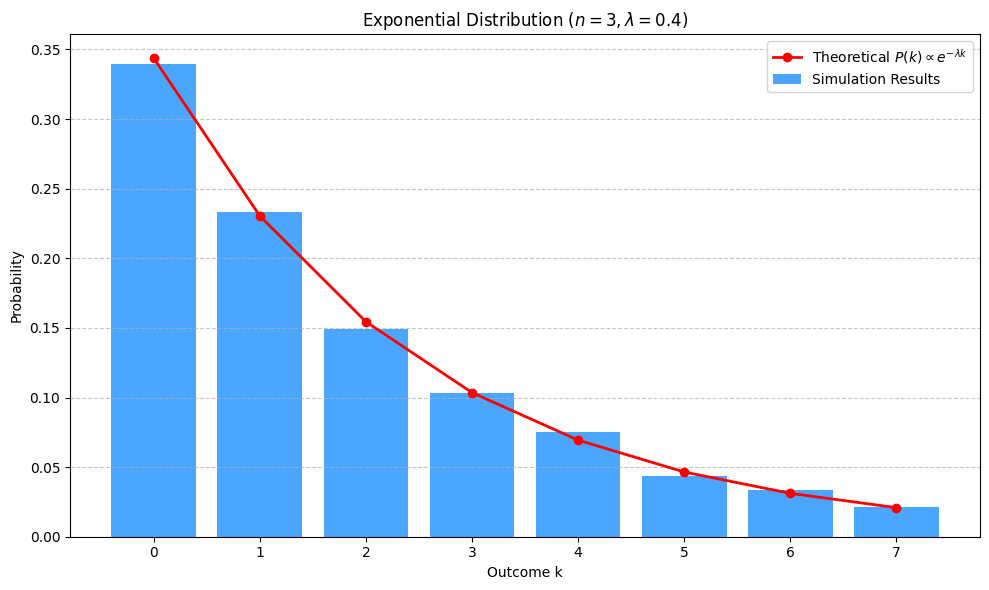

----------------------------------
ANALYZING 1D HADAMARD QUANTUM WALK
----------------------------------

Circuit: Hadamard Walk, Steps: 4, Qubits: 5, Depth: 78

Simulating with all-to-all connectivity...
✓ All-to-all connectivity simulator created for 5 qubits
✓ Total connections: 20 (full connectivity)
✓ Connectivity degree per qubit: 4
✓ Multi-qubit gates (CCX, CSwap) will be decomposed automatically
✓ Connectivity verification:
  - Expected CX connections: 20
  - Actual CX connections: 20
  - All-to-all connectivity: ✓
Simulation complete.



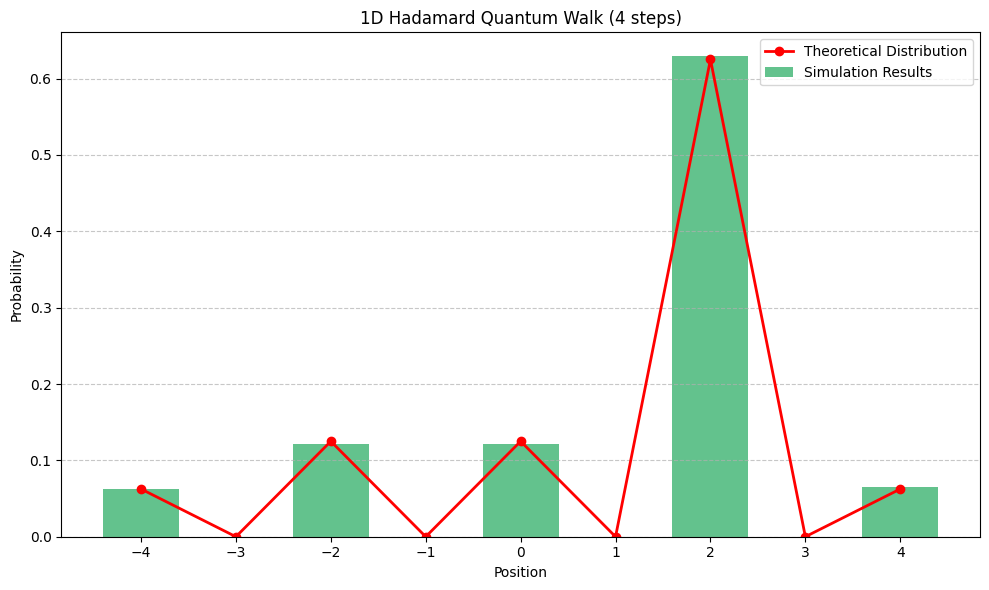


Completed analysis for L = 2


--------------------------------------
ANALYZING 3-LAYER QUANTUM GALTON BOARD
--------------------------------------

Circuit: 3-Layer QGB, Qubits: 8, Depth: 31

Simulating...
Simulation complete.



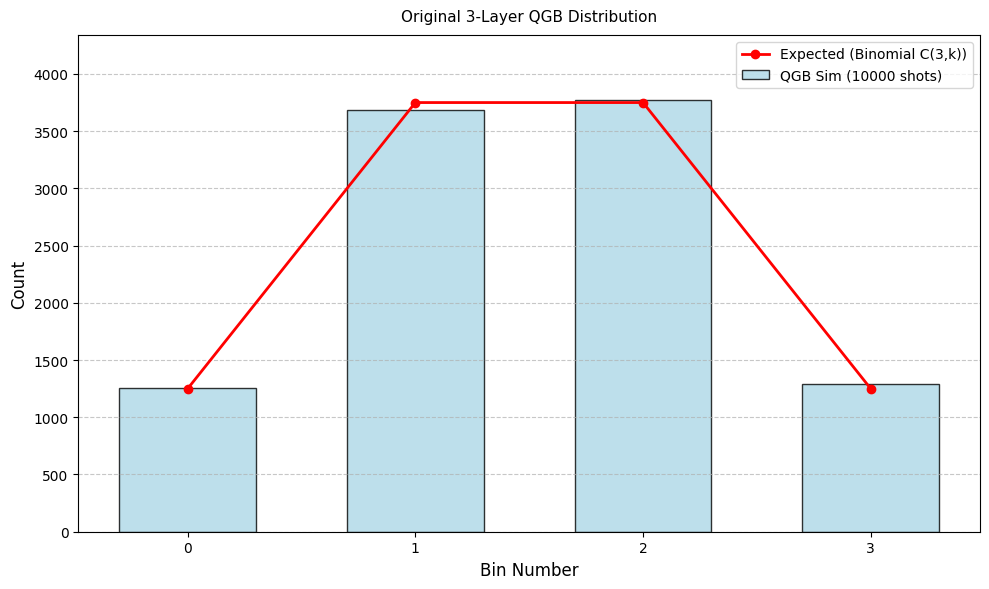

----------------------------------------------
ANALYZING EXPONENTIAL DISTRIBUTION PREPARATION
----------------------------------------------
✓ All-to-all connectivity simulator created for 4 qubits
✓ Total connections: 12 (full connectivity)
✓ Connectivity degree per qubit: 3
✓ Multi-qubit gates (CCX, CSwap) will be decomposed automatically
✓ Connectivity verification:
  - Expected CX connections: 12
  - Actual CX connections: 12
  - All-to-all connectivity: ✓

Circuit: Exponential State Prep, Qubits: 4, Depth: 2

Simulating with all-to-all connectivity...
Simulation complete.



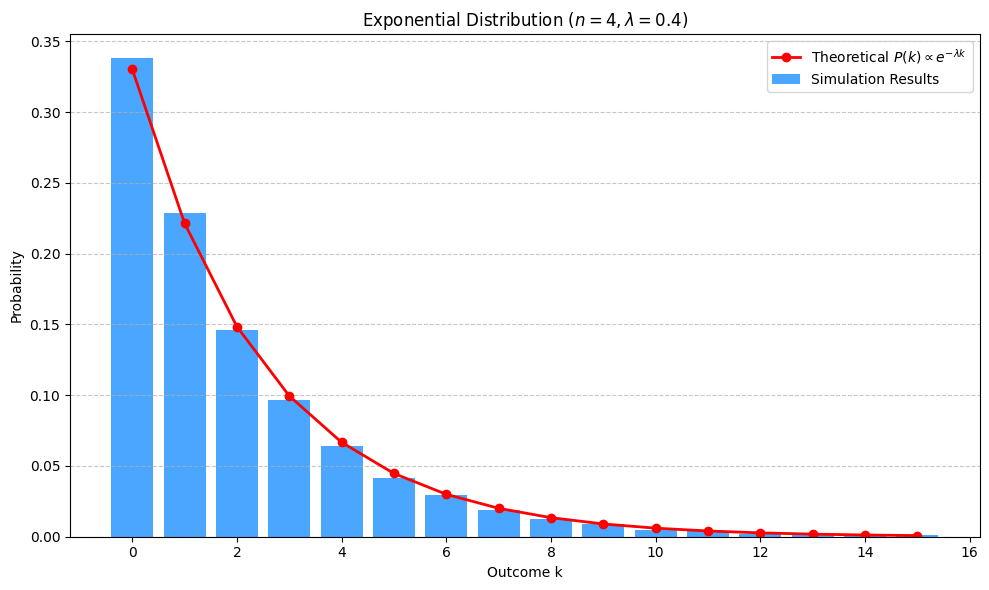

----------------------------------
ANALYZING 1D HADAMARD QUANTUM WALK
----------------------------------

Circuit: Hadamard Walk, Steps: 5, Qubits: 5, Depth: 97

Simulating with all-to-all connectivity...
✓ All-to-all connectivity simulator created for 5 qubits
✓ Total connections: 20 (full connectivity)
✓ Connectivity degree per qubit: 4
✓ Multi-qubit gates (CCX, CSwap) will be decomposed automatically
✓ Connectivity verification:
  - Expected CX connections: 20
  - Actual CX connections: 20
  - All-to-all connectivity: ✓
Simulation complete.



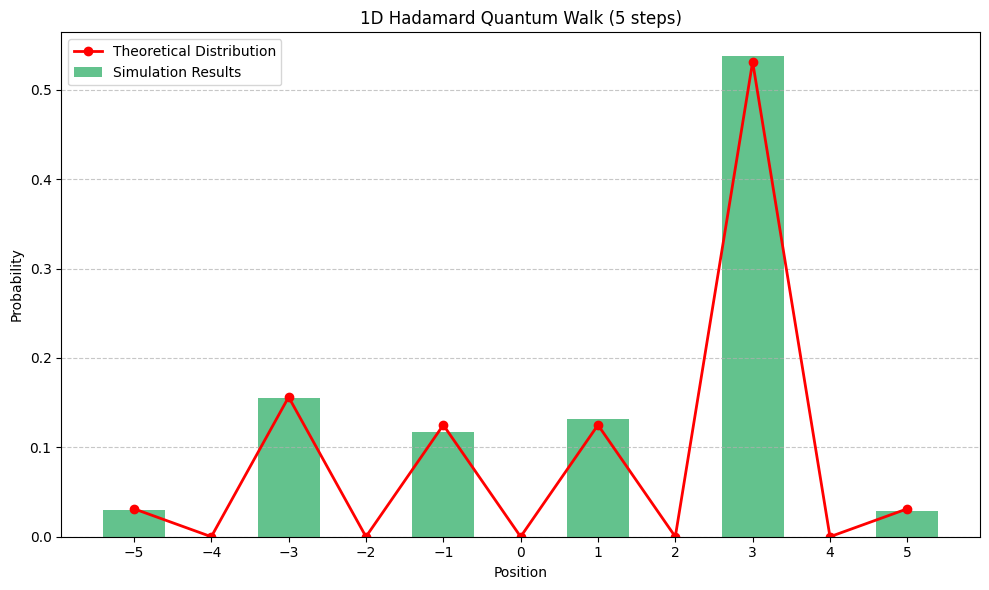


Completed analysis for L = 3


--------------------------------------
ANALYZING 4-LAYER QUANTUM GALTON BOARD
--------------------------------------

Circuit: 4-Layer QGB, Qubits: 10, Depth: 49

Simulating...
Simulation complete.



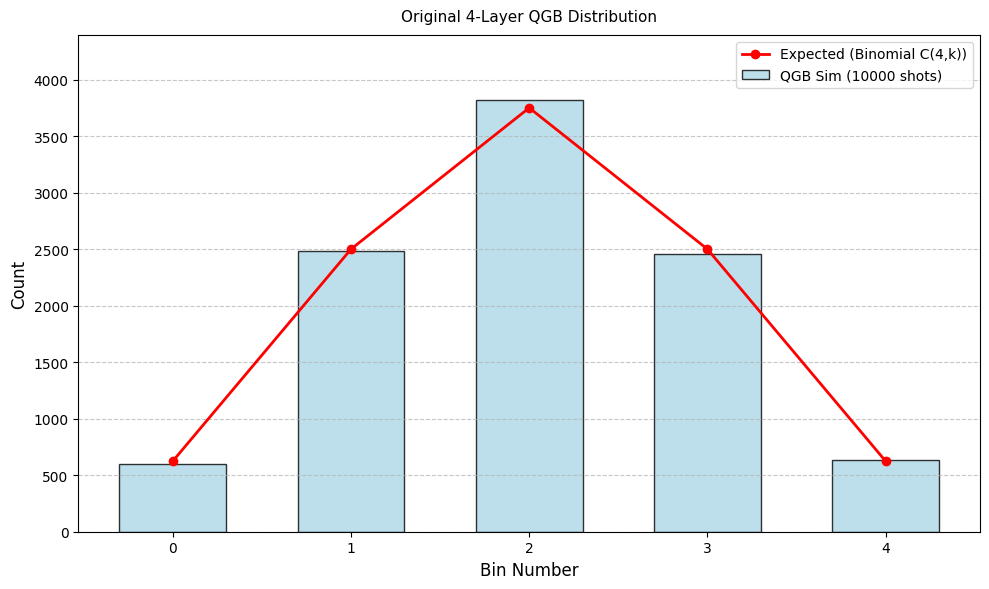

----------------------------------------------
ANALYZING EXPONENTIAL DISTRIBUTION PREPARATION
----------------------------------------------
✓ All-to-all connectivity simulator created for 5 qubits
✓ Total connections: 20 (full connectivity)
✓ Connectivity degree per qubit: 4
✓ Multi-qubit gates (CCX, CSwap) will be decomposed automatically
✓ Connectivity verification:
  - Expected CX connections: 20
  - Actual CX connections: 20
  - All-to-all connectivity: ✓

Circuit: Exponential State Prep, Qubits: 5, Depth: 2

Simulating with all-to-all connectivity...
Simulation complete.



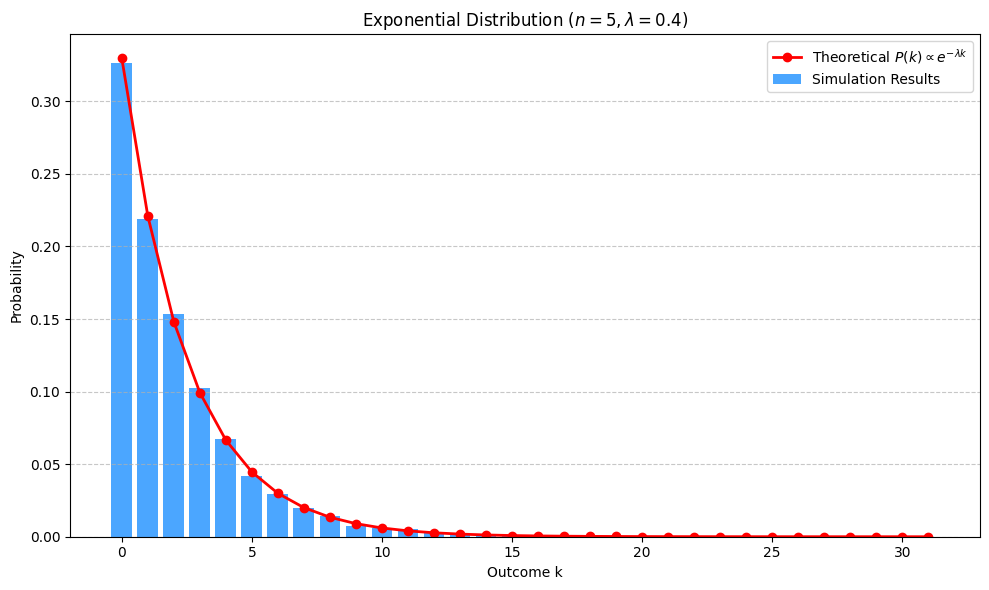

----------------------------------
ANALYZING 1D HADAMARD QUANTUM WALK
----------------------------------

Circuit: Hadamard Walk, Steps: 6, Qubits: 5, Depth: 116

Simulating with all-to-all connectivity...
✓ All-to-all connectivity simulator created for 5 qubits
✓ Total connections: 20 (full connectivity)
✓ Connectivity degree per qubit: 4
✓ Multi-qubit gates (CCX, CSwap) will be decomposed automatically
✓ Connectivity verification:
  - Expected CX connections: 20
  - Actual CX connections: 20
  - All-to-all connectivity: ✓
Simulation complete.



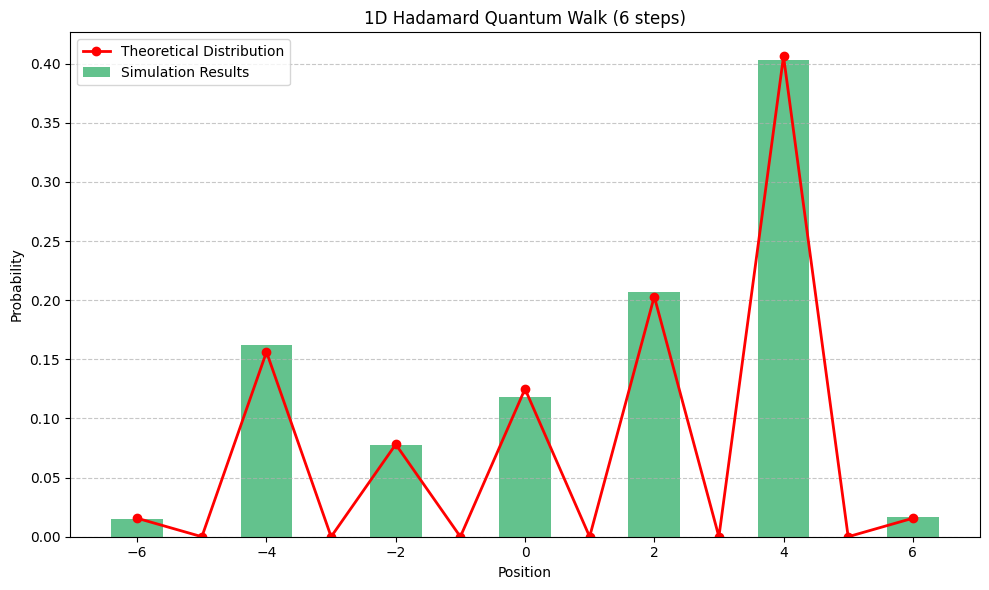


Completed analysis for L = 4


--------------------------------------
ANALYZING 5-LAYER QUANTUM GALTON BOARD
--------------------------------------

Circuit: 5-Layer QGB, Qubits: 12, Depth: 71

Simulating...
Simulation complete.



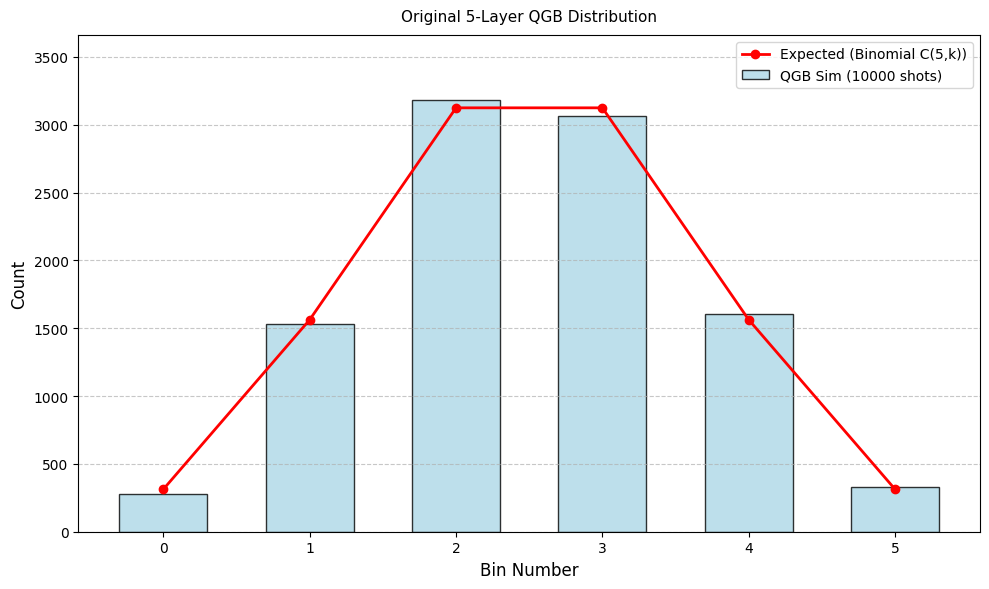

----------------------------------------------
ANALYZING EXPONENTIAL DISTRIBUTION PREPARATION
----------------------------------------------
✓ All-to-all connectivity simulator created for 6 qubits
✓ Total connections: 30 (full connectivity)
✓ Connectivity degree per qubit: 5
✓ Multi-qubit gates (CCX, CSwap) will be decomposed automatically
✓ Connectivity verification:
  - Expected CX connections: 30
  - Actual CX connections: 30
  - All-to-all connectivity: ✓

Circuit: Exponential State Prep, Qubits: 6, Depth: 2

Simulating with all-to-all connectivity...
Simulation complete.



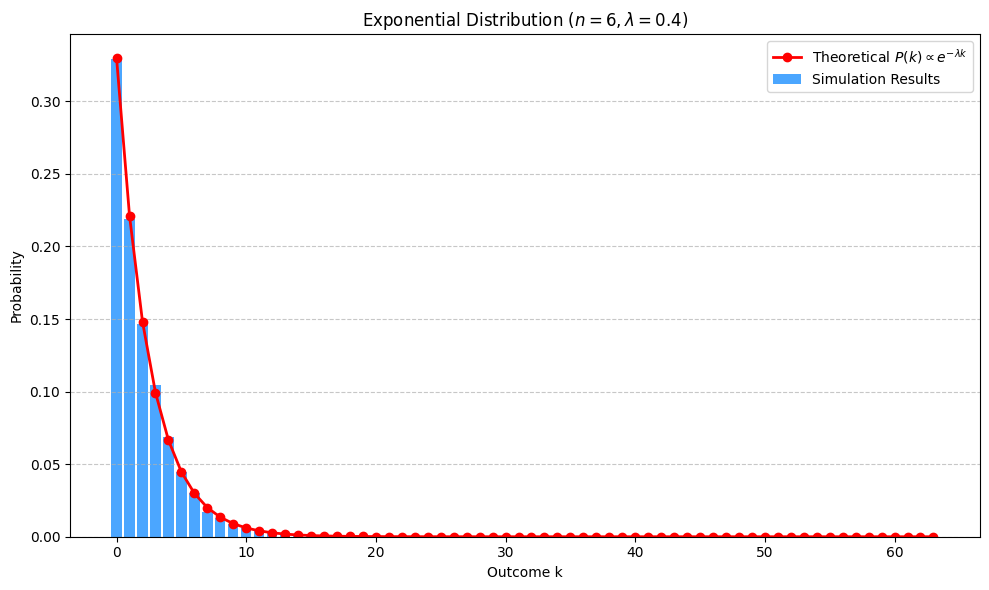

----------------------------------
ANALYZING 1D HADAMARD QUANTUM WALK
----------------------------------

Circuit: Hadamard Walk, Steps: 7, Qubits: 5, Depth: 135

Simulating with all-to-all connectivity...
✓ All-to-all connectivity simulator created for 5 qubits
✓ Total connections: 20 (full connectivity)
✓ Connectivity degree per qubit: 4
✓ Multi-qubit gates (CCX, CSwap) will be decomposed automatically
✓ Connectivity verification:
  - Expected CX connections: 20
  - Actual CX connections: 20
  - All-to-all connectivity: ✓
Simulation complete.



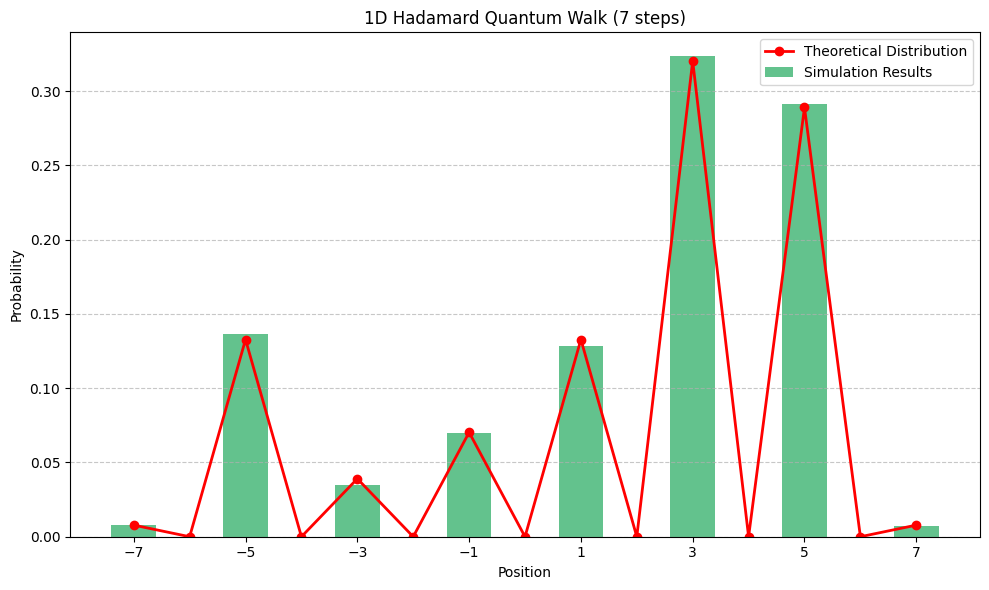


Completed analysis for L = 5




In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit
from qiskit import transpile
from qiskit.circuit.library import CSwapGate
from qiskit.transpiler import CouplingMap, Target
from qiskit.circuit.library import XGate, HGate, CXGate, CCXGate, CSwapGate as CSwapLib, Measure, UGate, Reset


# --- ALL-TO-ALL CONNECTIVITY SIMULATOR SETUP --- #

def create_all_to_all_simulator(num_qubits):
    """
    Creates an AerSimulator configured for all-to-all connectivity using Target.
    """
    # Create all-to-all coupling map: every qubit connected to every other qubit
    coupling_list = []
    for i in range(num_qubits):
        for j in range(i + 1, num_qubits):
            coupling_list.append([i, j])
            coupling_list.append([j, i])  # Bidirectional connectivity
    
    coupling_map = CouplingMap(coupling_list)
    
    # Create a Target with all-to-all connectivity and necessary gates
    target = Target(num_qubits=num_qubits)
    
    # Create gate instances (only single-qubit and two-qubit gates)
    x_gate = XGate()
    h_gate = HGate()
    u_gate = UGate(0, 0, 0)  # Generic U gate
    cx_gate = CXGate()
    measure = Measure()
    reset = Reset()
    
    # Build qubit mappings for each gate type
    # Single-qubit gates: available on all qubits
    single_qubit_props = {}
    for i in range(num_qubits):
        single_qubit_props[(i,)] = None
    
    # Two-qubit gates: available on all connected pairs
    two_qubit_props = {}
    for edge in coupling_map.get_edges():
        two_qubit_props[(edge[0], edge[1])] = None
    
    # Add instructions to target (ONLY single-qubit and two-qubit gates)
    target.add_instruction(x_gate, single_qubit_props)
    target.add_instruction(h_gate, single_qubit_props)
    target.add_instruction(u_gate, single_qubit_props)  # Universal single-qubit gate
    target.add_instruction(reset, single_qubit_props)   # Reset operation
    target.add_instruction(measure, single_qubit_props)
    target.add_instruction(cx_gate, two_qubit_props)
    
    # Create simulator
    simulator = AerSimulator(
        method='statevector',  # Use statevector for exact simulation
        device='CPU'
    )
    
    print(f"✓ All-to-all connectivity simulator created for {num_qubits} qubits")
    print(f"✓ Total connections: {len(coupling_list)} (full connectivity)")
    print(f"✓ Connectivity degree per qubit: {num_qubits - 1}")
    print(f"✓ Multi-qubit gates (CCX, CSwap) will be decomposed automatically")
    
    return simulator, target
    
def verify_all_to_all_connectivity(target, num_qubits):
    """
    Verifies that the target provides full all-to-all connectivity.
    """
    # Count available CX gate configurations
    cx_count = 0
    try:
        # Find CX gate in target
        for instruction in target.instructions:
            if instruction.name == 'cx':
                props = target.instruction_properties(instruction)
                cx_count = len(props) if props else 0
                break
    except Exception:
        # Fallback: manual counting
        cx_count = 0
        for i in range(num_qubits):
            for j in range(num_qubits):
                if i != j:
                    try:
                        if target.instruction_supported('cx', (i, j)):
                            cx_count += 1
                    except:
                        pass
    
    # For all-to-all, we should have N*(N-1) CX gates
    expected_connections = num_qubits * (num_qubits - 1)
    is_all_to_all = (cx_count == expected_connections)
    
    print(f"✓ Connectivity verification:")
    print(f"  - Expected CX connections: {expected_connections}")
    print(f"  - Actual CX connections: {cx_count}")
    print(f"  - All-to-all connectivity: {'✓' if is_all_to_all else '✗'}")
    
    return is_all_to_all

# --- SECTION 1: ORIGINAL QUANTUM GALTON BOARD (QGB) --- #

def create_qgb_circuit(L):
    if not isinstance(L, int) or L < 1:
        raise ValueError("Number of layers L must be an integer >= 1.")
        
    num_bins = L + 1
    num_qubits = 2 * num_bins
    num_clbits = num_bins
    qc = QuantumCircuit(num_qubits, num_clbits)
    
    initial_walker_position = L + 1
    qc.x(initial_walker_position)
    qc.barrier(label="Init")
    
    for l in range(1, L + 1):
        qc.h(0)
        start_q = (L + 1) - l
        end_q = (L + 1) + (l - 1)
        for q in range(start_q, end_q + 1):
            qc.append(CSwapGate(), [0, q, q + 1])
            if not (L == 1 and q == end_q):  # Skip the extra CX only when L == 1
                qc.cx(q + 1, 0)
        if l < L:
            qc.reset(0)
        qc.barrier(label=f"Layer {l}")
    bin_qubits = [2 * i + 1 for i in range(num_bins)]
    cl_bits = list(range(num_clbits))
    qc.measure(bin_qubits, cl_bits)
    
    return qc

def convert_qgb_bitstring_to_integer(bitstring):
    if len(bitstring) == 1:
        return int(bitstring)
    try:
        bits = list(reversed(bitstring))
        ones_positions = [i for i, bit in enumerate(bits) if bit == '1']
        return ones_positions[0] if ones_positions else 0
    except (ValueError, IndexError):
        return 0

def plot_original_histogram(raw_counts, shots, L):
    num_bins = L + 1
    bin_counts = [0] * num_bins
    for bitstring, count in raw_counts.items():
        bin_num = convert_qgb_bitstring_to_integer(bitstring)
        if 0 <= bin_num < num_bins:
            bin_counts[bin_num] += count
            
    fig, ax = plt.subplots(figsize=(10, 6))
    bin_positions = list(range(num_bins))
    ax.bar(bin_positions, bin_counts, alpha=0.8, color='lightblue', edgecolor='black', width=0.6, label=f'QGB Sim ({shots} shots)')
    coeffs = [math.comb(L, k) for k in range(L + 1)]
    total_paths = 2**L
    expected_counts = [(c / total_paths) * shots for c in coeffs]
    ax.plot(bin_positions, expected_counts, 'ro-', label=f'Expected (Binomial C({L},k))', linewidth=2)
    ax.set_xlabel('Bin Number', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'Original {L}-Layer QGB Distribution', fontsize=11, pad=10)
    ax.set_xticks(bin_positions)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    ax.set_ylim(top=max(max(bin_counts, default=0), max(expected_counts, default=0)) * 1.15)
    plt.tight_layout()
    plt.savefig(f'qgb{L}_original_histogram.png', dpi=300, bbox_inches='tight')
    plt.show()

def analyze_qgb(L, shots=8000):
    print("-" * 38)
    print(f"ANALYZING {L}-LAYER QUANTUM GALTON BOARD")
    print("-" * 38)
    circuit = create_qgb_circuit(L)
    print(f"\nCircuit: {L}-Layer QGB, Qubits: {circuit.num_qubits}, Depth: {circuit.depth()}\n")
    print("Simulating...")
    simulator = AerSimulator()
    tqc = transpile(circuit, simulator)
    result = simulator.run(tqc, shots=shots).result()
    raw_counts = result.get_counts()
    print("Simulation complete.\n")
    plot_original_histogram(raw_counts, shots, L)

# --- SECTION 2: EXPONENTIAL DISTRIBUTION --- #

def create_exponential_circuit(num_qubits, decay_rate=0.5):
    if num_qubits < 1:
        raise ValueError("Number of qubits must be >= 1.")
        
    num_states = 2**num_qubits
    amplitudes = [np.exp(-decay_rate * k / 2.0) for k in range(num_states)]
    norm = np.linalg.norm(amplitudes)
    normalized_amplitudes = amplitudes / norm
    qc = QuantumCircuit(num_qubits)
    qc.initialize(normalized_amplitudes, qc.qubits)
    qc.measure_all()
    
    return qc

def plot_exponential_distribution(raw_counts, shots, num_qubits, decay_rate, layer_name):
    num_states = 2**num_qubits
    sim_probs = np.zeros(num_states)
    for bitstring, count in raw_counts.items():
        k = int(bitstring, 2)
        if k < num_states:
            sim_probs[k] = count / shots
            
    amps = [np.exp(-decay_rate * k / 2.0) for k in range(num_states)]
    norm_sq = np.sum(np.abs(amps)**2)
    theo_probs = (np.abs(amps)**2) / norm_sq
    k_values = np.arange(num_states)
    plt.figure(figsize=(10, 6))
    plt.bar(k_values, sim_probs, width=0.8, label='Simulation Results', color='dodgerblue', alpha=0.8)
    plt.plot(k_values, theo_probs, 'ro-', label='Theoretical $P(k) \\propto e^{-\\lambda k}$', linewidth=2)
    plt.xlabel("Outcome k")
    plt.ylabel("Probability")
    plt.title(f"Exponential Distribution ($n={num_qubits}, \\lambda={decay_rate}$)")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig(f'qgb{layer_name}_exponential_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

def analyze_exponential(num_qubits, layer_name, shots=8000, decay_rate=0.5):
    print("-" * 46)
    print("ANALYZING EXPONENTIAL DISTRIBUTION PREPARATION")
    print("-" * 46)
    circuit = create_exponential_circuit(num_qubits, decay_rate)
    
    # Create all-to-all connectivity simulator
    simulator, target = create_all_to_all_simulator(circuit.num_qubits)
    verify_all_to_all_connectivity(target, circuit.num_qubits)
    
    print(f"\nCircuit: Exponential State Prep, Qubits: {circuit.num_qubits}, Depth: {circuit.depth()}\n")
    
    print("Simulating with all-to-all connectivity...")
    # Transpile for all-to-all connectivity using target
    tqc = transpile(circuit, target=target, optimization_level=3)
    result = simulator.run(tqc, shots=shots).result()
    raw_counts = result.get_counts()
    print("Simulation complete.\n")
    plot_exponential_distribution(raw_counts, shots, num_qubits, decay_rate, layer_name)

# --- SECTION 3: HADAMARD QUANTUM WALK --- #

def create_hadamard_walk_circuit(steps):
    """
    Creates a circuit for a 1D Hadamard Quantum Walk.
    """
    if steps < 1:
        raise ValueError("Number of steps must be >= 1.")
        
    num_pos_qubits = (2 * steps).bit_length()
    coin_qubit = num_pos_qubits
    pos_qubits = list(range(num_pos_qubits))
    
    qc = QuantumCircuit(num_pos_qubits + 1, num_pos_qubits)
    
    # 1. Initialize walker at position 0 (mapped to integer 'steps')
    initial_pos_str = format(steps, f'0{num_pos_qubits}b')
    for i, bit in enumerate(reversed(initial_pos_str)):
        if bit == '1':
            qc.x(i)
    qc.barrier(label="Init")

    # 3. Perform the walk
    for s in range(steps):
        # Coin flip
        qc.h(coin_qubit)
        
        # Move left (Decrement) controlled on coin |0>
        # if coin == 0 then x <-- x - 1
        qc.x(coin_qubit)  # Map control on |0> to control on |1>
        # Conditional bitwise NOT of the position register: y = ~ x when coin == 1
        for q in pos_qubits:
            qc.cx(coin_qubit, q)
        # Controlled increment by 1 on y (ripple-carry)
        for i in range(len(pos_qubits)):
            controls = [coin_qubit] + pos_qubits[:i]
            qc.mcx(controls, pos_qubits[i])
        # Uncompute the NOT so output becomes ~ y = x - 1 when coin == 1
        for q in pos_qubits:
            qc.cx(coin_qubit, q)
        qc.x(coin_qubit)  # restore coin basis
        
        # Move right (Increment) controlled on coin |1>
        # This is the standard ripple-carry adder logic
        for i in range(len(pos_qubits)):
            controls = [coin_qubit] + pos_qubits[:i]
            qc.mcx(controls, pos_qubits[i])
            
        qc.barrier(label=f"Step {s+1}")
        
    # 4. Measure the position register
    qc.measure(pos_qubits, pos_qubits)
    
    return qc

def get_theoretical_hadamard_walk_dist(steps):
    size = 2 * steps + 1
    center = steps
    psi_L = np.zeros(size, dtype=complex)
    psi_R = np.zeros(size, dtype=complex)
    psi_R[center] = 1.0
    H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]])
    for _ in range(steps):
        psi_L_next, psi_R_next = np.zeros(size, dtype=complex), np.zeros(size, dtype=complex)
        for p in range(size):
            if psi_L[p] == 0 and psi_R[p] == 0: continue
            coin_vec = np.dot(H, [psi_L[p], psi_R[p]])
            if p > 0: psi_L_next[p - 1] += coin_vec[0]
            if p < size - 1: psi_R_next[p + 1] += coin_vec[1]
        psi_L, psi_R = psi_L_next, psi_R_next
        
    return np.abs(psi_L)**2 + np.abs(psi_R)**2

def plot_hadamard_walk_distribution(raw_counts, shots, steps, layer_name):
    positions = np.arange(-steps, steps + 1)
    sim_probs = np.zeros(len(positions))
    for bitstring, count in raw_counts.items():
        measured_int = int(bitstring, 2)
        pos = measured_int - steps
        idx = np.where(positions == pos)[0]
        if idx.size > 0:
            sim_probs[idx[0]] = count / shots
            
    theo_probs = get_theoretical_hadamard_walk_dist(steps)
    plt.figure(figsize=(10, 6))
    plt.bar(positions, sim_probs, width=0.8, label='Simulation Results', color='mediumseagreen', alpha=0.8)
    plt.plot(positions, theo_probs, 'ro-', label='Theoretical Distribution', linewidth=2)
    plt.xlabel("Position")
    plt.ylabel("Probability")
    plt.title(f"1D Hadamard Quantum Walk ({steps} steps)")
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(positions[::2 if steps > 5 else 1])
    plt.tight_layout()
    plt.savefig(f'qgb{layer_name}_hadamard_walk_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

def analyze_hadamard_walk(steps, layer_name, shots=8000):
    print("-" * 34)
    print("ANALYZING 1D HADAMARD QUANTUM WALK")
    print("-" * 34)
    circuit = create_hadamard_walk_circuit(steps)
    print(f"\nCircuit: Hadamard Walk, Steps: {steps}, Qubits: {circuit.num_qubits}, Depth: {circuit.depth()}\n")
    print("Simulating with all-to-all connectivity...")
    # Create all-to-all connectivity simulator
    simulator, target = create_all_to_all_simulator(circuit.num_qubits)
    verify_all_to_all_connectivity(target, circuit.num_qubits)
    # Transpile for all-to-all connectivity using target
    tqc = transpile(circuit, target=target, optimization_level=3)
    result = simulator.run(tqc, shots=shots).result()
    raw_counts = result.get_counts()
    print("Simulation complete.\n")
    plot_hadamard_walk_distribution(raw_counts, shots, steps, layer_name)


if __name__ == "__main__":
    # Define layers to analyze
    L_values = [1,2,3,4,5]
    shots=10000
    
    for L in L_values:        
        # Analysis 1: Original Quantum Galton Board
        try:
            analyze_qgb(L=L, shots=shots)
        except Exception as e:
            print(f"Error analyzing QGB for L={L}: {e}")
            
        # Analysis 2: Exponential Distribution
        num_qubits = (L + 1)
        try:
            analyze_exponential(num_qubits=num_qubits, layer_name=L, shots=shots, decay_rate=0.4)
        except Exception as e:
            print(f"Error analyzing Exponential Distribution for L={L}: {e}")
            
        # Analysis 3: Hadamard Quantum Walk
        steps = L + 2
        try:
            analyze_hadamard_walk(steps=steps, layer_name=L, shots=shots)
        except Exception as e:
            print(f"Error analyzing Hadamard Walk for L={L}: {e}")
        
        print(f"\nCompleted analysis for L = {L}")
        print("\n" + "="*130 + "\n")

<span style="color:black; font-size:0.9rem;"><b>Task 4:</b></span>

Using a noise model of real hardware, come up with an optimized implementation of this problem for the previous distributions. The challenge is to maximize the accuracy and number of board layers. You may use any quantum hardware noise model for your simulations.

In [9]:
import logging
# Silence all warnings from qiskit_aer.noise
logging.getLogger("qiskit_aer.noise").setLevel(logging.ERROR)
import math
import json
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.circuit import QuantumCircuit
from qiskit.circuit.library import CSwapGate, StatePreparation
from qiskit_aer.noise import NoiseModel, depolarizing_error, thermal_relaxation_error, ReadoutError
from qiskit_ibm_runtime.fake_provider import FakeManilaV2, FakeJakartaV2, FakeMumbaiV2, FakeTorontoV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


# --- HARDWARE-AWARE NOISE MODEL SETUP --- #

def create_realistic_noise_model(backend_name="ibm_manila", custom_params=None):
    """
    Creates a realistic noise model based on real IBM hardware characteristics.
    Args:
        backend_name: Target backend simulation ('ibm_manila', 'ibm_jakarta', 'ibm_mumbai', 'ibm_toronto')
        custom_params: Optional dict to override default noise parameters
    """
    # Default noise parameters
    default_params = {
        'single_qubit_gate_time': 35e-9,
        'two_qubit_gate_time': 300e-9,
        'T1': 100e-6,
        'T2': 80e-6,
        'single_qubit_error': 0.001,
        'two_qubit_error': 0.01,
        'readout_error': 0.02,
        'thermal_population': 0.02
    }
    if custom_params:
        custom_params = {k: v for k, v in custom_params.items() if v is not None}
        default_params.update(custom_params)
        
    backend_map = {
        'ibm_manila': FakeManilaV2(),
        'ibm_jakarta': FakeJakartaV2(),
        'ibm_mumbai': FakeMumbaiV2(),
        'ibm_toronto': FakeTorontoV2()
    }
    fake_backend = backend_map.get(backend_name, FakeManilaV2())
    num_qubits = fake_backend.num_qubits
    
    noise_model = NoiseModel.from_backend(
        fake_backend,
        gate_error=True,
        readout_error=True,
        thermal_relaxation=True
    )
    if custom_params:
        ro = default_params['readout_error']
        noise_model.add_all_qubit_readout_error(ReadoutError([[1-ro, ro], [ro, 1-ro]]))
        sq = depolarizing_error(default_params['single_qubit_error'], 1).compose(
            thermal_relaxation_error(
                default_params['T1'], default_params['T2'], 
                default_params['single_qubit_gate_time'],
                excited_state_population=default_params['thermal_population']
            )
        )
        tq = depolarizing_error(default_params['two_qubit_error'], 2).compose(
            thermal_relaxation_error(
                default_params['T1'], default_params['T2'], 
                default_params['two_qubit_gate_time'],
                excited_state_population=default_params['thermal_population']).expand(
                thermal_relaxation_error(
                    default_params['T1'], default_params['T2'], 
                    default_params['two_qubit_gate_time'], 
                    excited_state_population=default_params['thermal_population']
                )
            )
        )
        noise_model.add_all_qubit_quantum_error(sq, ['id','rz','sx','x','h','u1','u2','u3'], warnings=False)
        noise_model.add_all_qubit_quantum_error(tq, ['cx','cz'], warnings=False)
        
    coupling_map = fake_backend.coupling_map
    basis_gates = fake_backend.basis_gates
    
    return default_params, backend_name, fake_backend, noise_model, coupling_map, basis_gates, num_qubits

# --- ORIGINAL QGB FUNCTIONS (UPDATED FOR NOISE & FIDELITY) --- #

def create_qgb_circuit(L):
    if not isinstance(L, int) or L < 1:
        raise ValueError("Number of layers L must be an integer >= 1.")
        
    fredkin_defs = CSwapGate().definition
    def_qubits   = fredkin_defs.qubits
    
    num_bins = L + 1
    num_qubits = 2 * num_bins
    num_clbits = num_bins
    qc = QuantumCircuit(num_qubits, num_clbits)
    
    # Initialize walker at center
    initial_walker_position = L + 1
    qc.x(initial_walker_position)
    qc.barrier(label="Init")
    
    for l in range(1, L + 1):
        qc.h(0)
        start_q = (L + 1) - l
        end_q   = (L + 1) + (l - 1)
        
        # Apply CSwap + extra CNOT on qubits
        # for q in range(start_q, end_q + 1):
        #     qc.append(CSwapGate(), [0, q, q + 1])
        #     if not (L == 1 and q == end_q):  # Skip the extra CX only when L == 1
        #         qc.cx(q + 1, 0)
        
        # Insert each basic gate from the Fredkin definition + extra CNOT
        for q in range(start_q, end_q + 1):
            mapping = {
                def_qubits[0]: qc.qubits[0],
                def_qubits[1]: qc.qubits[q],
                def_qubits[2]: qc.qubits[q + 1]
            }
            for inst in fredkin_defs.data:
                # inst.operation is the Gate/Instruction
                # inst.qubits is the list of Qubit targets
                targets = [mapping[qb] for qb in inst.qubits]
                qc.append(inst.operation, targets, [])
            # Skip the extra CX only when L == 1
            if not (L == 1 and q == end_q):
                qc.cx(q + 1, 0)
            
        if l < L:
            qc.reset(0)
        qc.barrier(label=f"Layer {l}")
        
    # Measure walker bins
    bin_qubits = [2 * i + 1 for i in range(num_bins)]
    cl_bits = list(range(num_clbits))
    qc.measure(bin_qubits, cl_bits)
    
    return qc

# --- OPTIMIZED EXPONENTIAL DISTRIBUTION --- #

def create_optimized_exponential_circuit(num_qubits, decay_rate=0.5, optimization_level=2):
    """
    Hardware-optimized exponential distribution using parameterized rotation gates.
    """
    if num_qubits < 1:
        raise ValueError("Number of qubits must be >= 1.")
    
    qc = QuantumCircuit(num_qubits)
    
    # Strategy: Use a series of controlled rotations to approximate exponential amplitudes
    
    if num_qubits == 1:
        # Simple case: single qubit rotation
        # For exponential: |0> gets higher amplitude than |1>
        theta = 2 * np.arctan(np.exp(-decay_rate/2))
        qc.ry(theta, 0)
    else:
        # Use StatePreparation (Mottonen-style multiplexed rotations) for accurate,
        # depth-efficient synthesis of the target amplitude vector.
        
        # Build real, nonnegative amplitudes alpha_k proportional to exp(-lambda*k/2)
        num_states = 2**num_qubits
        amplitudes = np.array([np.exp(-decay_rate * k / 2.0) for k in range(num_states)], dtype=float)
        amplitudes /= np.linalg.norm(amplitudes)
        
        # Insert an exact state-prep that the transpiler will decompose to basis gates
        qc.append(StatePreparation(amplitudes), qc.qubits)
    
    qc.measure_all()
    
    return qc

# --- OPTIMIZED HADAMARD QUANTUM WALK --- #

def create_optimized_hadamard_walk_circuit(steps, max_qubits=None):
    """
    Hardware-optimized Hadamard walk using efficient gate decompositions.
    """
    if steps < 1:
        raise ValueError("Number of steps must be >= 1.")
    
    # Limit position range to fit hardware constraints
    if max_qubits and steps > max_qubits // 2:
        steps = max(1, max_qubits // 2 - 1)
        print(f"Reduced steps to {steps} due to hardware qubit limit")
    
    # Use the exact width needed to represent positions in [-steps, +steps]
    position_range = 2 * steps + 1
    num_pos_qubits = (2 * steps).bit_length()
    coin_qubit = num_pos_qubits
    pos_qubits = list(range(num_pos_qubits))
    
    qc = QuantumCircuit(num_pos_qubits + 1, num_pos_qubits)
    
    # Initialize at center position
    center_pos = steps
    center_binary = format(center_pos, f'0{num_pos_qubits}b')
    for i, bit in enumerate(reversed(center_binary)):
        if bit == '1':
            qc.x(i)
    
    qc.barrier(label="Init")
    
    # Optimized walk steps
    for s in range(steps):
        # Coin flip
        qc.h(coin_qubit)
        
        # LEFT move: Controlled decrement on coin |0>
        # if coin == 0 then x <-- x - 1
        qc.x(coin_qubit)  # Map control on |0> to control on |1>
        
        # Conditional bitwise NOT of the position register: y = ~ x when coin == 1
        for q in pos_qubits:
            qc.cx(coin_qubit, q)
        
        # Controlled increment by 1 on y (ripple-carry):
        # i == 0 uses CX, i == 1 uses CCX, i >= 2 uses MCX
        for i in range(len(pos_qubits)):
            controls = [coin_qubit] + pos_qubits[:i]
            if i == 0:
                qc.cx(coin_qubit, pos_qubits[0])
            elif i == 1:
                qc.ccx(controls[0], controls[1], pos_qubits[1])
            else:
                # Note: transpiler will decompose MCX to relative-phase Toffolis where possible
                qc.mcx(controls, pos_qubits[i])
        
        # Uncompute the NOT so output becomes ~ y = x - 1 when coin == 1
        for q in reversed(pos_qubits):
            qc.cx(coin_qubit, q)
        
        qc.x(coin_qubit)  # restore coin control
        
        # RIGHT move: controlled increment on coin |1> (canonical ripple-carry)
        # i == 0 uses CX, i == 1 uses CCX, i >= 2 uses MCX
        for i in range(len(pos_qubits)):
            controls = [coin_qubit] + pos_qubits[:i]
            if i == 0:
                qc.cx(coin_qubit, pos_qubits[0])
            elif i == 1:
                qc.ccx(controls[0], controls[1], pos_qubits[1])
            else:
                qc.mcx(controls, pos_qubits[i])
        
        qc.barrier(label=f"Step {s+1}")
    
    # Measure position register
    qc.measure(pos_qubits, pos_qubits)
    
    return qc

# --- THEORETICAL & METRICS --- #

def get_theoretical_hadamard_walk_dist(steps):
    size = 2 * steps + 1
    center = steps
    psi_L = np.zeros(size, dtype=complex)
    psi_R = np.zeros(size, dtype=complex)
    psi_R[center] = 1.0
    H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]])
    for _ in range(steps):
        psi_L_next, psi_R_next = np.zeros(size, dtype=complex), np.zeros(size, dtype=complex)
        for p in range(size):
            if psi_L[p]==0 and psi_R[p]==0: continue
            coin_vec = H.dot([psi_L[p], psi_R[p]])
            if p>0: psi_L_next[p-1]+=coin_vec[0]
            if p<size-1: psi_R_next[p+1]+=coin_vec[1]
        psi_L, psi_R = psi_L_next, psi_R_next
        
    return np.abs(psi_L)**2 + np.abs(psi_R)**2

def compute_fidelity(sim_probs, theo_probs):
    return np.sum(np.sqrt(sim_probs * theo_probs))**2
    
# --- ANALYSIS FUNCTIONS WITH METRICS REPORT --- #

def analyze_qgb(
    L, shots, backend_name, noise_level, pm, 
    backend_target, weight_fid, weight_L, max_L
    ):
    """
    Analyze original QGB under realistic noise and compute fidelity
    """
    # Noise parameters mapping
    noise_params_map = {
        "low": {"single_qubit_error": 0.0005, "two_qubit_error": 0.005, "readout_error": 0.01},
        "medium": {"single_qubit_error": 0.001, "two_qubit_error": 0.01, "readout_error": 0.02},
        "high": {"single_qubit_error": 0.002, "two_qubit_error": 0.02, "readout_error": 0.04}
    }
        
    # Create realistic noise model
    _, _, _, noise_model, coupling_map, basis_gates, max_qubits = create_realistic_noise_model(
        backend_name, noise_params_map[noise_level]
    )
    
    # Create circuit
    circuit = create_qgb_circuit(L)
    gates = sum(circuit.count_ops().values())
    print(f"\nOriginal QGB: Layers={L}, Qubits={circuit.num_qubits}, Gates={gates}, Depth={circuit.depth()}, Noise={noise_level}")
    
    # Capture raw metrics
    raw_qubits = circuit.num_qubits
    raw_depth  = circuit.depth()
    raw_gates  = sum(circuit.count_ops().values())
    
    # Check hardware fit
    if circuit.num_qubits > max_qubits:
        print(f"⚠️  Circuit requires {circuit.num_qubits} qubits, backend has {max_qubits}. Skipping noise simulation.")
        return 0.0
        
    # Build noise model
    simulator = AerSimulator(noise_model=noise_model, target=backend_target)
    
    # Run the pass manager to transpile the circuit
    tqc = pm.run(circuit)
    
    # Capture optimized metrics
    opt_qubits = tqc.num_qubits
    opt_depth  = tqc.depth()
    opt_gates  = sum(tqc.count_ops().values())
    
    # Run simulation
    result = simulator.run(tqc, shots=shots, seed_simulator=42).result()
    raw_counts = result.get_counts()
    
    # Process counts to probabilities
    num_bins = L + 1
    bin_counts = [0] * num_bins
    for bitstring, count in raw_counts.items():
        # Convert QGB bitstring to bin index
        idx = min(int(''.join(reversed(bitstring)), 2), num_bins-1)
        bin_counts[idx] += count
    sim_probs = np.array(bin_counts) / shots
    
    # Theoretical binomial distribution
    coeffs = [math.comb(L, k) for k in range(L + 1)]
    theo_probs = np.array(coeffs) / (2**L)
    
    # Compute fidelity
    fidelity = compute_fidelity(sim_probs, theo_probs)
    
    # compute combined score
    score = weight_fid * fidelity + weight_L * (L / max_L)
    
    print(f"Fidelity (Original QGB L={L}): {fidelity:.3f}")
    print(f"--> Completed Original QGB | L={L} | Backend={backend_name} | Noise={noise_level} | Score={score:.5f} | Fidelity={fidelity:.3f}")
    
    return {
        "score":score,
        "fidelity": fidelity,
        "sim_probs":sim_probs,
        "theo_probs":theo_probs,
        "raw_qubits":raw_qubits,
        "raw_depth":raw_depth,
        "raw_gates":raw_gates,
        "opt_qubits":opt_qubits,
        "opt_depth":opt_depth,
        "opt_gates":opt_gates
    }

def analyze_optimized_exponential(
    num_qubits, L, shots, decay_rate, backend_name, noise_level, 
    pm, backend_target, weight_fid, weight_L, max_L
    ):
    """
    Analyze optimized exponential distribution, return fidelity.
    """
    
    # Create realistic noise model
    _, _, _, noise_model, coupling_map, basis_gates, max_qubits = create_realistic_noise_model(
        backend_name, {'single_qubit_error': None, 'two_qubit_error': None, 'readout_error': None}
    )
    
    # Create circuit
    circuit = create_optimized_exponential_circuit(num_qubits, decay_rate)
    gates = sum(circuit.count_ops().values())
    print(f"\nExp Distribution: Layers={L}, Qubits={circuit.num_qubits}, Gates={gates}, Depth={circuit.depth()}, DecayRate={decay_rate:.3f}, Noise={noise_level}")
    
    # Capture raw metrics
    raw_qubits = circuit.num_qubits
    raw_depth  = circuit.depth()
    raw_gates  = sum(circuit.count_ops().values())
    
    # Check hardware fit
    if circuit.num_qubits > max_qubits:
        print(f"⚠️  Circuit too large for backend: {circuit.num_qubits} > {max_qubits}")
        return 0.0
        
    # Build noise model
    simulator = AerSimulator(noise_model=noise_model, target=backend_target)
    
    # Run the pass manager to transpile the circuit
    tqc = pm.run(circuit)
    
    # Capture optimized metrics
    opt_qubits = tqc.num_qubits
    opt_depth  = tqc.depth()
    opt_gates  = sum(tqc.count_ops().values())
    
    # Run Simulation
    result = simulator.run(tqc, shots=shots, seed_simulator=42).result()
    raw_counts = result.get_counts()
    
    # Compute simulated probabilities
    num_states = 2**num_qubits
    sim_probs = np.zeros(num_states)
    for bitstring, count in raw_counts.items():
        k = int(bitstring, 2)
        if k < num_states:
            sim_probs[k] = count / shots
    
    # Theoretical exponential probabilities
    amps = [np.exp(-decay_rate * k / 2.0) for k in range(num_states)]
    norm_sq = np.sum(np.abs(amps)**2)
    theo_probs = (np.abs(amps)**2) / norm_sq
    
    # Compute fidelity
    fidelity = compute_fidelity(sim_probs, theo_probs)
    
    # Compute combined score
    norm_L = L / max_L
    score  = weight_fid * fidelity + weight_L * norm_L
    
    print(f"Fidelity (Exp L={L}, rate={decay_rate:.3f}): {fidelity:.3f}")
    print(f"--> Completed Exponential | L={L} | Rate={decay_rate:.3f} | Backend={backend_name} | Noise={noise_level} | Score={score:.5f} | Fidelity={fidelity:.3f}")
    
    return {
        "score":score,
        "fidelity": fidelity,
        "sim_probs": sim_probs,
        "theo_probs": theo_probs,
        "raw_qubits": raw_qubits,
        "raw_depth":  raw_depth,
        "raw_gates":  raw_gates,
        "opt_qubits": opt_qubits,
        "opt_depth":  opt_depth,
        "opt_gates":  opt_gates
    }
    
def analyze_optimized_hadamard_walk(
    steps, L, shots, backend_name, noise_level, 
    pm, backend_target, weight_fid, weight_L, max_L
    ):
    """
    Analyze optimized Hadamard walk, return fidelity.
    """
    # Noise parameters mapping
    noise_params_map = {
        "low": {"single_qubit_error": 0.0005, "two_qubit_error": 0.005, "readout_error": 0.01},
        "medium": {"single_qubit_error": 0.001, "two_qubit_error": 0.01, "readout_error": 0.02},
        "high": {"single_qubit_error": 0.002, "two_qubit_error": 0.02, "readout_error": 0.04}
    }
    
    # Create realistic noise model
    _, _, _, noise_model, coupling_map, basis_gates, max_qubits = create_realistic_noise_model(
        backend_name, noise_params_map[noise_level]
    )
    
    # Create circuit
    circuit = create_optimized_hadamard_walk_circuit(steps, max_qubits)
    gates = sum(circuit.count_ops().values())
    print(f"\nHadamard Walk: Layers={L}, Qubits={circuit.num_qubits}, Gates={gates}, Depth={circuit.depth()}, Steps={steps}, Noise={noise_level}")
    
    # Capture raw metrics
    raw_qubits = circuit.num_qubits
    raw_depth  = circuit.depth()
    raw_gates  = sum(circuit.count_ops().values())
    
    # Check hardware fit
    if circuit.num_qubits > max_qubits:
        print(f"⚠️  Too many qubits for backend: {circuit.num_qubits} > {max_qubits}")
        return 0.0
        
    # Build noise model
    simulator = AerSimulator(noise_model=noise_model, target=backend_target)
    
    # Run the pass manager to transpile the circuit
    tqc = pm.run(circuit)
    
    # Capture optimized metrics
    opt_qubits = tqc.num_qubits
    opt_depth  = tqc.depth()
    opt_gates  = sum(tqc.count_ops().values())
    
    # Run Simulation
    result = simulator.run(tqc, shots=shots, seed_simulator=42).result()
    raw_counts = result.get_counts()
    
    # Simulated probabilities
    positions = np.arange(-steps, steps + 1)
    sim_probs = np.zeros(len(positions))
    for bitstring, count in raw_counts.items():
        measured_int = int(bitstring, 2)
        pos = measured_int - steps
        idx = np.where(positions == pos)[0]
        if idx.size > 0:
            sim_probs[idx[0]] = count / shots
        
    # Compute fidelity
    theo_probs = get_theoretical_hadamard_walk_dist(steps)
    fidelity = compute_fidelity(sim_probs, theo_probs)
    
    # Compute combined score
    norm_L = L / max_L
    score  = weight_fid * fidelity + weight_L * norm_L
    
    print(f"Fidelity (Walk L={L}, steps={steps}): {fidelity:.3f}")
    print(f"--> Completed Hadamard Walk | L={L} | Steps={steps} | Backend={backend_name} | Noise={noise_level} | Score={score:.5f} | Fidelity={fidelity:.3f}")
    
    return {
        "score":score,
        "fidelity": fidelity,
        "sim_probs": sim_probs,
        "theo_probs": theo_probs,
        "raw_qubits": raw_qubits,
        "raw_depth":  raw_depth,
        "raw_gates":  raw_gates,
        "opt_qubits": opt_qubits,
        "opt_depth":  opt_depth,
        "opt_gates":  opt_gates
    }


if __name__ == "__main__":
    backend_options = ["ibm_manila","ibm_jakarta","ibm_mumbai","ibm_toronto"]
    noise_levels = ["low","medium","high"]
    decay_rates = np.linspace(0.1,1.0,10)
    shot_options = [4096,8192]
    
    print("-"*48)
    print("HARDWARE-OPTIMIZED QUANTUM GALTON BOARD ANALYSIS")
    print("-"*48)
    
    # Record start time
    start_time = datetime.datetime.now()
    print(f"\nStart time: {start_time.strftime('%Y-%m-%d %H:%M:%S')}\n")
        
    # Track best overall multi‐objective score (multi-objective: 80% fidelity, 20% layer count)
    weight_fid, weight_L = 0.8, 0.2
    best_config = {'score':0.0, 'fidelity':0.0}
    
    # Track best per‐distribution
    best_QGB = {
        'score':0.0, 'fidelity': 0.0, 'L': None, 'noise_level': None, 
        'shots': None, 'backend': None, 'qubits': None, 'depth': None, 'gates': None
    }
    best_EXP = {
        'score':0.0, 'fidelity': 0.0, 'L': None, 'decay_rate': None, 'noise_level': None, 
        'shots': None, 'backend': None, 'qubits': None, 'depth': None, 'gates': None
    }
    best_WALK = {
        'score':0.0, 'fidelity': 0.0, 'L': None, 'steps': None, 'noise_level': None, 
        'shots': None, 'backend': None, 'qubits': None, 'depth': None,'gates': None
    }
    
    results = []
    
    for idx, backend in enumerate(backend_options):
        for shots in shot_options:
            print(f"\n============= Shot count: {shots} =============\n")
            
            default_params,backend_name,fake_backend,_,coupling_map,basis_gates,max_qubits = create_realistic_noise_model(backend)
            print(f"--------- Realistic noise model #{idx+1} ---------\n")
            print(f"✓ Noise model: {backend_name} | qubits={max_qubits} | gates={basis_gates} ({len(basis_gates)} gates) | errors=({default_params['single_qubit_error']*100:.2f}%/{default_params['two_qubit_error']*100:.1f}%) | readout={default_params['readout_error']*100:.1f}%")
            
            pm = generate_preset_pass_manager(target=fake_backend.target)
            print(f"✓ Pass manager generated for backend {backend_name}")
            
            # max_L = max_qubits - 1  # Cap to hardware limit
            max_L = min(max_qubits - 1, 5)  # Cap layers to 5 to bound simulation cost
            itr = 1
            for L in range(1, max_L+1):
                circuit = create_qgb_circuit(L)
                if circuit.num_qubits > max_qubits:
                    print(f"\n⚠️  Maximum QGB layer for {backend_name} is {L-1}; stopping for this shot.\n")
                    break
                print("\n" + "-"*15 + f"   Iteration #{itr}" + "   " + "-"*15)
                
                # Original QGB under noise
                circuit_qgb = create_qgb_circuit(L)
                for noise_level in noise_levels:
                    res_qgb = analyze_qgb(
                        L, shots, backend, noise_level, pm, 
                        fake_backend.target, weight_fid, 
                        weight_L, max_L
                    )
                    results.append({
                        "dist_type":"QGB",
                        "L":L,
                        "decay_rate":None,
                        "steps":None,
                        "noise_level":noise_level,
                        "shots":shots,
                        "backend":backend,
                        "raw_qubits":res_qgb["raw_qubits"],
                        "raw_depth":res_qgb["raw_depth"],
                        "raw_gates":res_qgb["raw_gates"],
                        "opt_qubits":res_qgb["opt_qubits"],
                        "opt_depth":res_qgb["opt_depth"],
                        "opt_gates":res_qgb["opt_gates"],
                        "sim_probs":res_qgb["sim_probs"].tolist(),
                        "theo_probs":res_qgb["theo_probs"].tolist(),
                        "fidelity":float(res_qgb["fidelity"]),
                        "score":float(res_qgb["score"])
                    })
                    if float(res_qgb["score"]) > best_config['score']:
                        best_config.update({
                            'score':float(res_qgb["score"]),
                            'fidelity':float(res_qgb["fidelity"]),
                            'type':'QGB',
                            'L':L,
                            'backend':backend,
                            'noise_level':noise_level,
                            'shots':shots
                        })
                    # Per‐distribution best with epsilon tie-breaker
                    epsilon = 1e-6
                    new_L  = L
                    new_fid = float(res_qgb["fidelity"])
                    if (new_fid > best_QGB['fidelity'] + epsilon) or \
                       (abs(new_fid - best_QGB['fidelity']) <= epsilon and new_L > best_QGB['L']):
                        best_QGB.update({
                            'score':float(res_qgb["score"]),
                            'fidelity':new_fid,
                            'L':new_L,
                            'noise_level':noise_level,
                            'shots':shots,
                            'backend':backend,
                            'qubits':circuit_qgb.num_qubits,
                            'depth':circuit_qgb.depth(),
                            'gates':sum(circuit_qgb.count_ops().values())
                        })
                        
                # Exponential distribution with param & noise sweep
                num_qubits = min(L+1, max_qubits)
                for noise_level in noise_levels:
                    for dr in decay_rates:
                        circuit_exp = create_optimized_exponential_circuit(num_qubits, dr)
                        res_exp = analyze_optimized_exponential(
                            num_qubits, L, shots, dr, backend, 
                            noise_level, pm, fake_backend.target, 
                            weight_fid, weight_L, max_L
                        )
                        results.append({
                            "dist_type":"EXP",
                            "L":L,
                            "decay_rate":dr,
                            "steps":None,
                            "noise_level":noise_level,
                            "shots":shots,
                            "backend":backend,
                            "raw_qubits":res_exp["raw_qubits"],
                            "raw_depth":res_exp["raw_depth"],
                            "raw_gates":res_exp["raw_gates"],
                            "opt_qubits":res_exp["opt_qubits"],
                            "opt_depth":res_exp["opt_depth"],
                            "opt_gates":res_exp["opt_gates"],
                            "sim_probs":res_exp["sim_probs"].tolist(),
                            "theo_probs":res_exp["theo_probs"].tolist(),
                            "fidelity":float(res_exp["fidelity"]),
                            "score":float(res_exp["score"])
                        })
                        if float(res_exp["score"]) > best_config['score']:
                            best_config.update({
                                'score':float(res_exp["score"]),
                                'fidelity':float(res_exp["fidelity"]),
                                'type':'EXP',
                                'L':L,
                                'backend':backend,
                                'noise_level':noise_level,
                                'decay_rate':dr,
                                'shots':shots
                            })
                        # Per‐distribution best with epsilon tie-breaker
                        epsilon = 1e-6
                        new_L = L
                        new_fid = float(res_exp["fidelity"])
                        if (new_fid > best_EXP['fidelity'] + epsilon) or \
                           (abs(new_fid - best_EXP['fidelity']) <= epsilon and new_L > best_EXP['L']):
                            best_EXP.update({
                                'score':float(res_exp["score"]),
                                'fidelity':new_fid,
                                'L':new_L,
                                'decay_rate':dr,
                                'noise_level':noise_level,
                                'shots':shots,
                                'backend':backend,
                                'qubits':circuit_exp.num_qubits,
                                'depth':circuit_exp.depth(),
                                'gates':sum(circuit_exp.count_ops().values())
                            })
                
                # Hadamard walk with noise sweep
                steps = min(L+1, max_qubits//2)
                for noise_level in noise_levels:
                    circuit_walk = create_optimized_hadamard_walk_circuit(steps, max_qubits)
                    res_walk = analyze_optimized_hadamard_walk(
                        steps, L, shots, backend, noise_level, pm, 
                        fake_backend.target, weight_fid, weight_L, max_L
                    )
                    results.append({
                        "dist_type":"WALK",
                        "L":L,
                        "decay_rate":None,
                        "steps":steps,
                        "noise_level":noise_level,
                        "shots":shots,
                        "backend":backend,
                        "raw_qubits":res_walk["raw_qubits"],
                        "raw_depth":res_walk["raw_depth"],
                        "raw_gates":res_walk["raw_gates"],
                        "opt_qubits":res_walk["opt_qubits"],
                        "opt_depth":res_walk["opt_depth"],
                        "opt_gates":res_walk["opt_gates"],
                        "sim_probs":res_walk["sim_probs"].tolist(),
                        "theo_probs":res_walk["theo_probs"].tolist(),
                        "fidelity":float(res_walk["fidelity"]),
                        "score":float(res_walk["score"])
                    })
                    if float(res_walk["score"]) > best_config['score']:
                        best_config.update({
                            'score':float(res_walk["score"]),
                            'fidelity':float(res_walk["fidelity"]),
                            'type':'WALK',
                            'L':L,
                            'backend':backend,
                            'noise_level':noise_level,
                            'steps':steps,
                            'shots':shots
                        })
                    # Per‐distribution best with epsilon tie-breaker
                    epsilon = 1e-6
                    new_L   = L
                    new_fid = float(res_walk["fidelity"])
                    if (new_fid > best_WALK['fidelity'] + epsilon) or \
                       (abs(new_fid - best_WALK['fidelity']) <= epsilon and new_L > best_WALK['L']):
                        best_WALK.update({
                            'score':float(res_walk["score"]),
                            'fidelity':new_fid,
                            'L':new_L,
                            'steps':steps,
                            'noise_level':noise_level,
                            'shots':shots,
                            'backend':backend,
                            'qubits':circuit_walk.num_qubits,
                            'depth':circuit_walk.depth(),
                            'gates':sum(circuit_walk.count_ops().values())
                        })
                        
                print(f"\nCurrent Best Config: {best_config}")
                itr += 1
                
        # To control the backend selection
        if idx == 3:
            break
    
    # --- OPTIMIZATION SUMMARY TABLE --- #
    
    # Group results by layer
    by_layer = defaultdict(list)
    for row in results:
        by_layer[row["L"]].append(row)
        
    for L, rows in sorted(by_layer.items()):
        print(f"\nSummary for L = {L}:\n")
        
        # Raw info
        print("Raw info:")
        print("-" * 37)
        print("Dist   |  L  | Qubits | Depth | Gates")
        print("-------+-----+--------+-------+------")
        for dist in ["QGB", "EXP", "WALK"]:
            # take the first row for this dist_type
            r0 = next(r for r in rows if r["dist_type"] == dist)
            print(f"{dist:<6} | {L:>2}  | "
                  f"{r0['raw_qubits']:>6} | {r0['raw_depth']:>5} | {r0['raw_gates']:>5}")
        print("-" * 37)
        
        # Optimized info
        print("\nOptimized info:")
        print("-" * 100)
        print("Dist   |  L  | λ/steps  | Noise  | Shots | Backend     | Qubits | Depth | Gates | Fidelity | Score")
        print("-------+-----+----------+--------+-------+-------------+--------+-------+-------+----------+--------")
        for dist in ["QGB", "EXP", "WALK"]:
            # pick the row with max score for this dist_type
            best = max((r for r in rows if r["dist_type"] == dist), key=lambda r: r["score"])
            # format λ or steps
            if dist == "EXP":
                lam_steps = f"{best['decay_rate']:.2f}"
            elif dist == "WALK":
                lam_steps = f"steps={best['steps']}"
            else:
                lam_steps = "n/a"
            print(f"{dist:<6} | {L:>2}  | {lam_steps:>8} | "
                  f"{best['noise_level']:<6} | {best['shots']:>5} | {best['backend']:<11} | "
                  f"{best['opt_qubits']:>6} | {best['opt_depth']:>5} | {best['opt_gates']:>5} | "
                  f"{best['fidelity']:>8.3f} | {best['score']:>7.5f}")
        print("-" * 100)
        
    # Dump everything to disk for post-processing
    with open("results.json", "w") as f:
        json.dump(results, f, indent=2)
        
    # Record end time
    end_time = datetime.datetime.now()
    print(f"\nEnd time: {end_time.strftime('%Y-%m-%d %H:%M:%S')}\n")
    
    # Calculate and display duration
    duration = end_time - start_time
    hours, remainder = divmod(duration.total_seconds(), 3600)
    minutes, seconds = divmod(remainder, 60)
    print(f"Duration: {int(hours):02d}:{int(minutes):02d}:{int(seconds):02d}")
    
    print("\n" + "-"*9 + "   Done!   " + "-"*9)

------------------------------------------------
HARDWARE-OPTIMIZED QUANTUM GALTON BOARD ANALYSIS
------------------------------------------------

Start time: 2025-08-10 20:00:42


============= Shot count: 4096 =============

--------- Realistic noise model #1 ---------

✓ Noise model: ibm_manila | qubits=5 | gates=['cx', 'id', 'rz', 'sx', 'x'] (5 gates) | errors=(0.10%/1.0%) | readout=2.0%
✓ Pass manager generated for backend ibm_manila

---------------   Iteration #1   ---------------

Original QGB: Layers=1, Qubits=4, Gates=13, Depth=9, Noise=low
Fidelity (Original QGB L=1): 0.770
--> Completed Original QGB | L=1 | Backend=ibm_manila | Noise=low | Score=0.66592 | Fidelity=0.770

Original QGB: Layers=1, Qubits=4, Gates=13, Depth=9, Noise=medium
Fidelity (Original QGB L=1): 0.754
--> Completed Original QGB | L=1 | Backend=ibm_manila | Noise=medium | Score=0.65355 | Fidelity=0.754

Original QGB: Layers=1, Qubits=4, Gates=13, Depth=9, Noise=high
Fidelity (Original QGB L=1): 0.760
--> 

<span style="color:black; font-size:0.9rem;"><b>Task 5:</b></span>

Compute the distances between the obtained distributions and the target distributions, accounting for stochastic uncertainty.

In [14]:
import json
import numpy as np
import pandas as pd
from scipy.stats import entropy


def total_variation_distance(p, q):
    '''Total Variation Distance (TVD) = 1/2 * sum|p_i – q_i|'''
    return 0.5 * np.sum(np.abs(p - q))
    
def se_tvd(p, shots):
    '''Approximate standard error: 1/2 * sqrt(sum[p_i * (1-p_i) / shots])'''
    return 0.5 * np.sqrt(np.sum(p * (1 - p) / shots))
    
def jensen_shannon(p, q):
    '''Jensen-Shannon Divergence (JSD) = 1/2 * [D_KL(p ‖ m) + D_KL(q ‖ m)], with m = 1/2 * (p + q)'''
    m = 0.5 * (p + q)
    return 0.5 * (entropy(p, m) + entropy(q, m))
    
def load_results(path="results.json"):
    with open(path) as f:
        return json.load(f)
    
def summarize(results):
    rows = []
    for r in results:
        p = np.array(r["sim_probs"])
        q = np.array(r["theo_probs"])
        shots = r["shots"]
        tvd = total_variation_distance(p, q)
        tvd_se = se_tvd(p, shots)
        jsd = jensen_shannon(p, q)
        rows.append({
            "Dist":r["dist_type"],
            "L":r.get("L"),
            "λ/steps":r.get("decay_rate") if r["dist_type"]=="EXP" else r.get("steps"),
            "Noise":r["noise_level"],
            "Shots":shots,
            "Backend":r["backend"],
            "Fidelity":r["fidelity"],
            "TVD":tvd,
            "TVD±1σ":f"{tvd:.4f}±{tvd_se:.4f}",
            "JSD":jsd
        })
    df = pd.DataFrame(rows)
    
    # Sort by distribution and L
    return df.sort_values(["Dist","L"])


if __name__ == "__main__":
    results = load_results("results.json")
    summary_df = summarize(results)
    # Display summary
    print("\n#" + "-"*23 + "   POST-PROCESSING SUMMARY   " + "-"*23 + "#\n")
    print(summary_df.to_string(index=False, formatters={
        "Fidelity": "{:.3f}".format,
        "TVD":      "{:.4f}".format,
        "JSD":      "{:.4f}".format
    }))
    
    # Save summary to CSV
    summary_df.to_csv("optimization_summary_with_distances.csv", index=False)


#-----------------------   POST-PROCESSING SUMMARY   -----------------------#

Dist  L  λ/steps  Noise  Shots     Backend Fidelity    TVD        TVD±1σ    JSD
 EXP  1      0.1    low   4096  ibm_manila    1.000 0.0147 0.0147±0.0068 0.0001
 EXP  1      0.2    low   4096  ibm_manila    1.000 0.0150 0.0150±0.0067 0.0001
 EXP  1      0.3    low   4096  ibm_manila    1.000 0.0168 0.0168±0.0067 0.0002
 EXP  1      0.4    low   4096  ibm_manila    1.000 0.0182 0.0182±0.0066 0.0002
 EXP  1      0.5    low   4096  ibm_manila    1.000 0.0146 0.0146±0.0065 0.0001
 EXP  1      0.6    low   4096  ibm_manila    1.000 0.0165 0.0165±0.0063 0.0001
 EXP  1      0.7    low   4096  ibm_manila    1.000 0.0150 0.0150±0.0062 0.0001
 EXP  1      0.8    low   4096  ibm_manila    1.000 0.0167 0.0167±0.0060 0.0001
 EXP  1      0.9    low   4096  ibm_manila    1.000 0.0161 0.0161±0.0059 0.0002
 EXP  1      1.0    low   4096  ibm_manila    1.000 0.0153 0.0153±0.0057 0.0001
 EXP  1      0.1 medium   4096  ibm_mani

In [15]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import ace_tools_open as tools


# 1. Load the post‐processed results
df = pd.read_json('results.json')

# 2. Initialize flags for best distances
df['best_tvd'] = False
df['best_jsd'] = False

# 3. Compute Total Variation Distance (TVD)
df['TVD'] = df.apply(
    lambda r: 0.5 * np.sum(
        np.abs(
            np.array(r['sim_probs']) - np.array(r['theo_probs'])
        )
    ),
    axis=1
)

# 4. Compute Jensen-Shannon Divergence (JSD)
def jsd(p_list, q_list):
    p = np.array(p_list)
    q = np.array(q_list)
    m = 0.5 * (p + q)
    return 0.5 * (entropy(p, m, base=2) + entropy(q, m, base=2))

df['JSD'] = df.apply(
    lambda r: jsd(r['sim_probs'], r['theo_probs']),
    axis=1
)

# 5. Compute TVD ± 1σ (approximate)
df['TVD±1σ'] = df.apply(
    lambda r: 0.5 * np.sqrt(
        np.sum(
            (np.array(r['sim_probs']) * (1 - np.array(r['sim_probs'])))
            / r['shots']
        )
    ),
    axis=1
)

# 6. Flag the best (minimum) TVD and JSD per distribution type
tvd_idx = df.groupby('dist_type')['TVD'].idxmin()
jsd_idx = df.groupby('dist_type')['JSD'].idxmin()
df.loc[tvd_idx, 'best_tvd'] = True
df.loc[jsd_idx, 'best_jsd'] = True

# 7. Reorder and print key columns as a markdown table
summary = df[
    ['dist_type', 'L', 'decay_rate', 'steps', 'noise_level', 'shots', 'backend', 'opt_qubits','opt_depth','opt_gates', 'fidelity', 'TVD', 'TVD±1σ', 'JSD', 'best_tvd', 'best_jsd']
]

# tools.display_dataframe_to_user("Extended Optimization Summary", summary)

In [16]:
# Keep only those marked best in _both_ metrics
summary = summary[summary['best_tvd'] & summary['best_jsd']]
# summary = summary[summary['best_tvd'] | summary['best_jsd']]

tools.display_dataframe_to_user("Extended Optimization Summary", summary)

Extended Optimization Summary


Loading ITables v2.4.4 from the internet... (need help?)


In [17]:
import pandas as pd


# Load saved results
df = pd.read_json('results.json')

# Ensure fidelity is numeric
df['fidelity'] = pd.to_numeric(df['fidelity'], errors='coerce')

# Keep the highest fidelity row per (dist_type, L, steps, decay_rate, noise_level)
unique_keys = ['dist_type', 'L', 'steps', 'decay_rate', 'noise_level']
df = df.sort_values('fidelity', ascending=False).drop_duplicates(unique_keys, keep='first')

# Indices of max fidelity within each distribution type
fidelity_idx = df.groupby('dist_type')['fidelity'].idxmax()

# Mark the best fidelity results
df['best_fidelity'] = False
df.loc[fidelity_idx, 'best_fidelity'] = True

# Display statistics
print("\nDataset Statistics:")
print(f"Total experiments: {len(df)}")
print(f"Distribution types: {df['dist_type'].nunique()}")
print(f"Unique distribution types: {df['dist_type'].unique()}")

print("\nBest fidelity results per distribution:")
for dist_type in df['dist_type'].unique():
    best_fidelity = df[(df['dist_type'] == dist_type) & (df['best_fidelity'] == True)]
    if not best_fidelity.empty:
        fidelity_val = best_fidelity['fidelity'].iloc[0]
        print(f"  {dist_type}: Fidelity = {fidelity_val:.4f}")

# Show basic statistics for fidelity
print("\nFidelity Statistics:")
print(df['fidelity'].describe())


Dataset Statistics:
Total experiments: 180
Distribution types: 3
Unique distribution types: ['EXP' 'QGB' 'WALK']

Best fidelity results per distribution:
  EXP: Fidelity = 0.9999
  QGB: Fidelity = 0.9640
  WALK: Fidelity = 0.7913

Fidelity Statistics:
count    180.000000
mean       0.922737
std        0.161533
min        0.339654
25%        0.975625
50%        0.996078
75%        0.999466
max        0.999944
Name: fidelity, dtype: float64
